# Question 8.1
Using the same crime data set uscrime.txt as in Question 8.2, apply Principal Component Analysis and then create a regression model using the first few principal components.  Specify your new model in terms of the original variables (not the principal components), and compare its quality to that of your solution to Question 8.2.  You can use the R function prcomp for PCA. (Note that to first scale the data, you can include scale. = TRUE to scale as part of the PCA function. Don’t forget that, to make a prediction for the new city, you’ll need to unscale the coefficients (i.e., do the scaling calculation in reverse)!)

# Approach Followed
1) After data is ingested, I followed series of steps to see the co-correlation of the predictors among themself and its impact on the Crime responses using Corelation plots, Corelation matrix and the Correlation tables. In my opinion Corelation tables were the best approach to quickly see the correlated fields.
2) This step is followed by creating eigen values and eigen vectors for X(Tranpose)*X; X being the matrix of the Crime data set.I used Caret transformation to get predictors, box cox tranformation and find princial componentswhich suggested that "PCA needed 9 components to capture 95 percent of the variance"
3) Based on this recommendationm I set my "n" values for PCA as 9.Using prcomp, I created PCA and obtained first "9" components using which I created linear regression model(using lm). The model gave the adjusted R squared :0.69;R squared :0.61

4) Now, per the requirement, we have to express themodel in terms of originalvairbales and NOT principal components. To achieve this I obtain my components PC1 through PC( and then used pca rotation adn transform function to get the original Coefficients.One item to notice is since the co-efficients are scaled earlier, I need to unscale it to get the exact co-efficients of the model.
5)  To scale, it subtracts the mean and divides by the standard deviation, for each variable.I used this logic to unscale the co-efficients
6) Compare the PCA model accuracy vs. the original model' accuracy.The Original model R2 squared is 0.80 and Adju R2 .70 which is more than the PCA model accuracy. Then i ran a loop from 1 through all PCA components to see any of its accuracy beat the original model.. But none. As noted in the lectures,overfitting could have occured with less data points with original linear regression model
7)Finally the prediction for the new City using predict function. I used both the model to predict the outcome of Crime.
Predicted value of new data using PCR is  1112 vs. 155 crime data value using original regression with all the predictors
#PCA generated crime ratio 7 times more than the linear regression model with all predictors for the new data value

In [203]:
# Clear environment
rm(list = ls())
# Setting the random number generator seed so that our results are reproducible
set.seed(1)

In [204]:
##########LIBRARY##########
library("ggplot2")
#install.packages("devtools")
#install.packages("corrplot")
library("devtools")
#library("corrplot") # to use Correlation plot
library(tidyr) # to use "as tibble,
library(plyr) #to use arrange function
library(car) #Scatterplotmatrix
library(GGally) #for ggpairs graph
library(pls)# to get pca fit

# INGESTION OF DATA AND STUDY THE RELATIONSHIPS

In [205]:
##########INGEST FILE##########

#crime<- read.table("C:\\Preethi\\R\\USCrimes.txt",header=TRUE,stringsAsFactors = FALSE,sep="\t")
data = read.table("C:\\Preethi\\R\\USCrimes.txt",header=TRUE,stringsAsFactors = FALSE,sep="\t") %>% as.data.frame()
head(data,2)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
2,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635


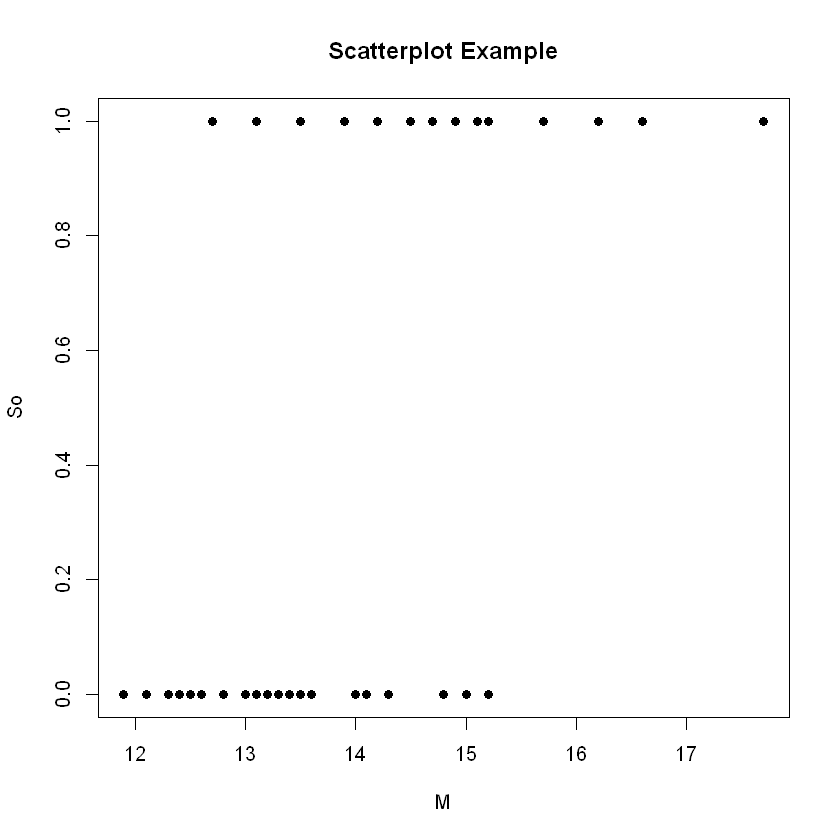

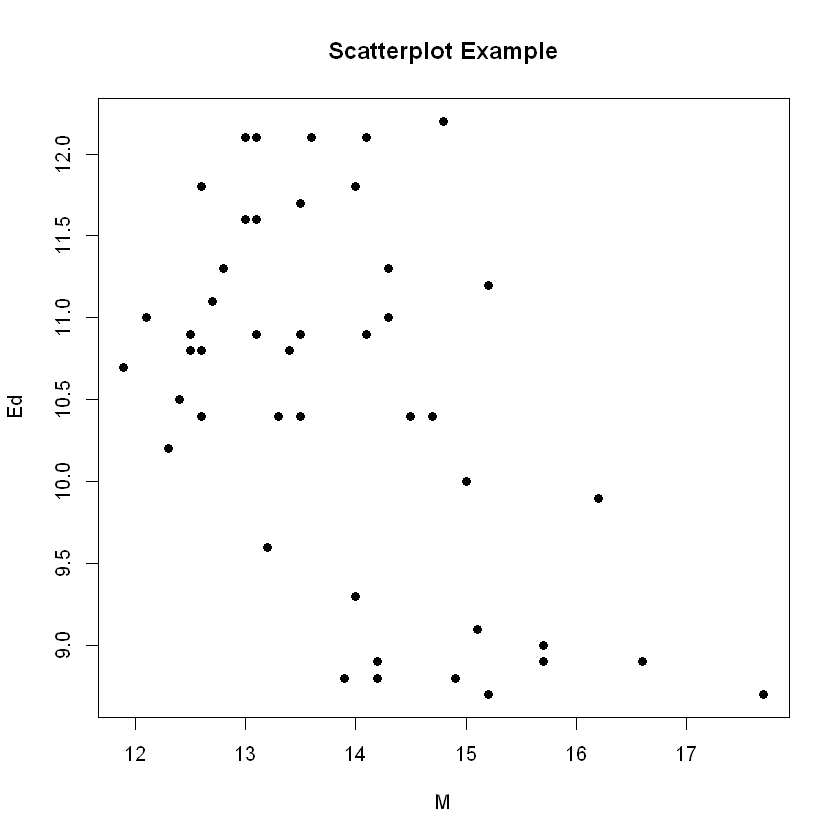

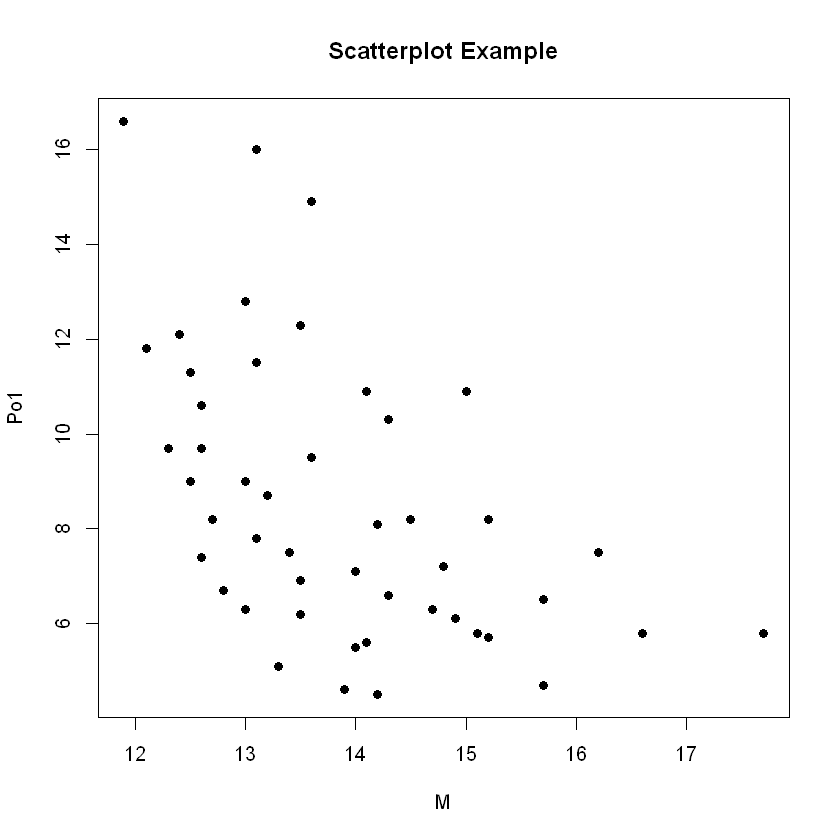

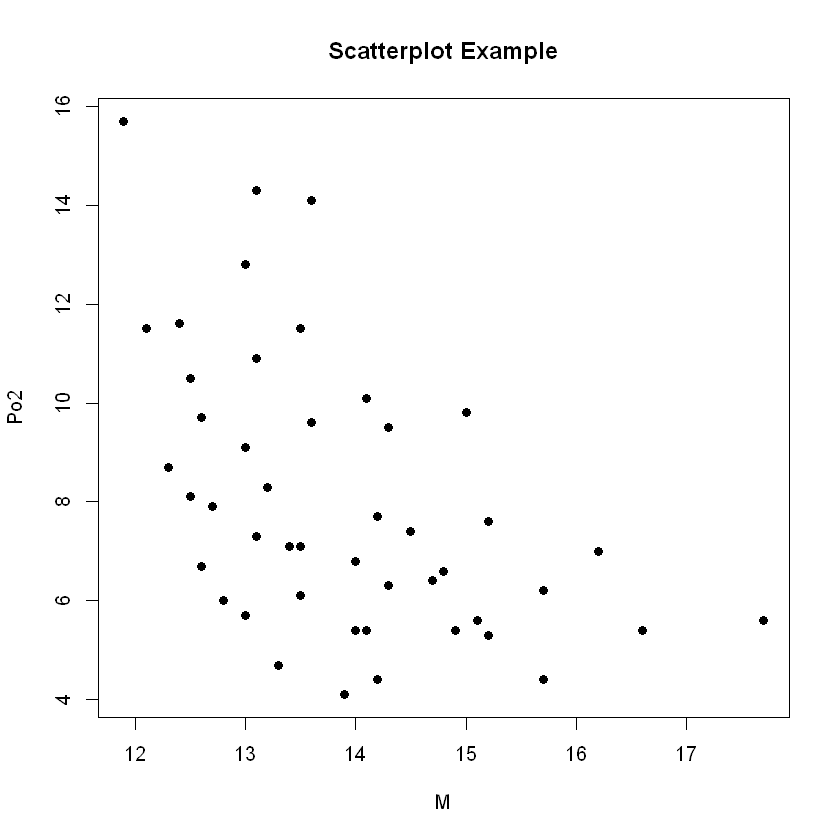

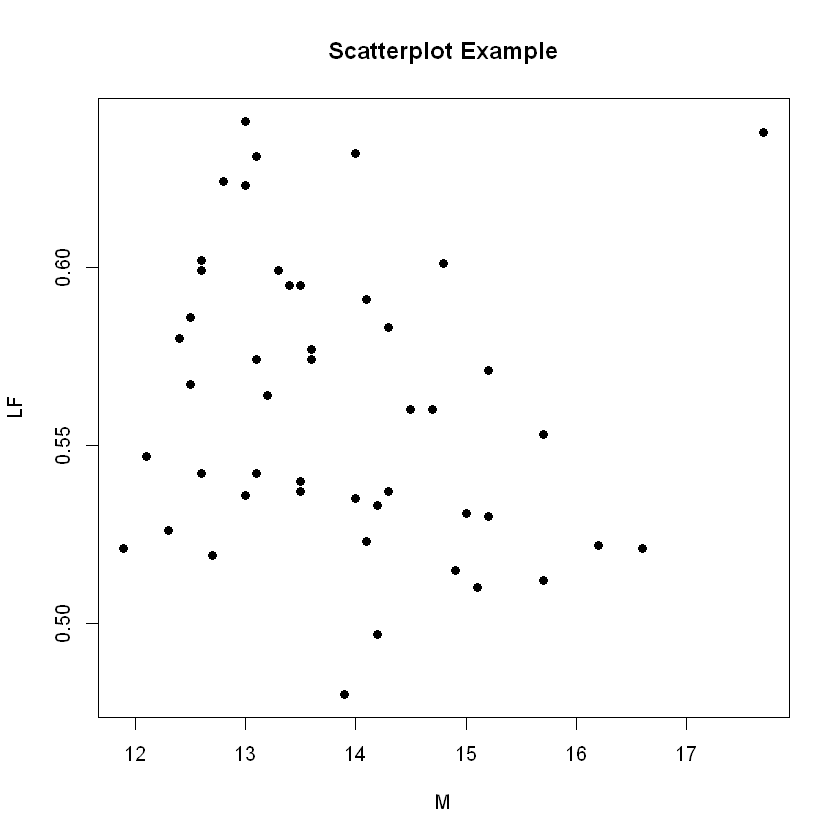

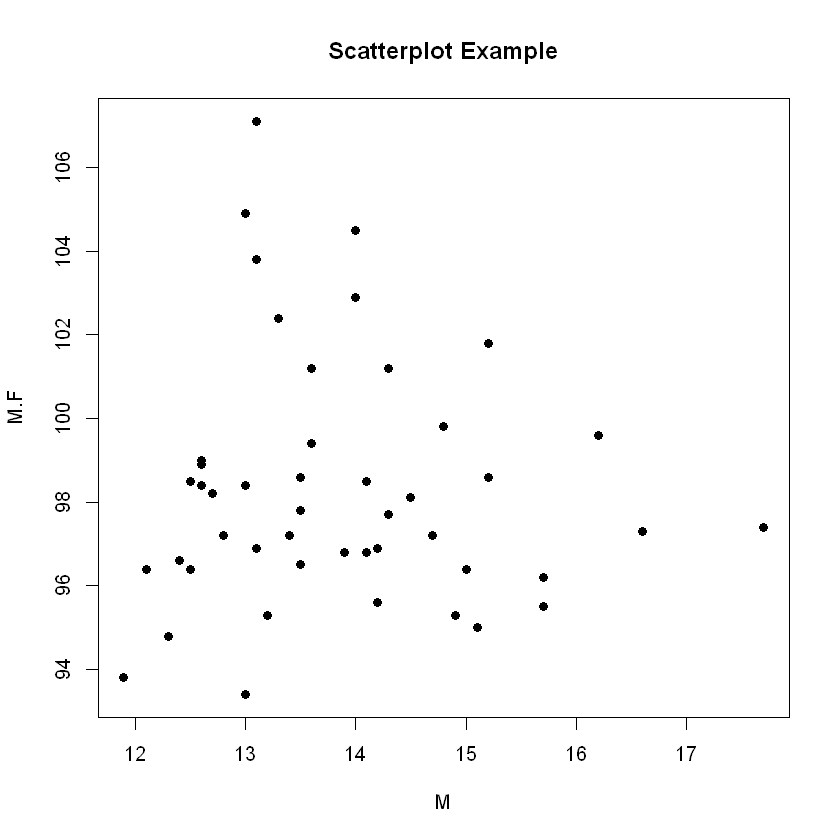

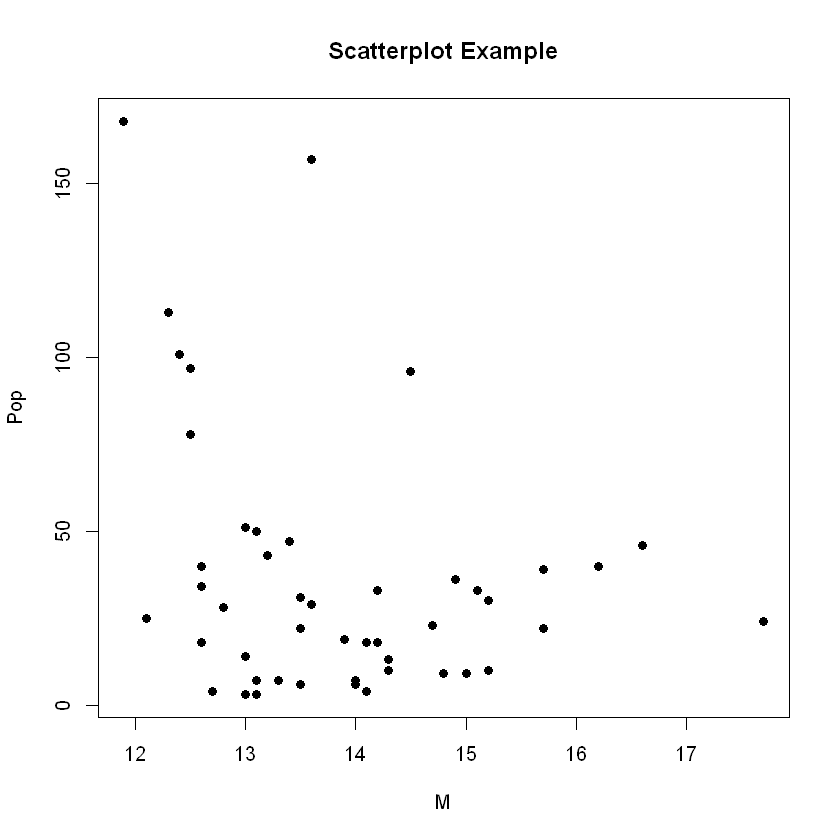

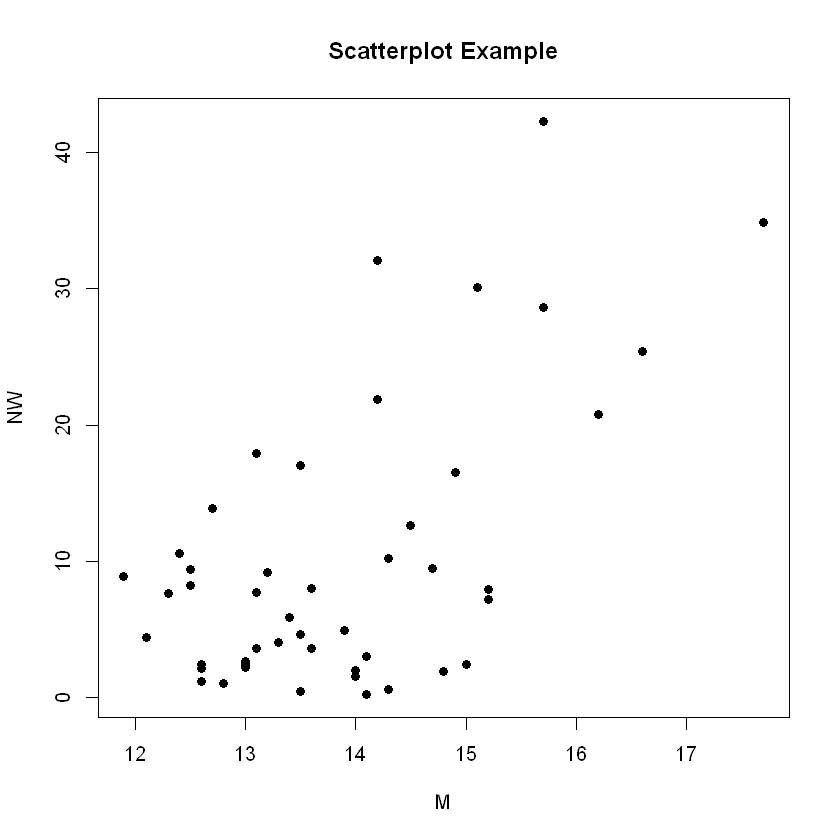

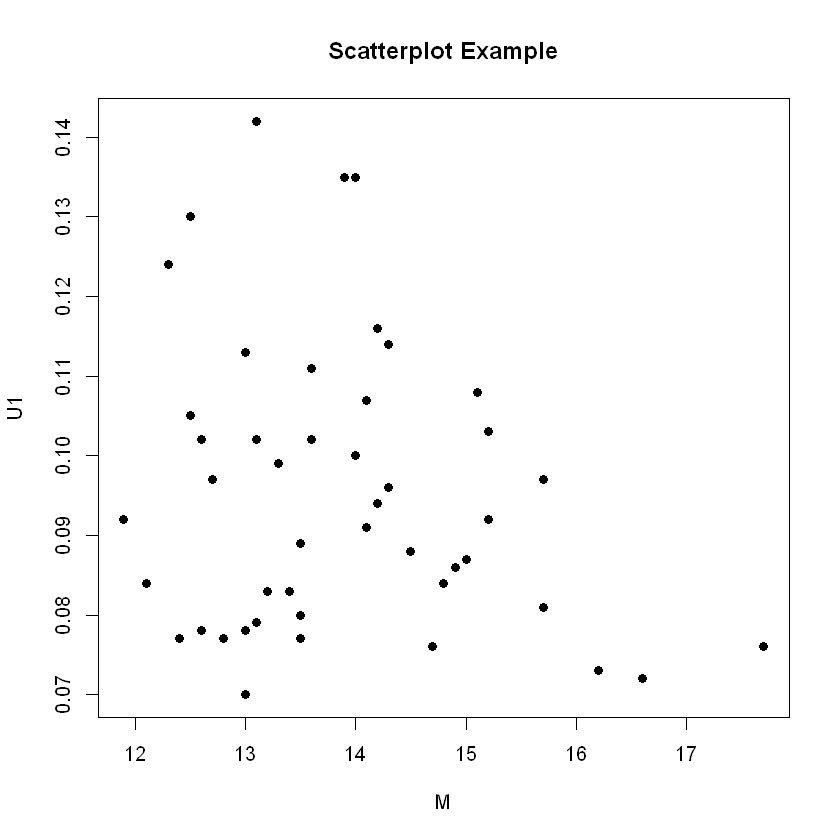

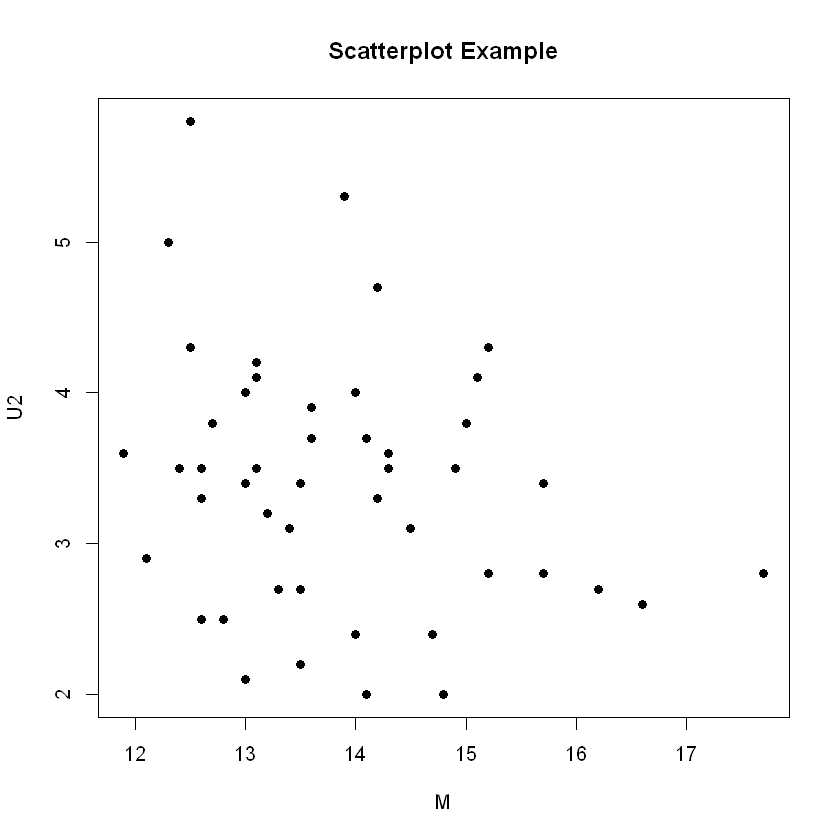

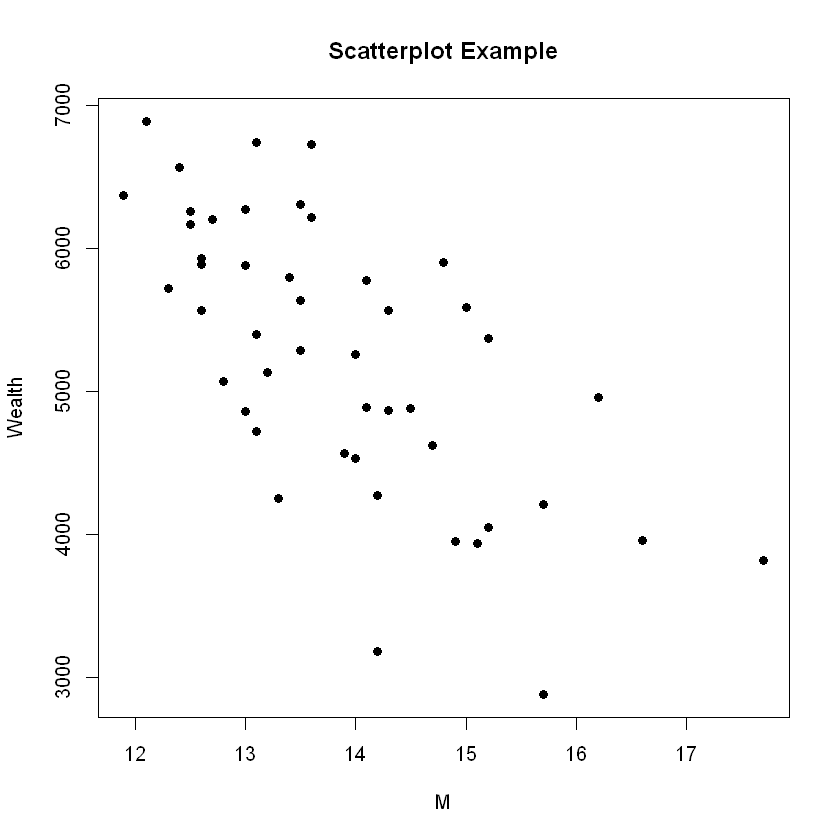

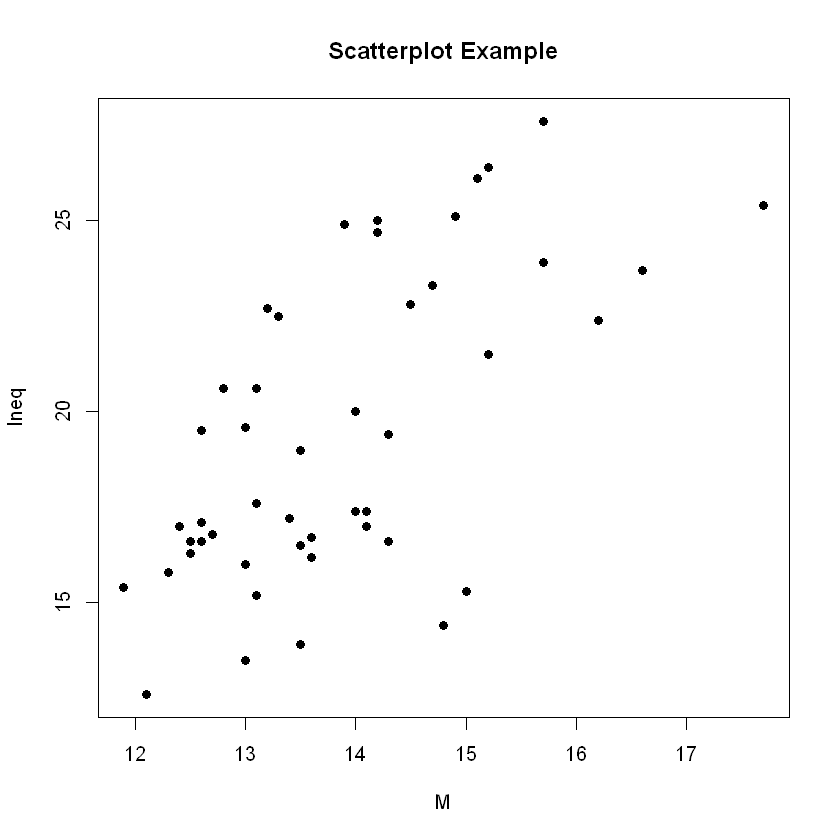

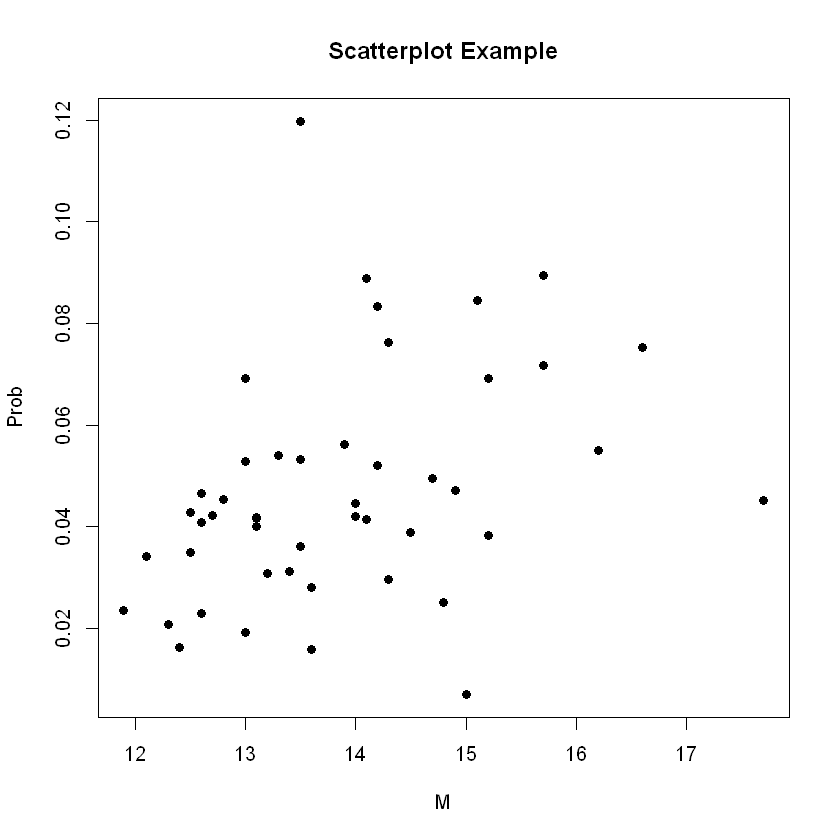

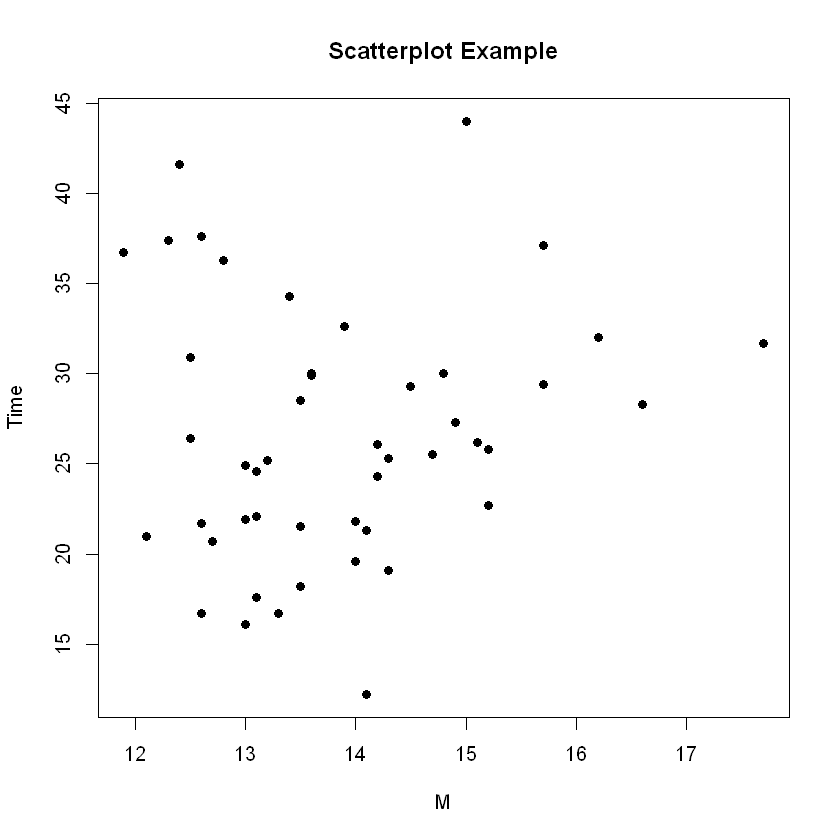

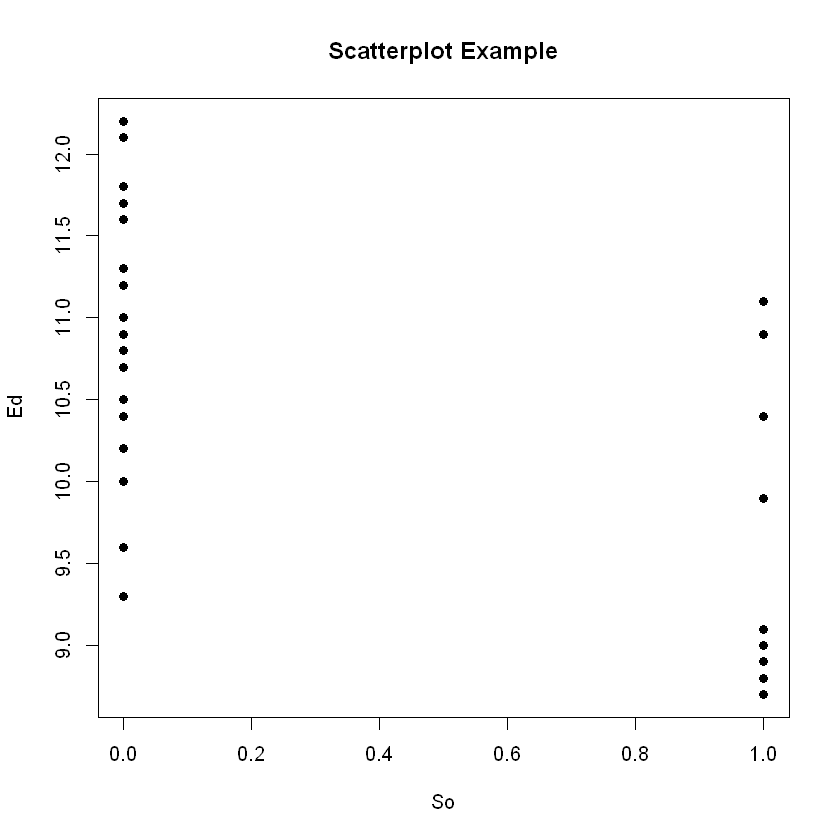

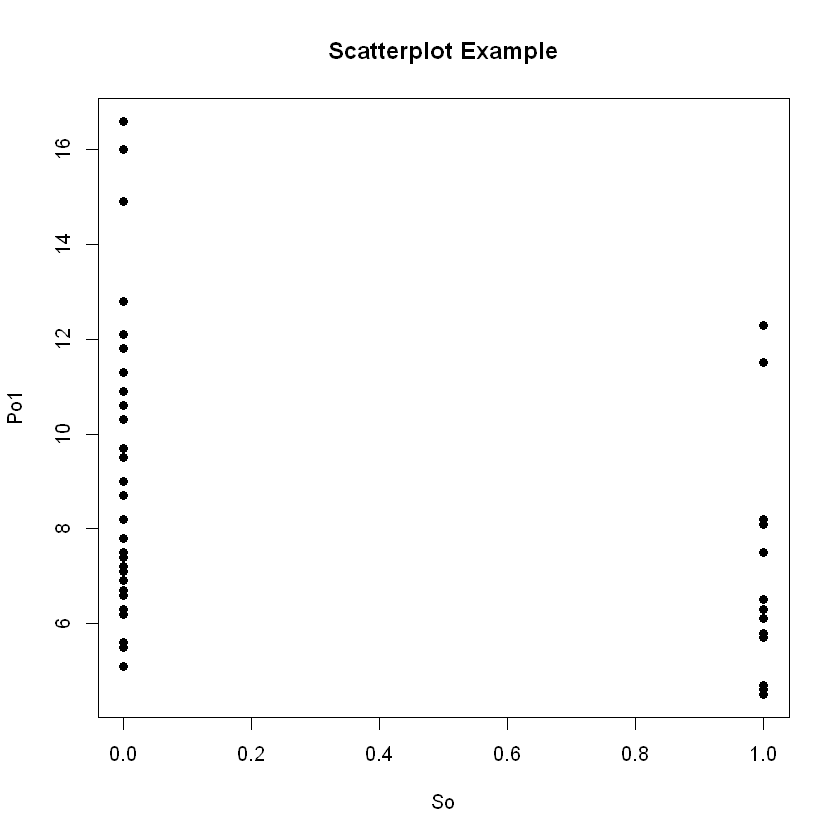

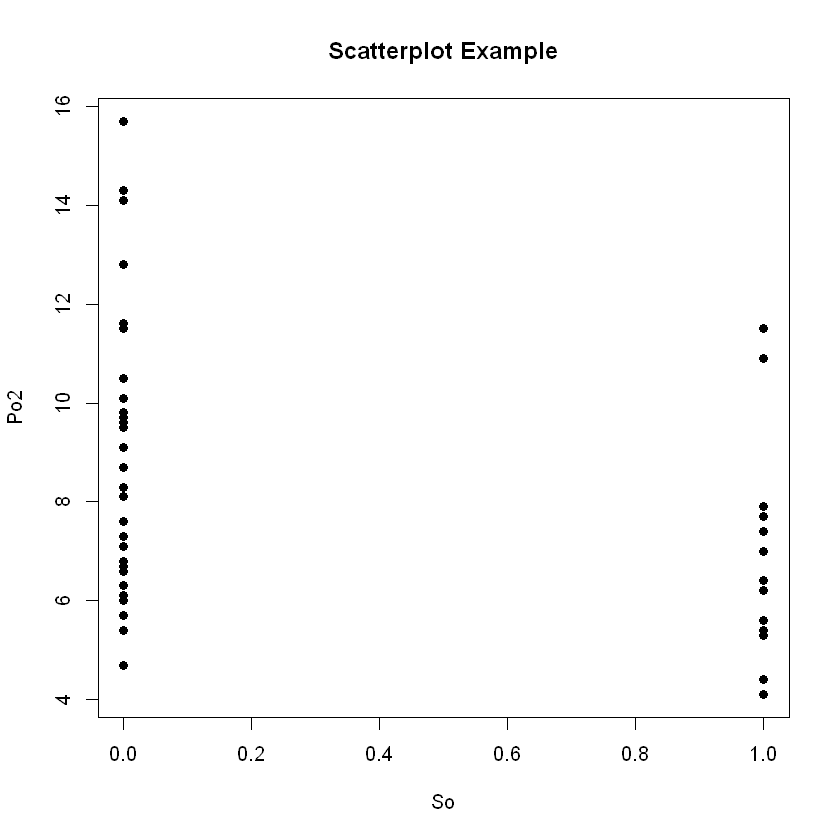

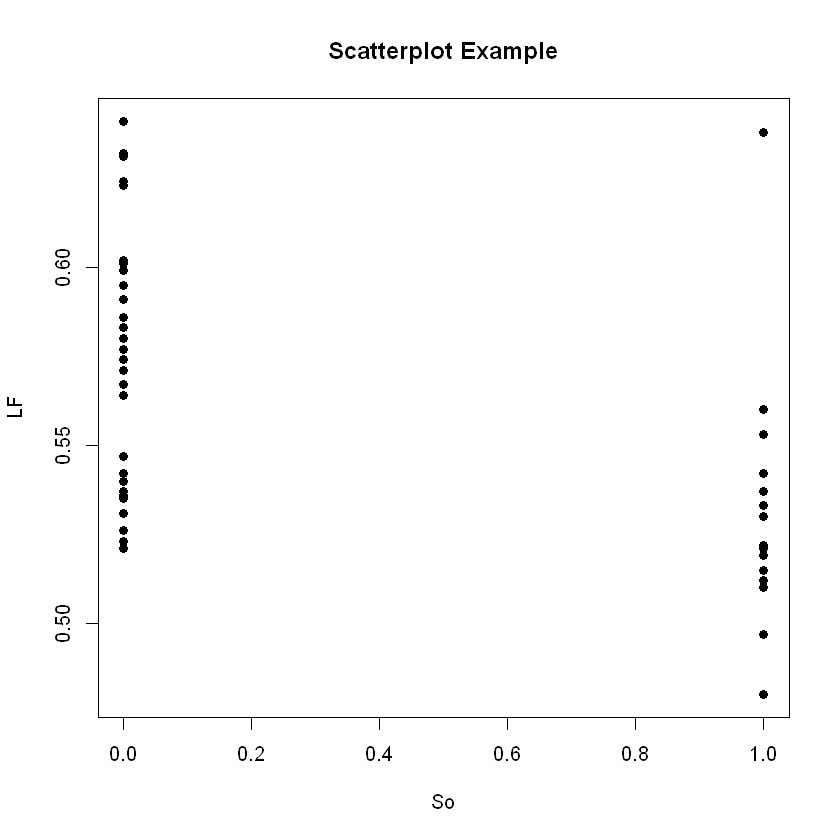

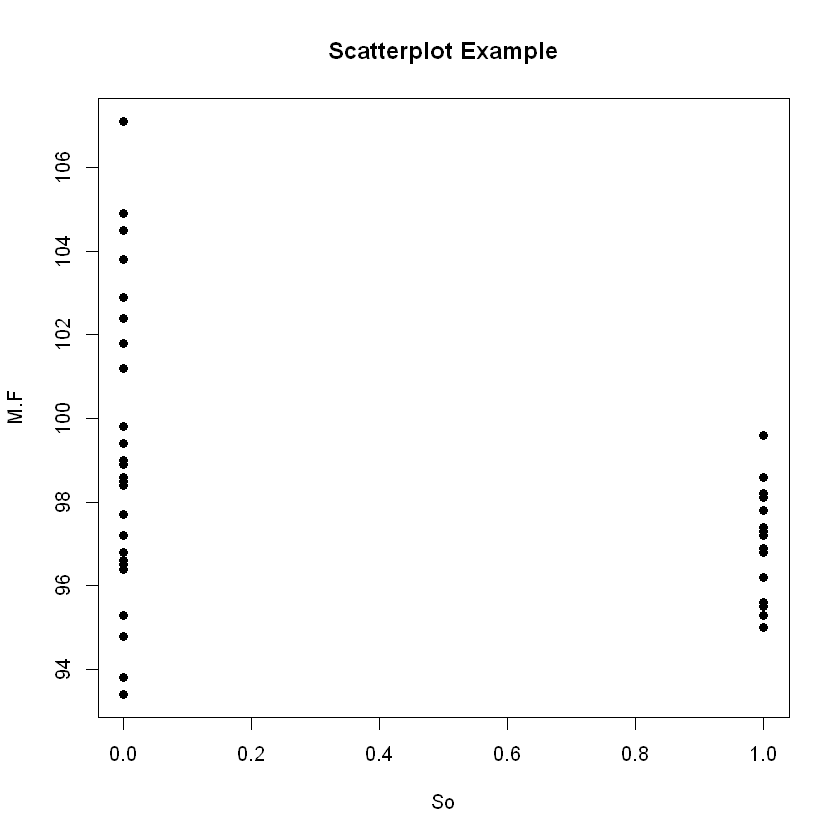

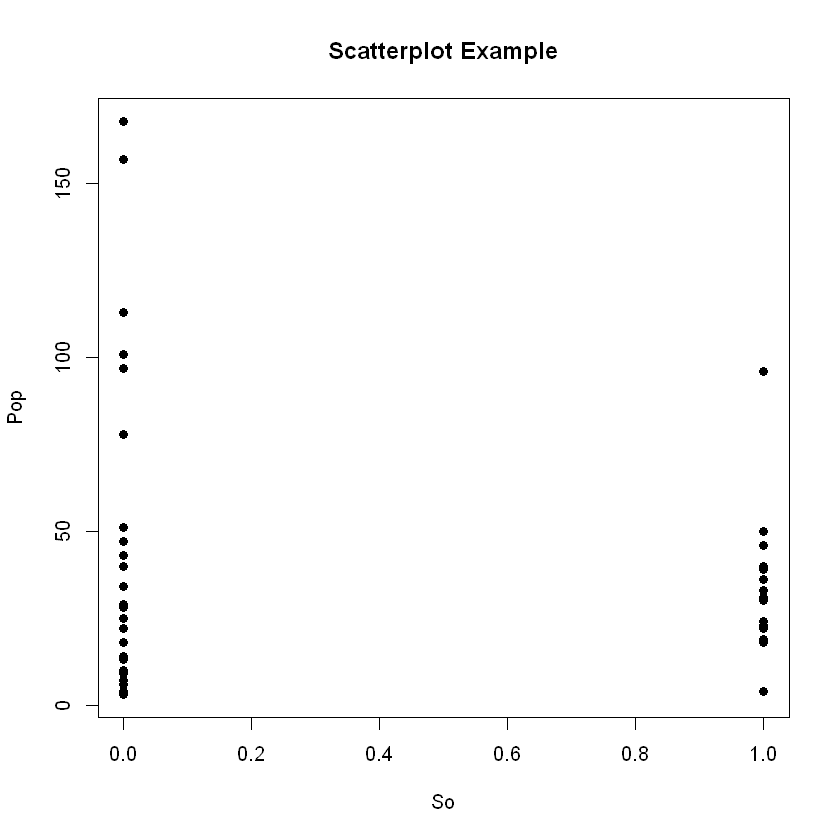

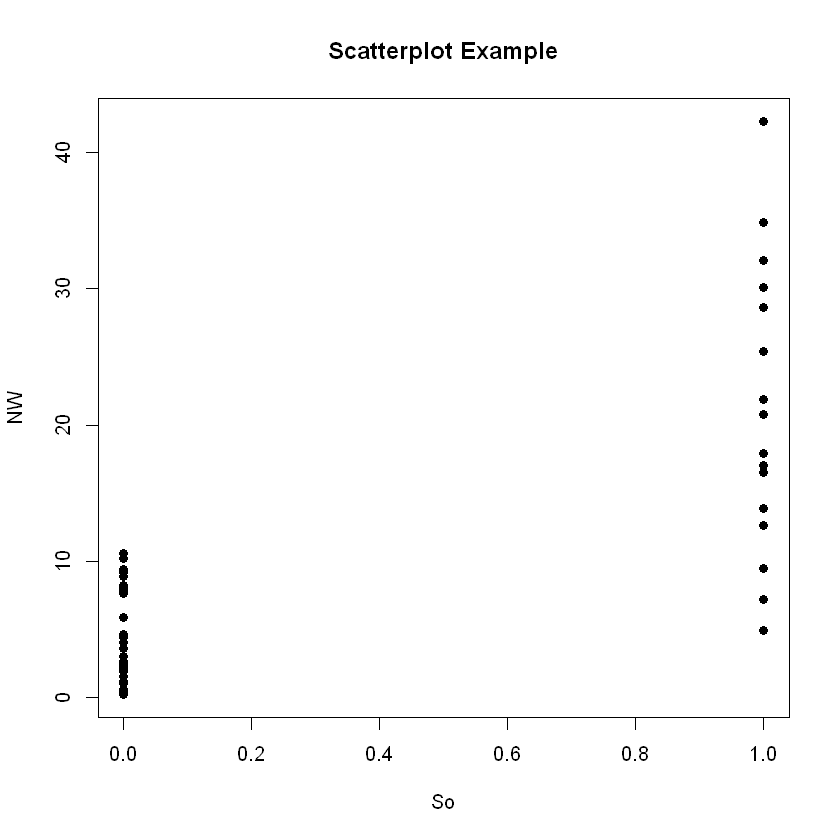

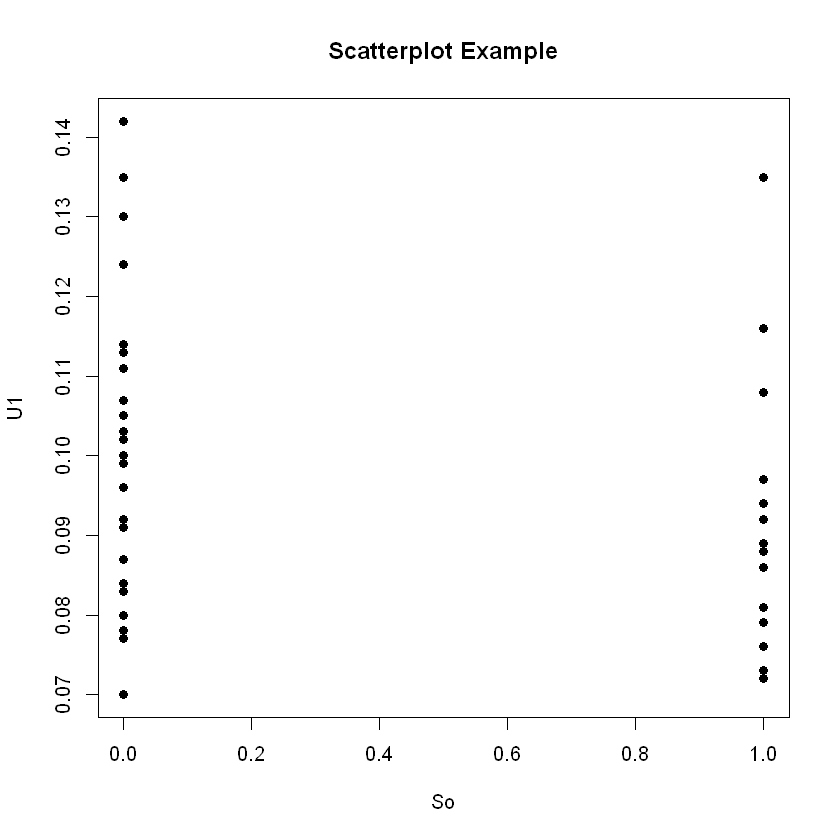

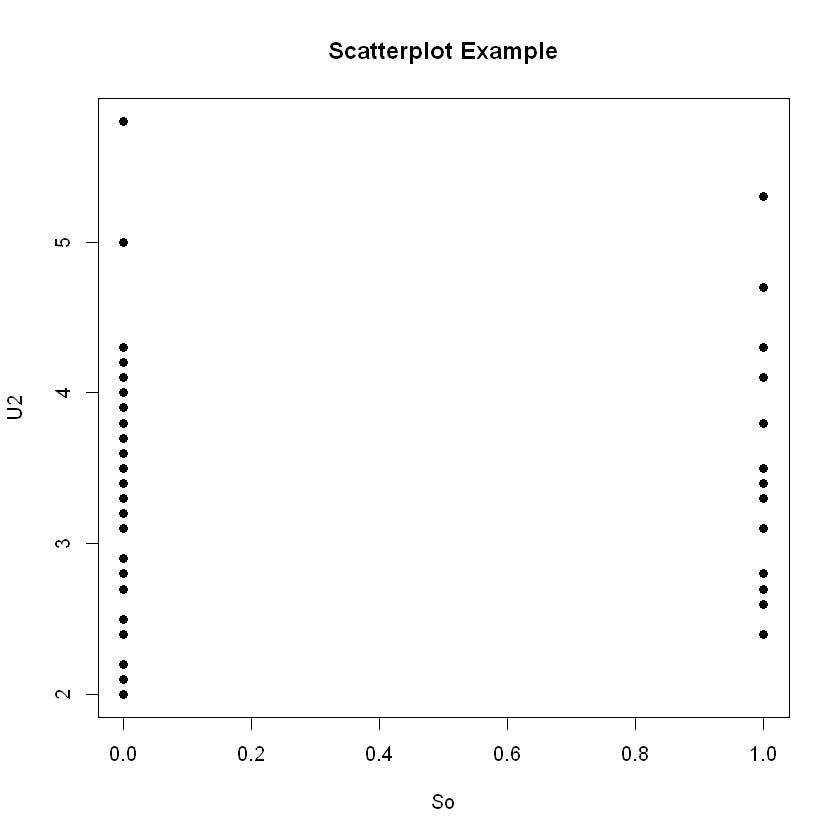

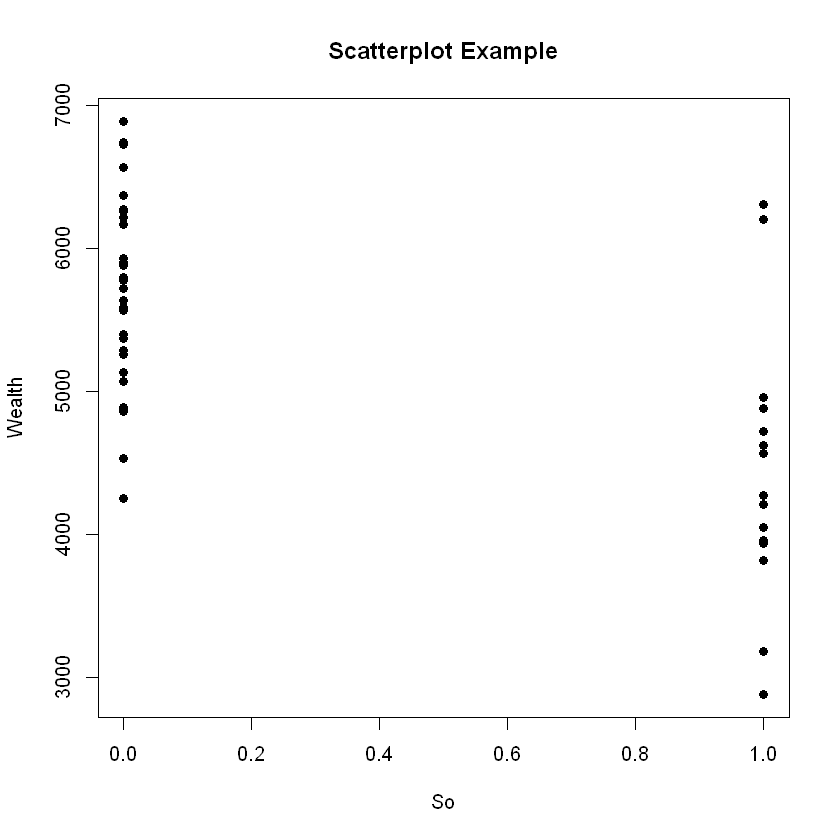

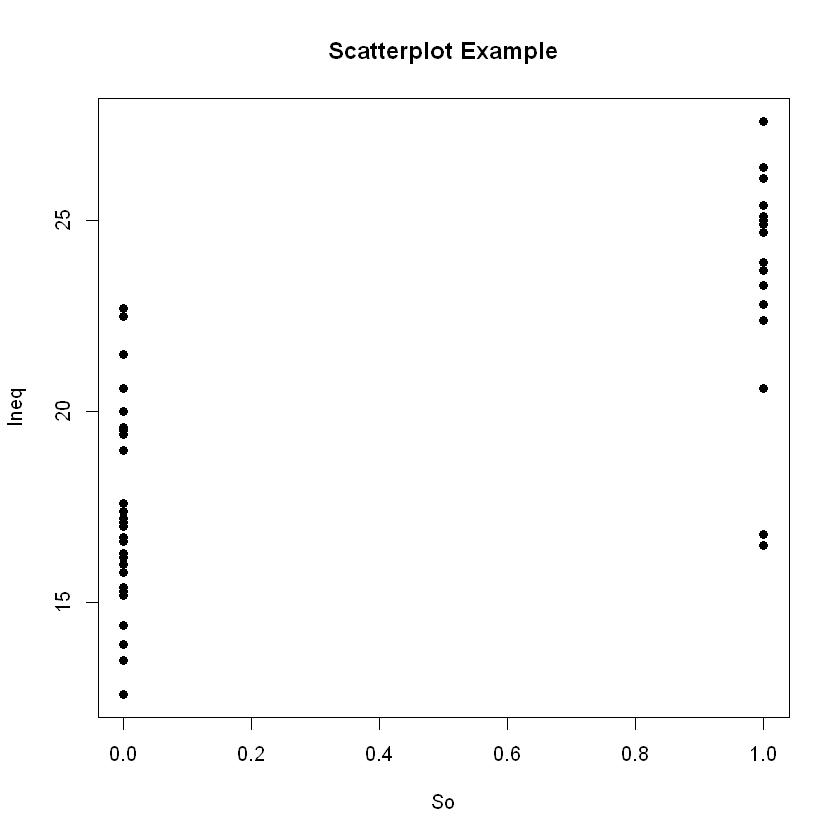

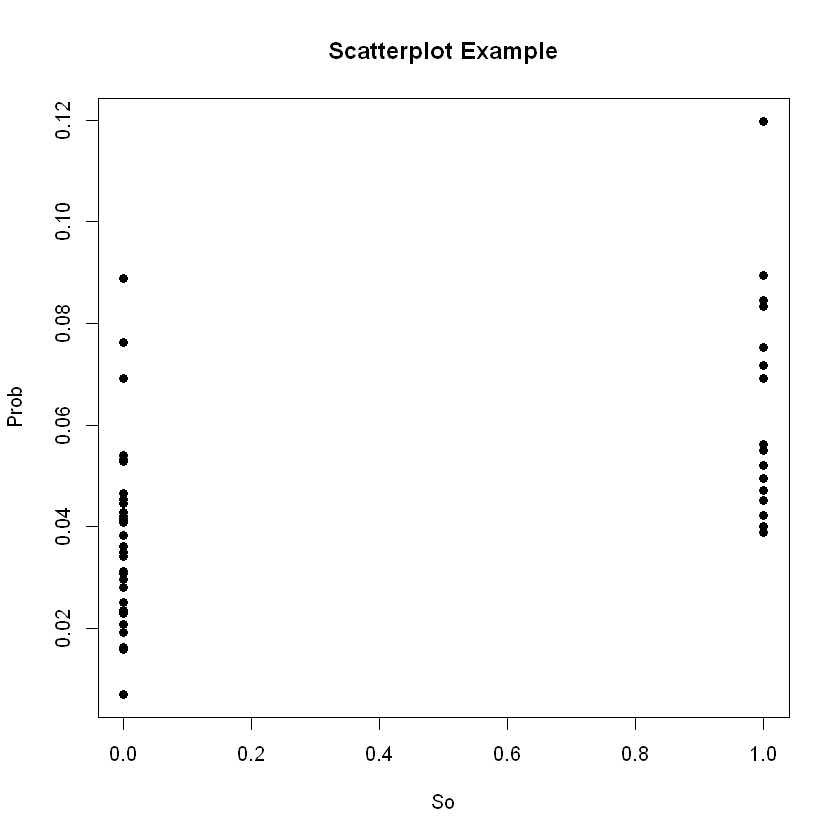

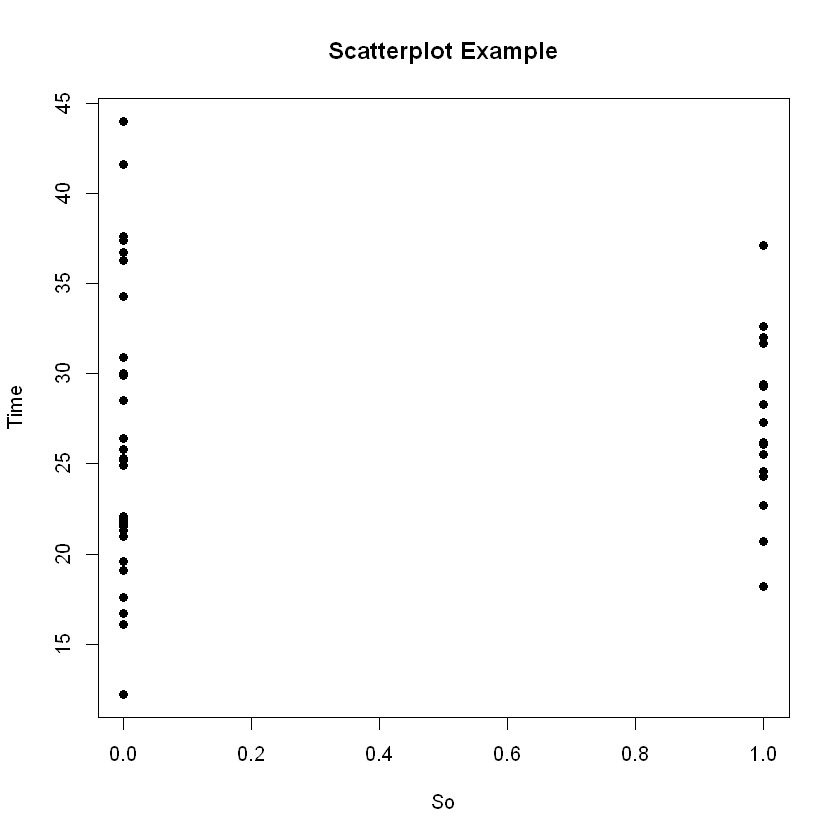

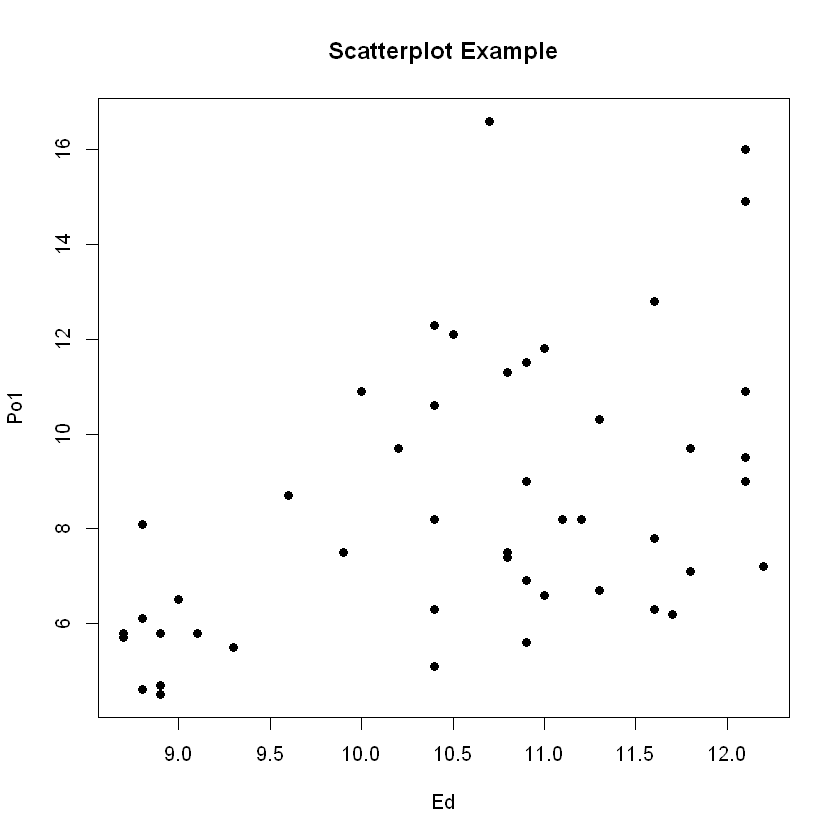

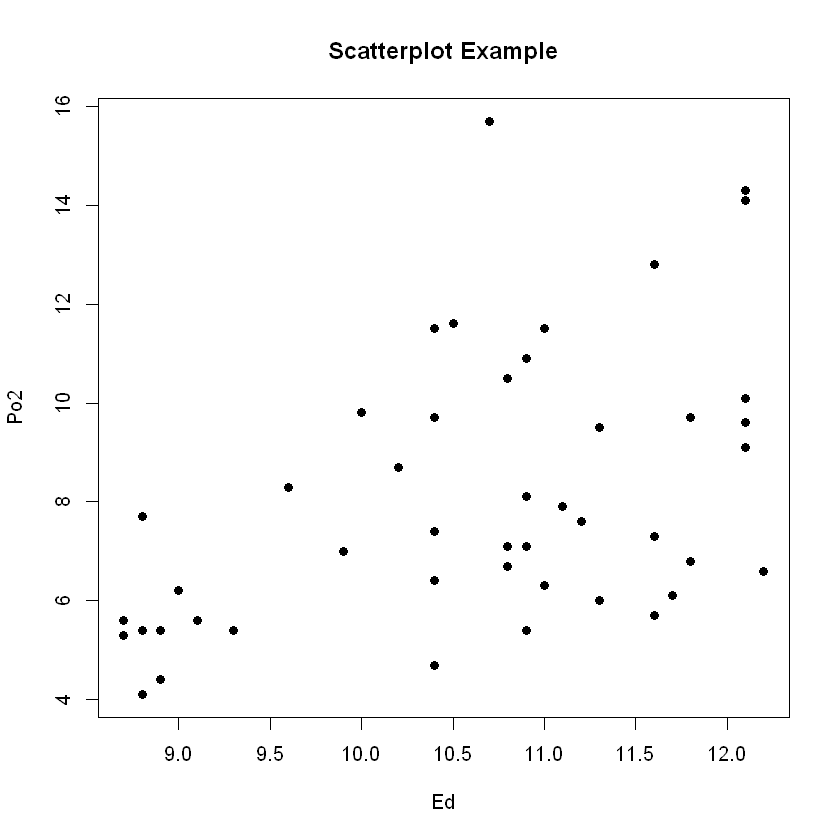

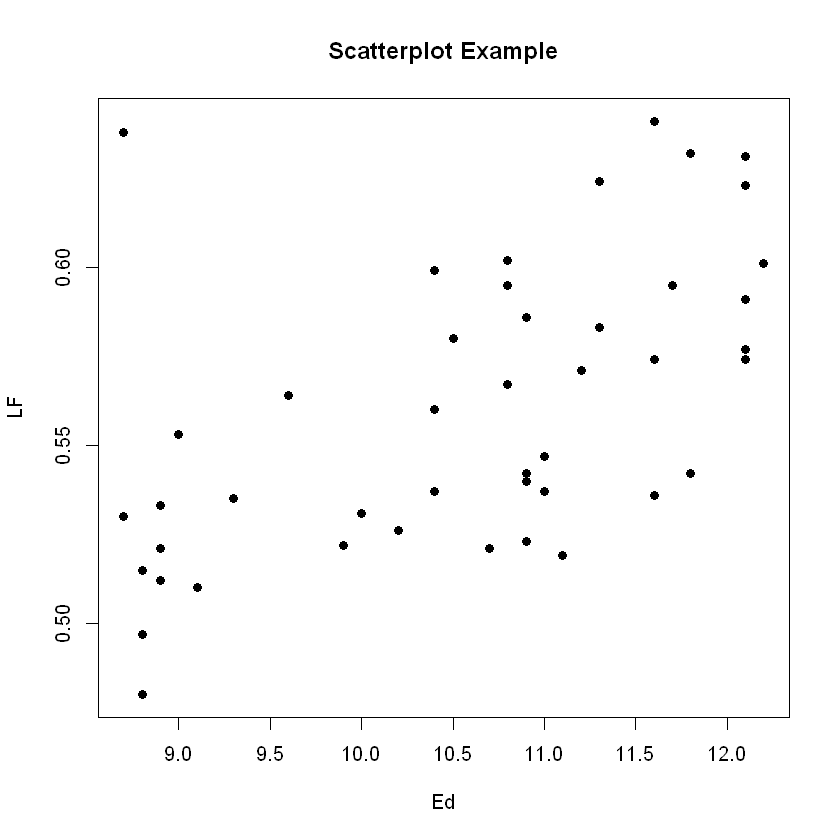

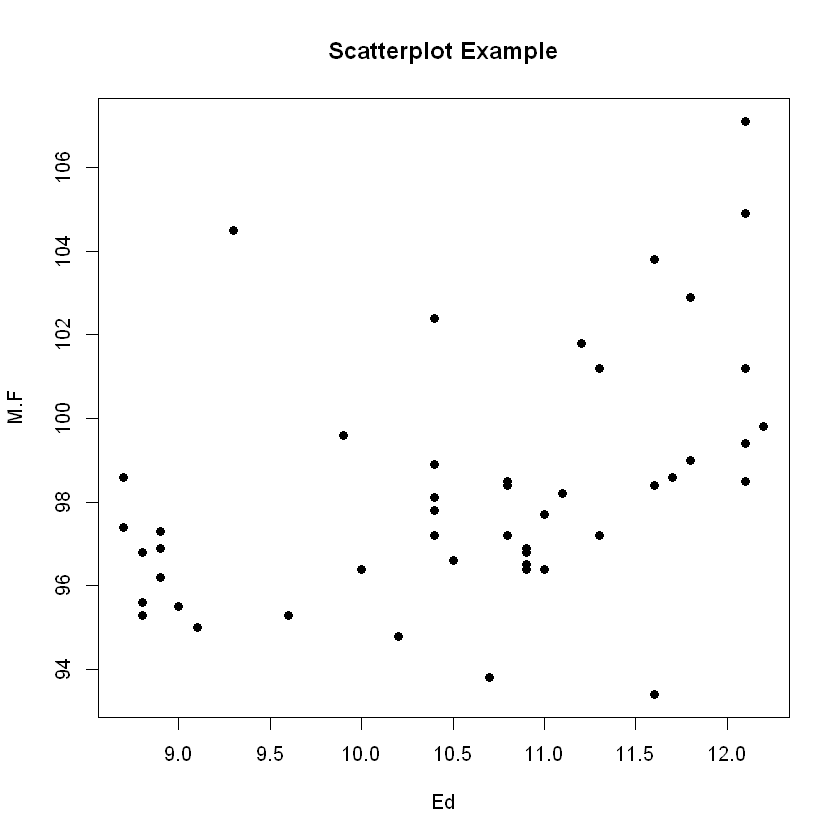

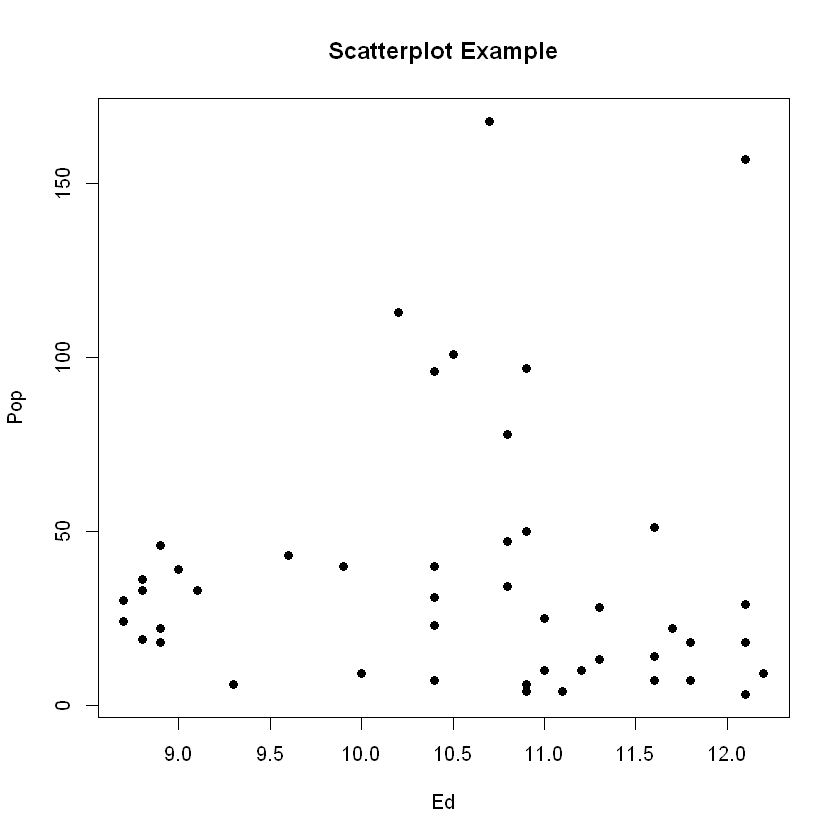

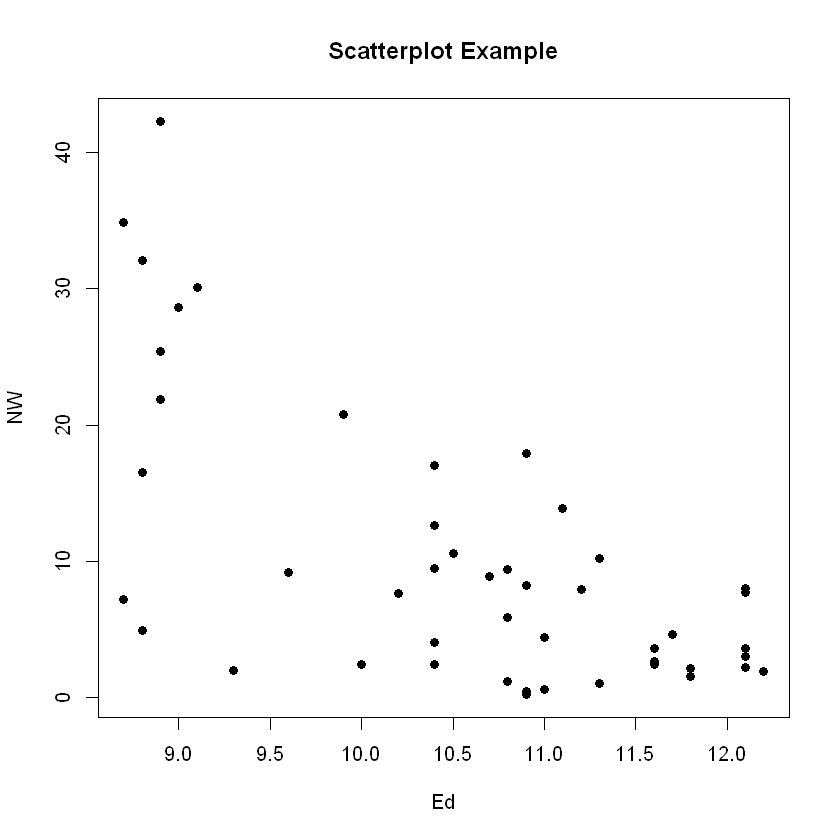

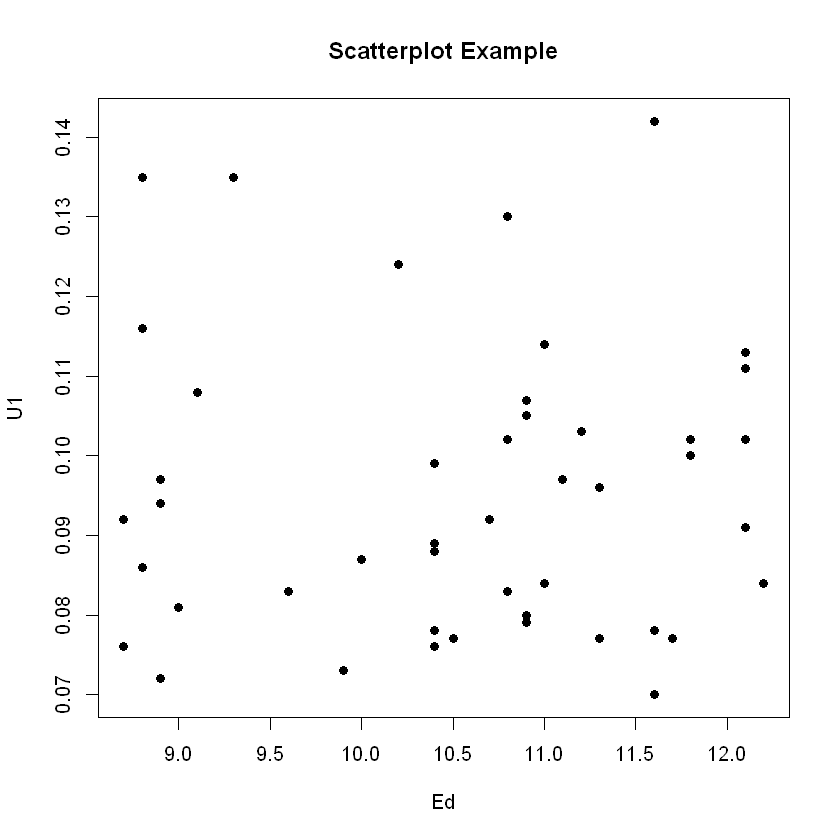

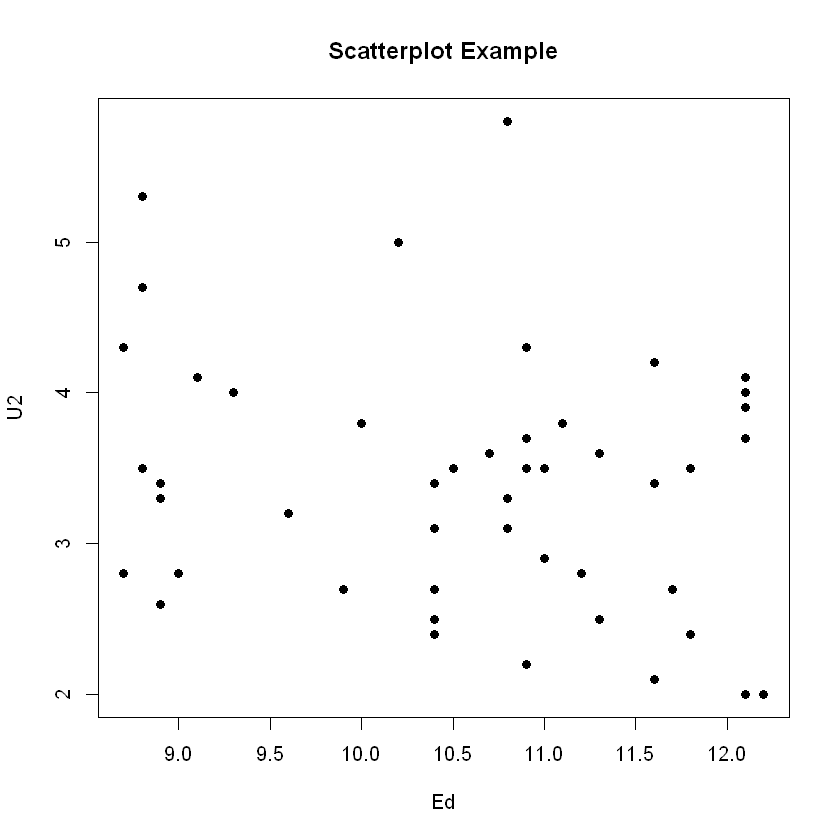

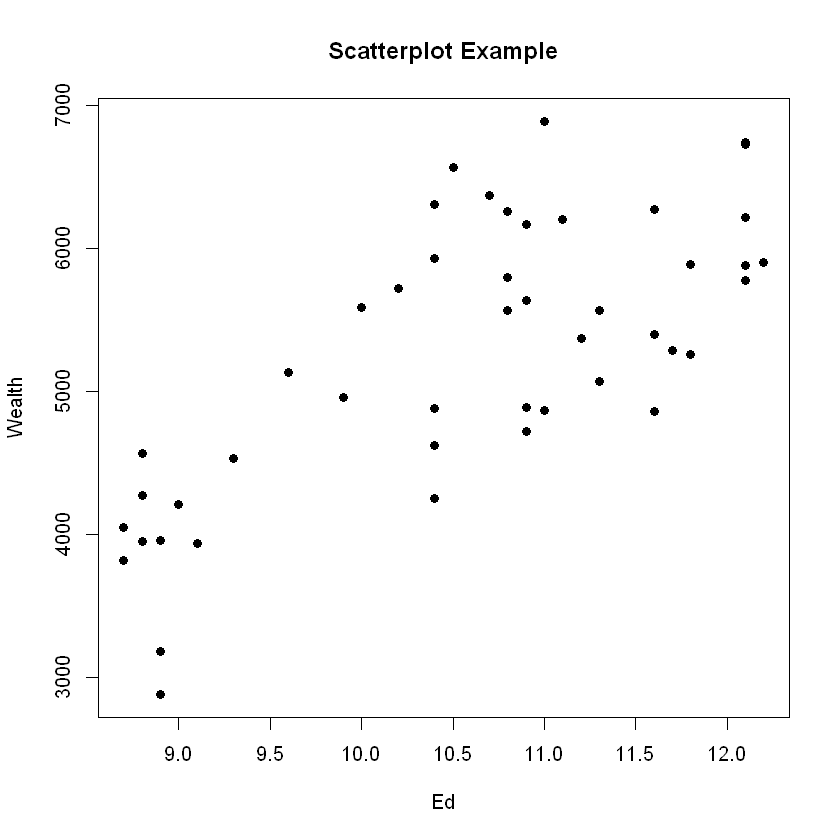

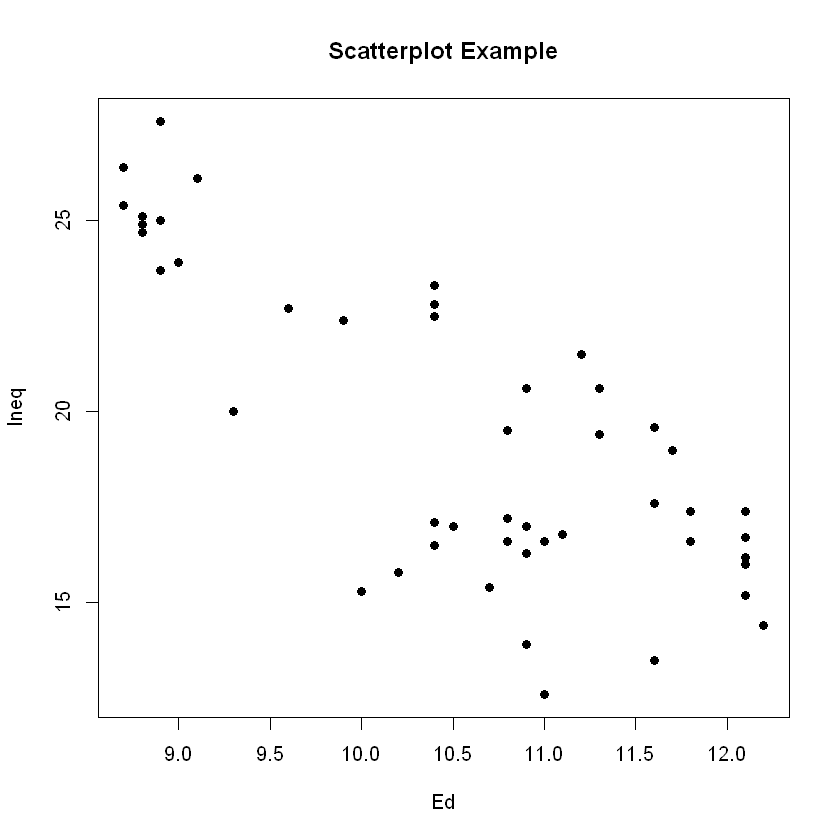

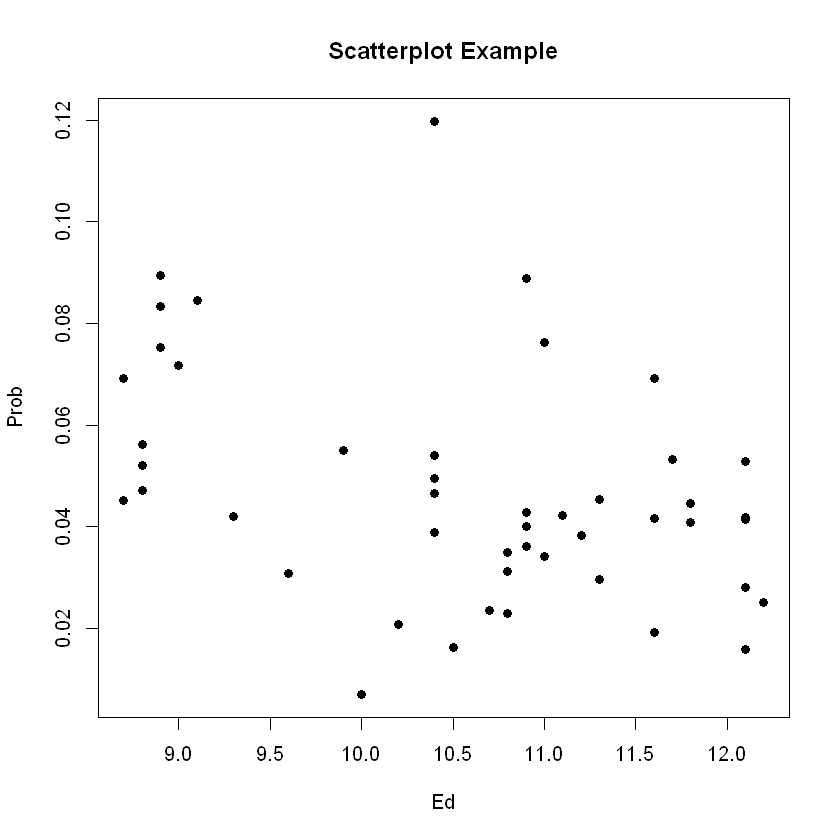

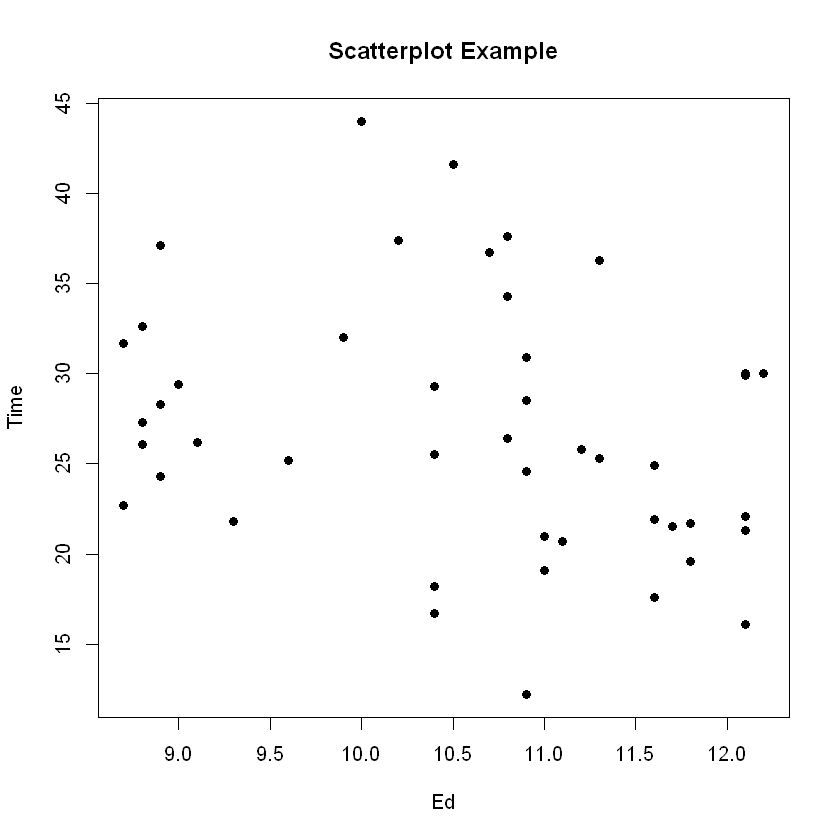

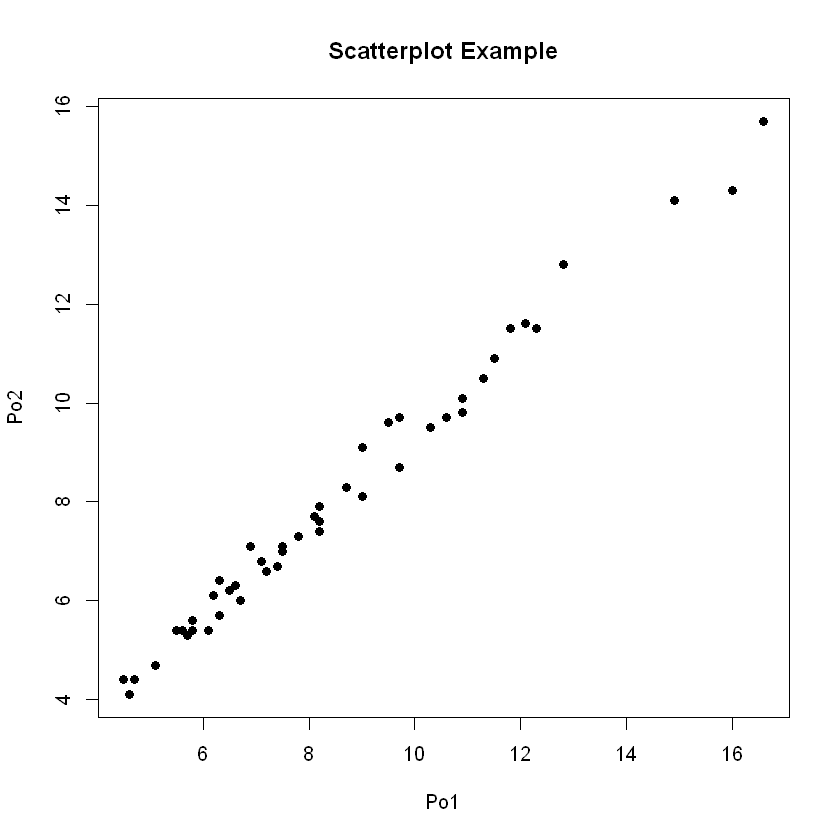

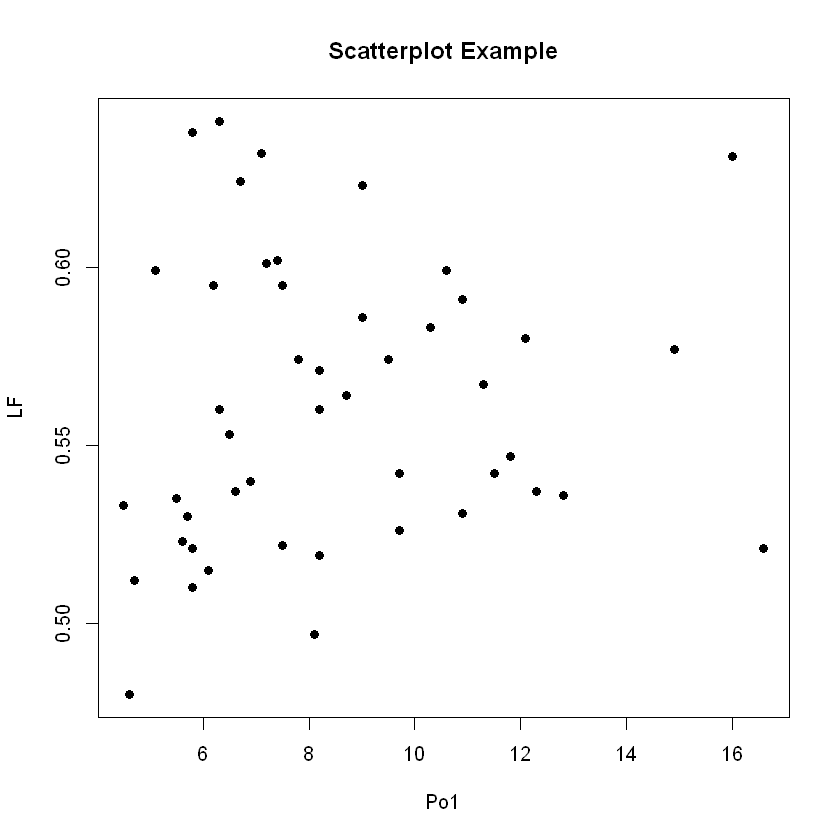

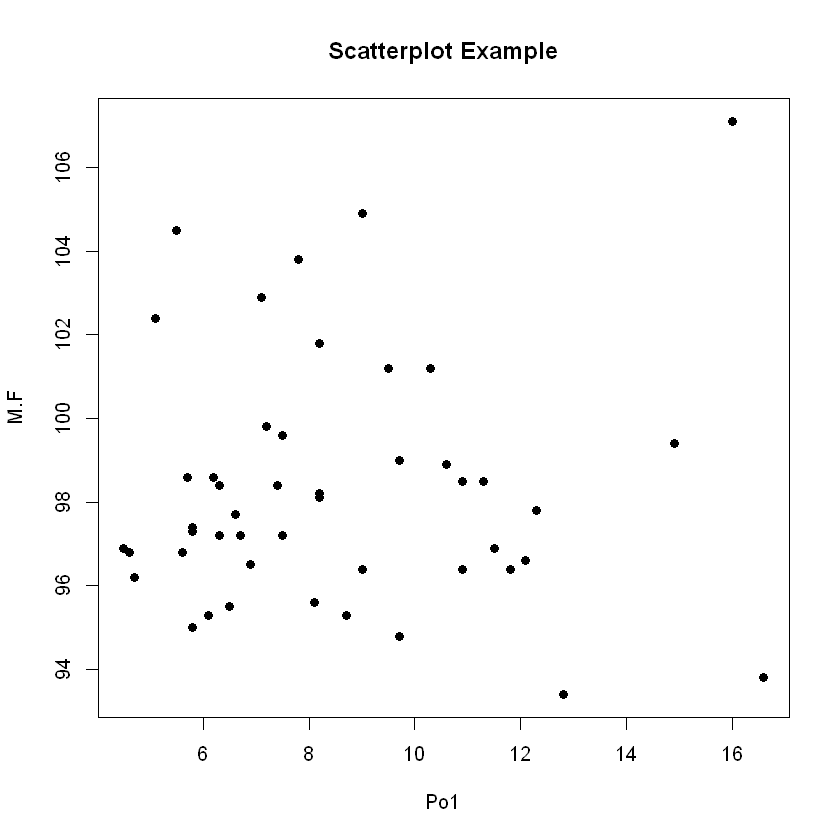

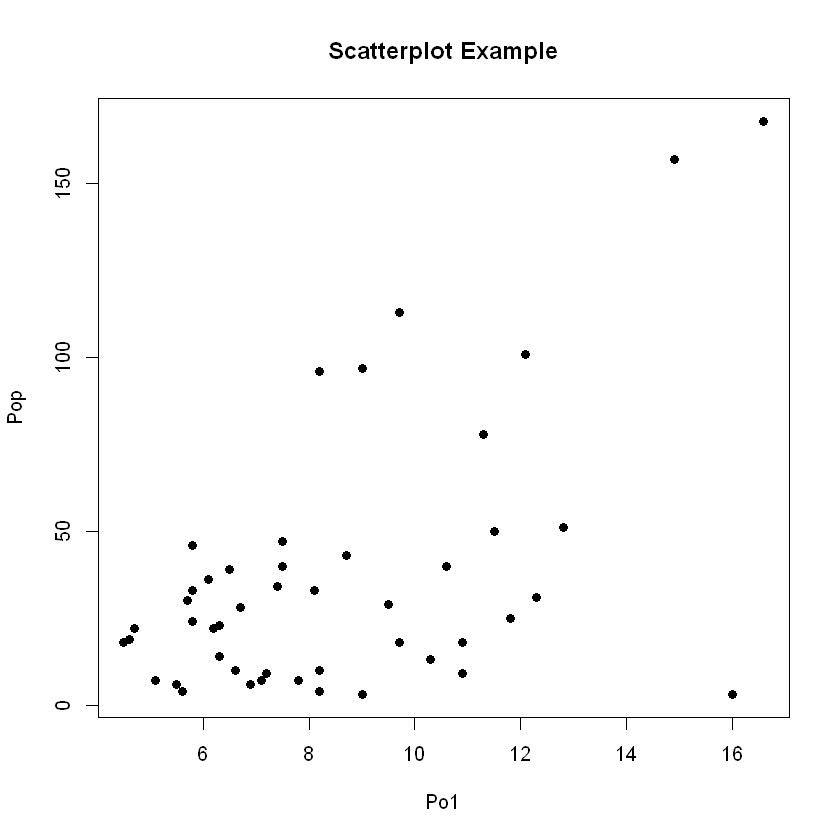

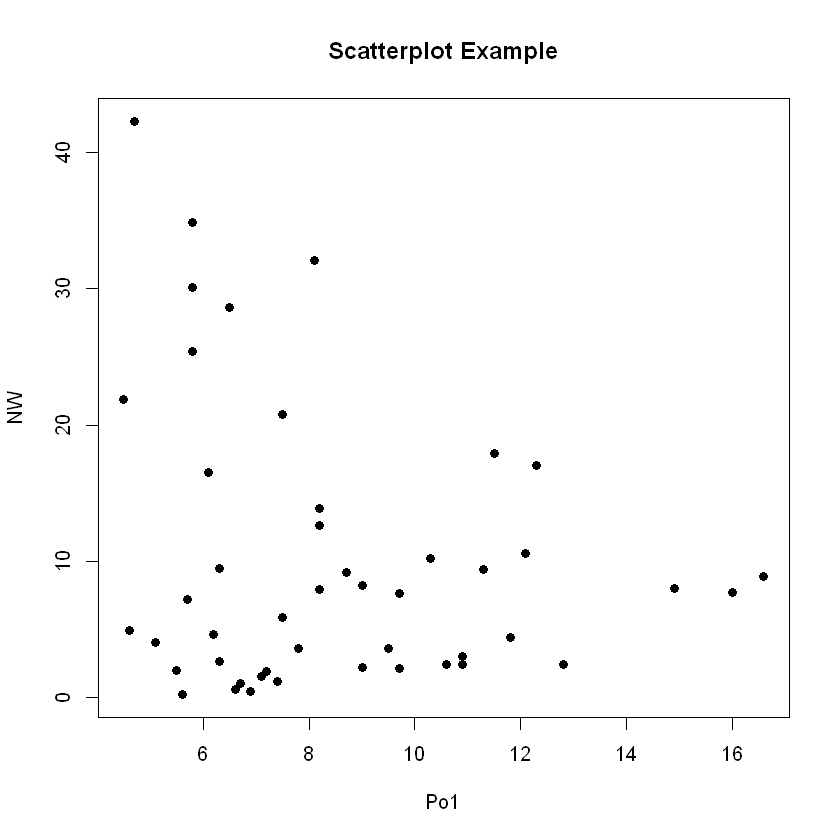

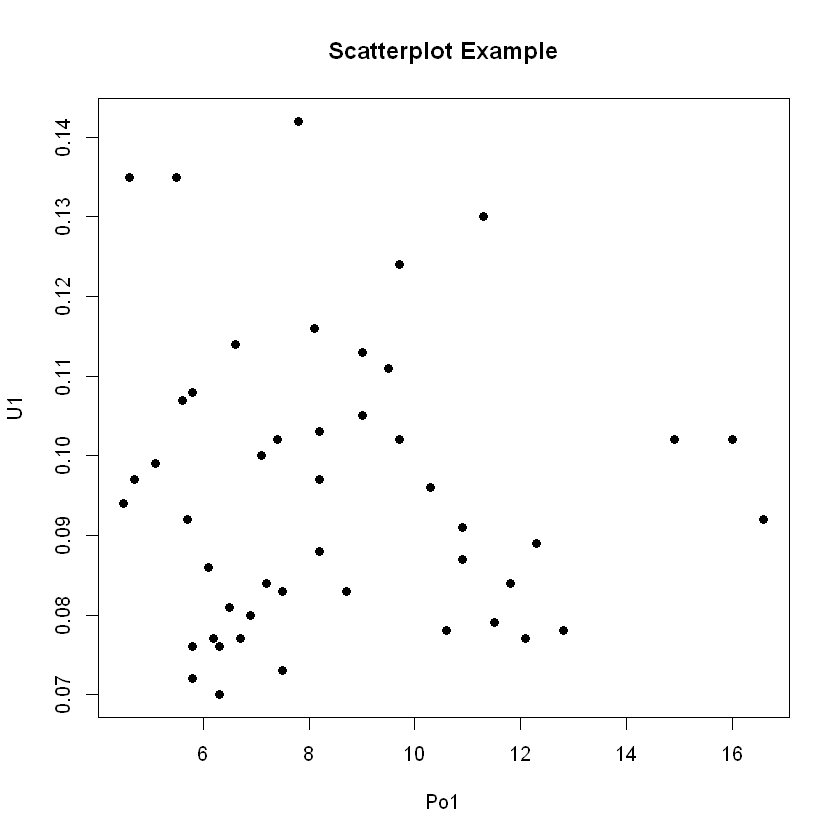

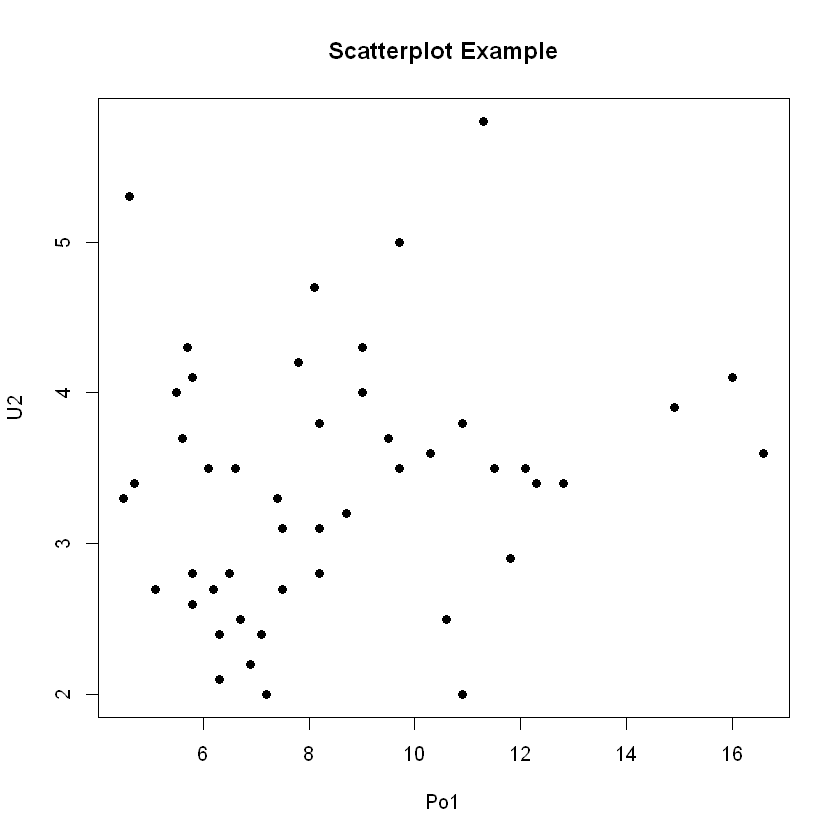

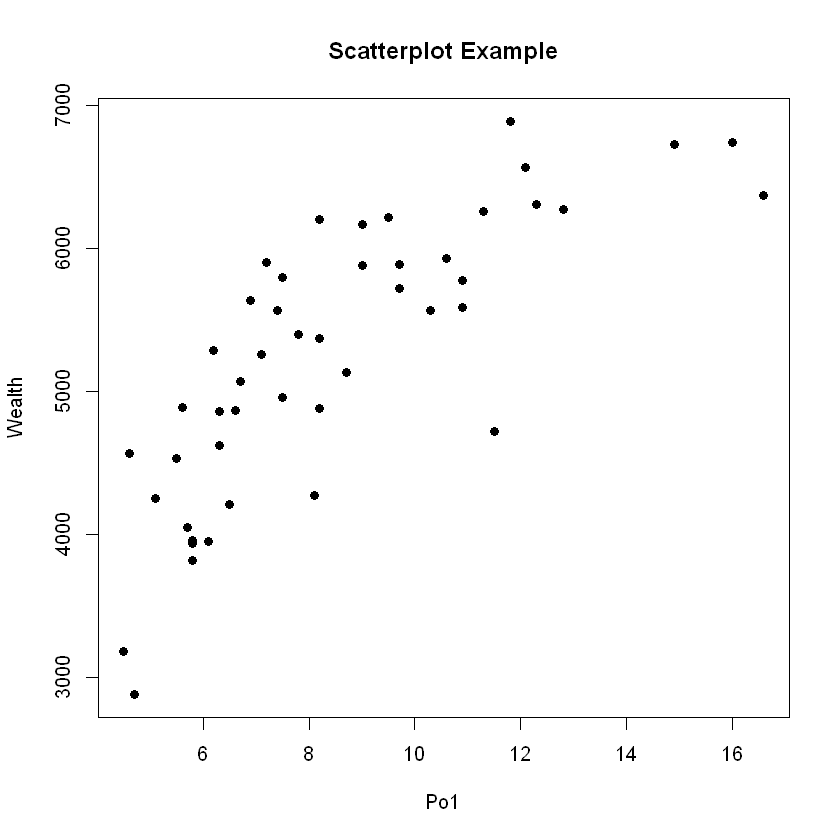

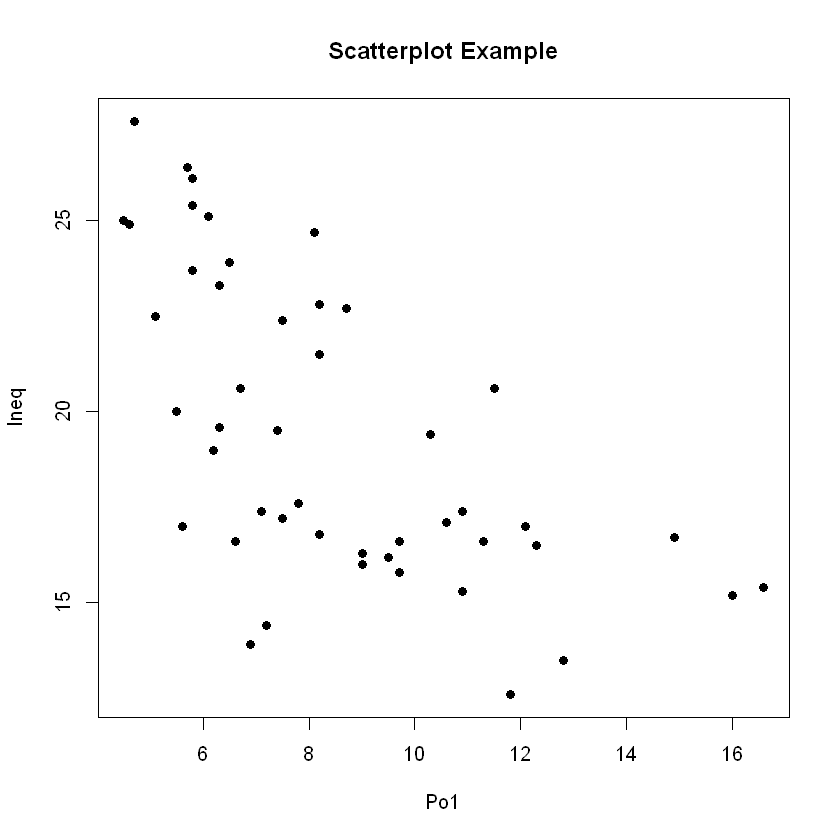

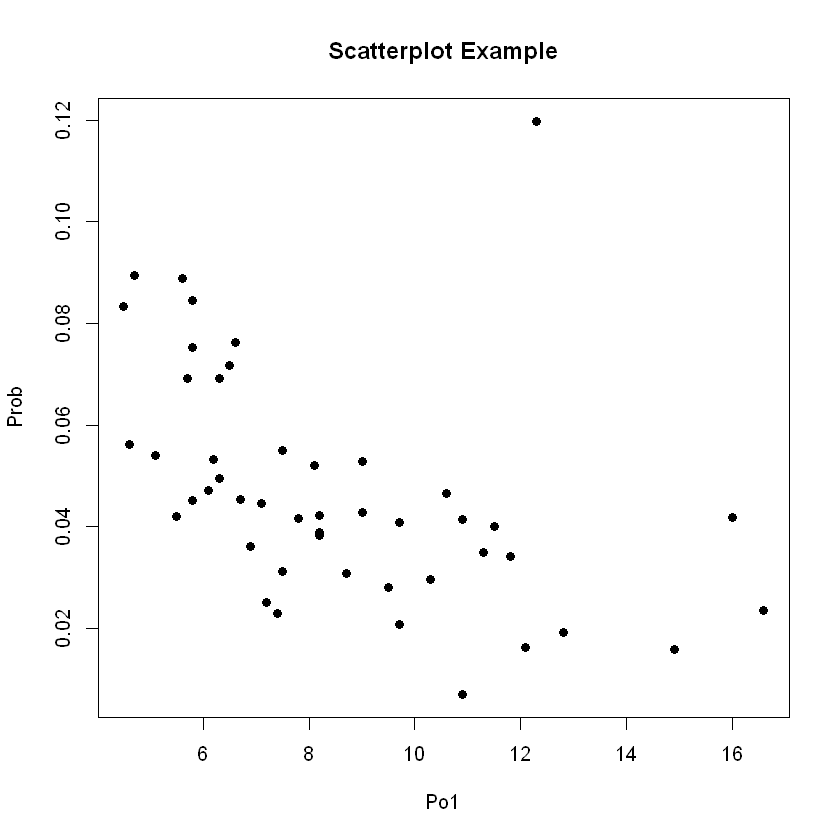

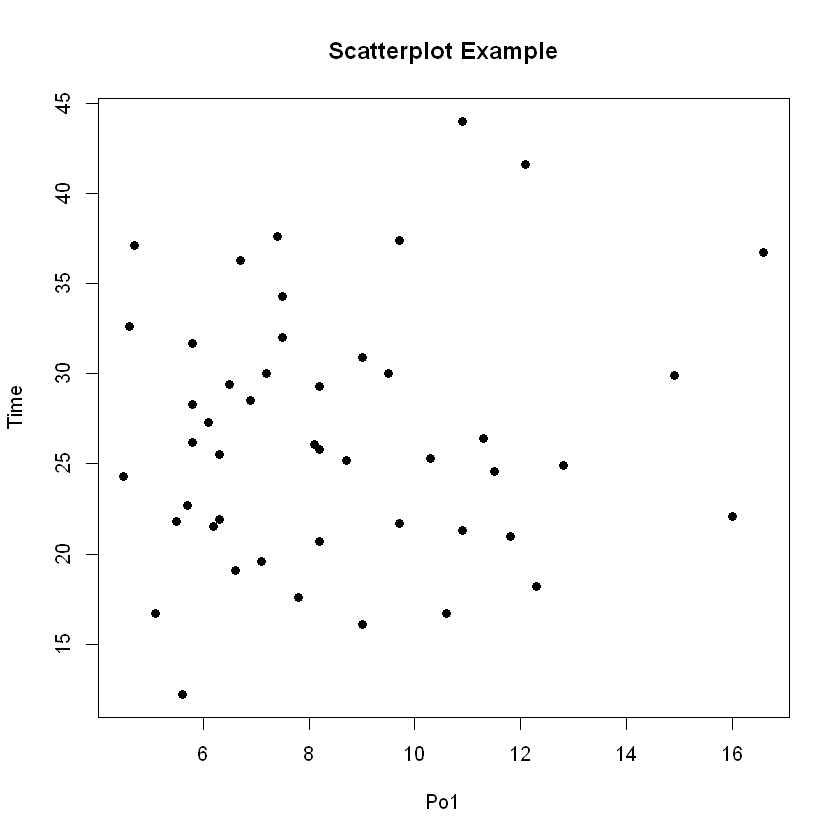

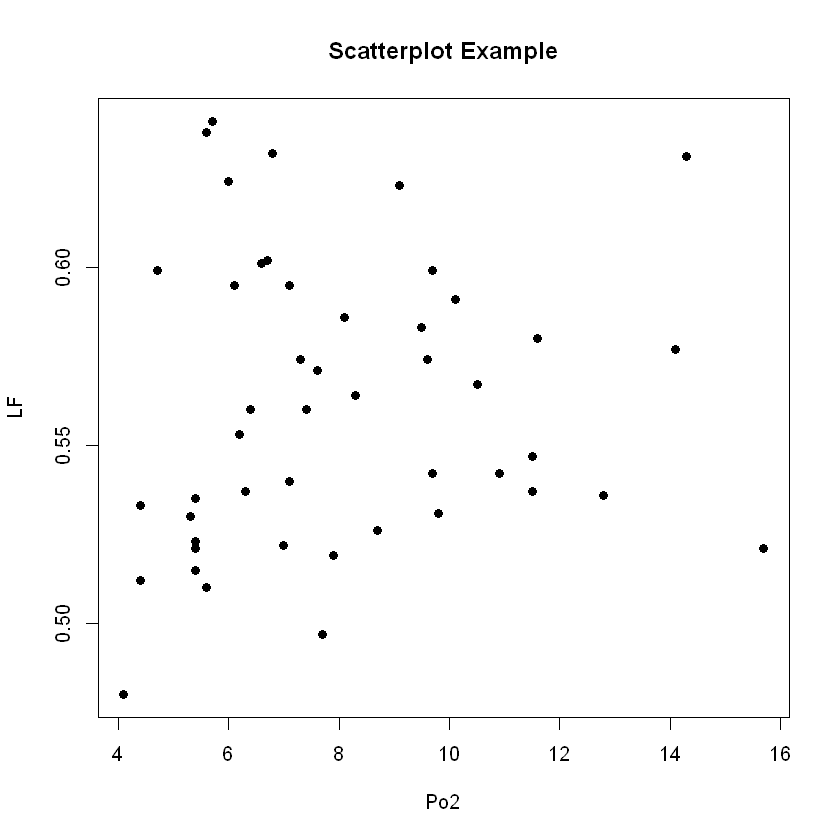

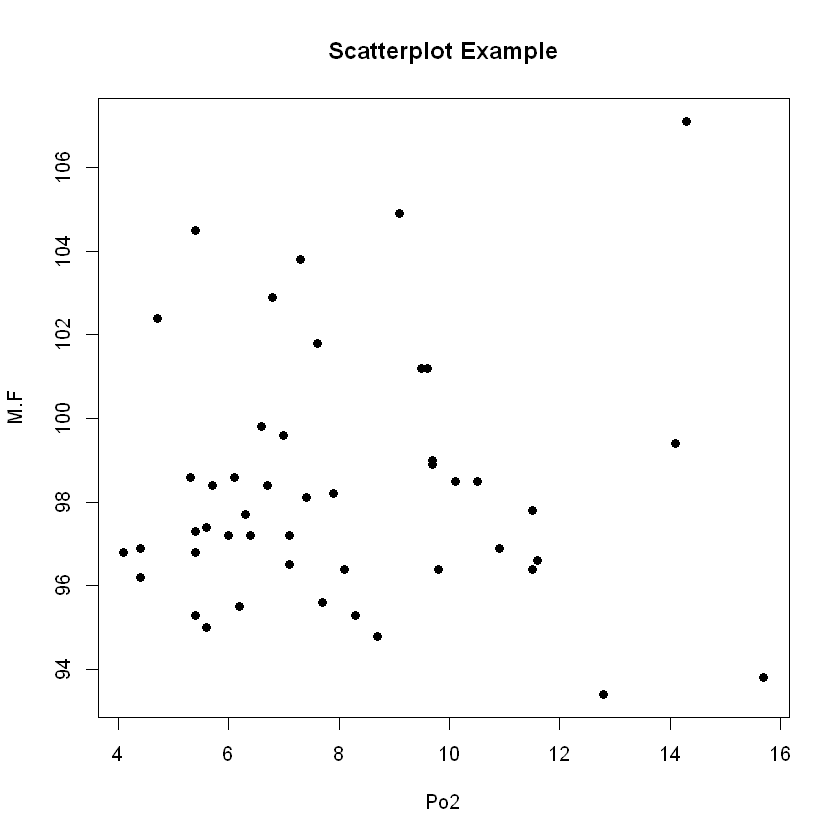

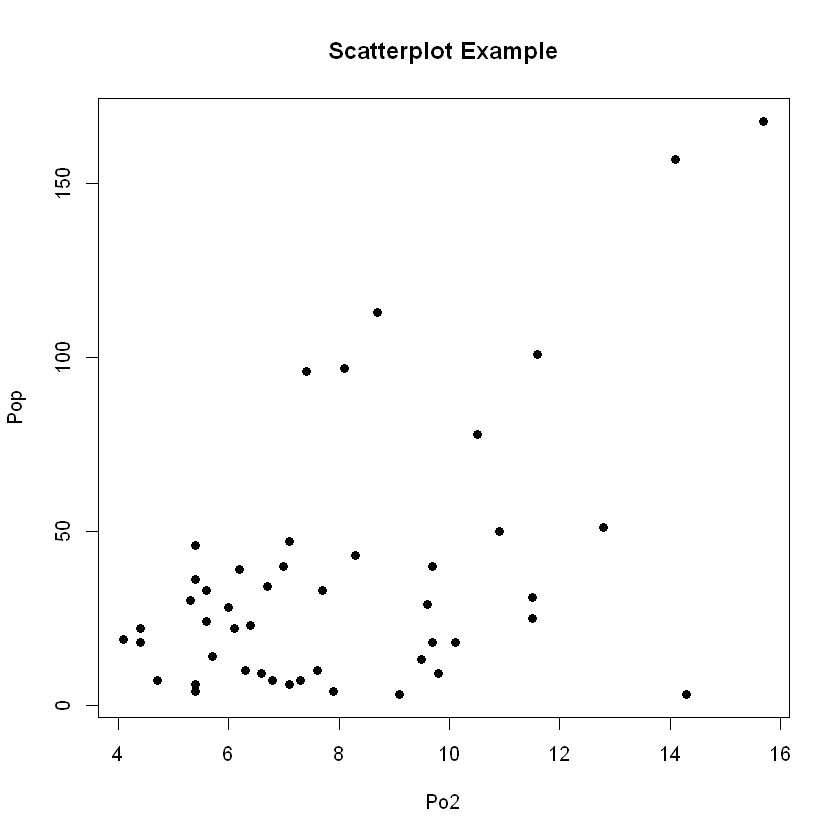

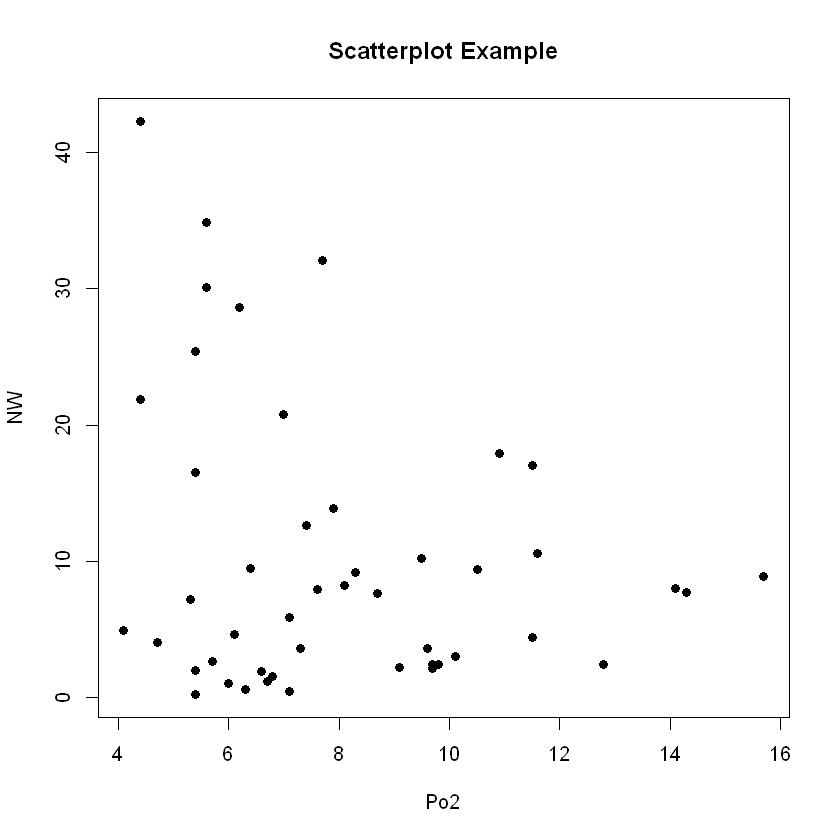

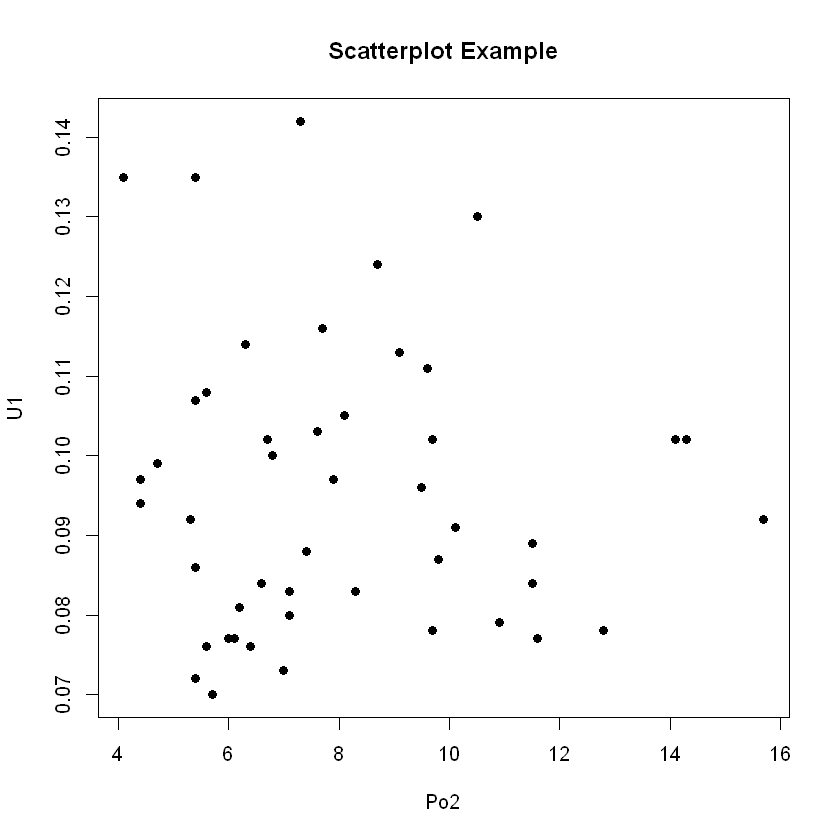

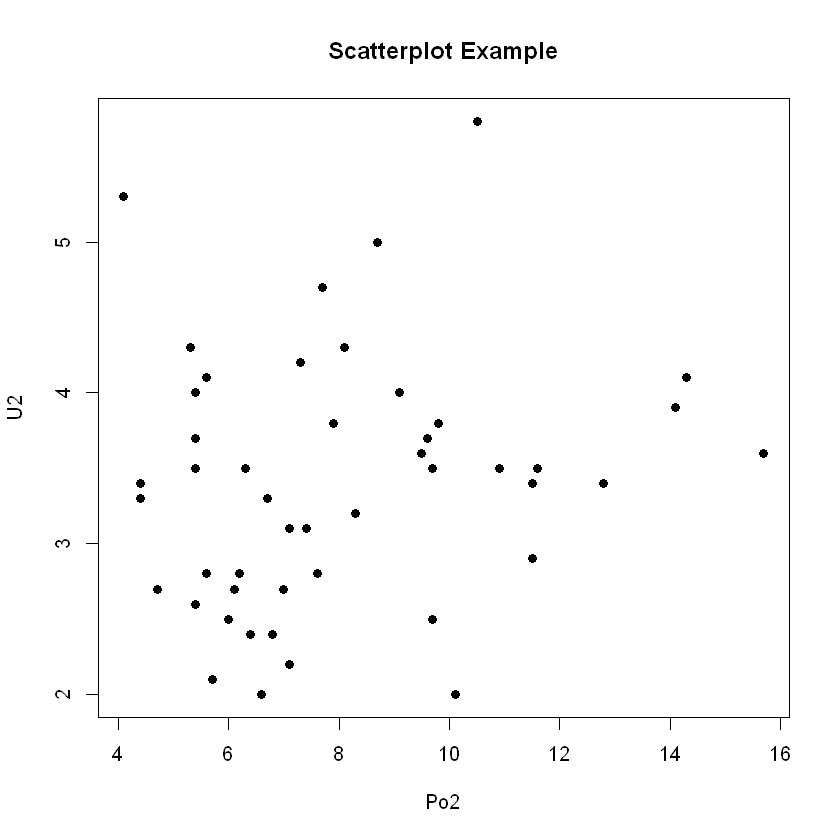

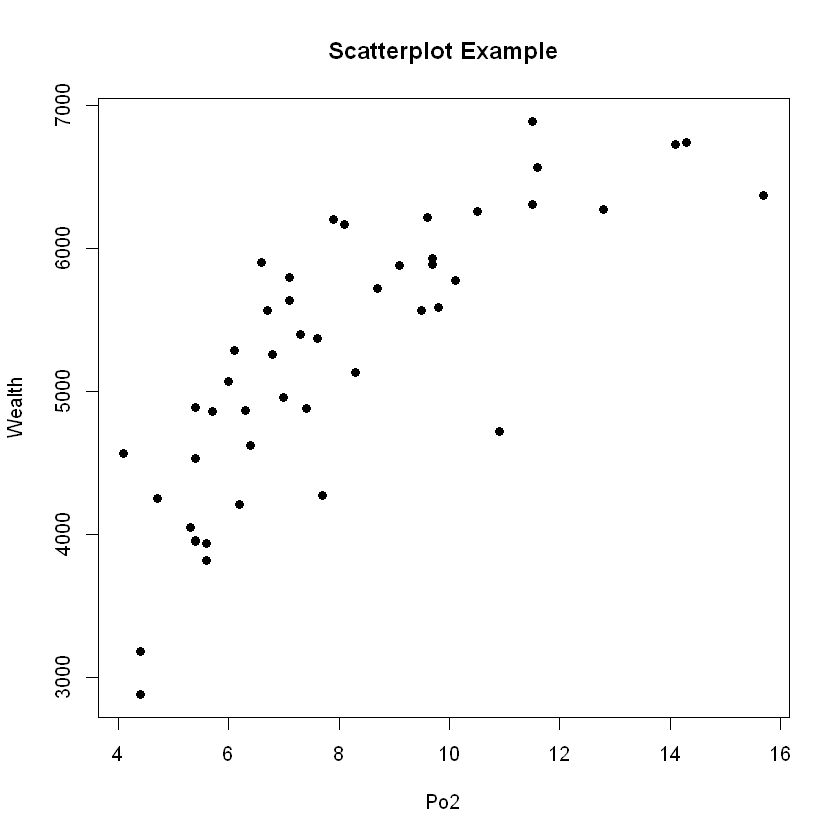

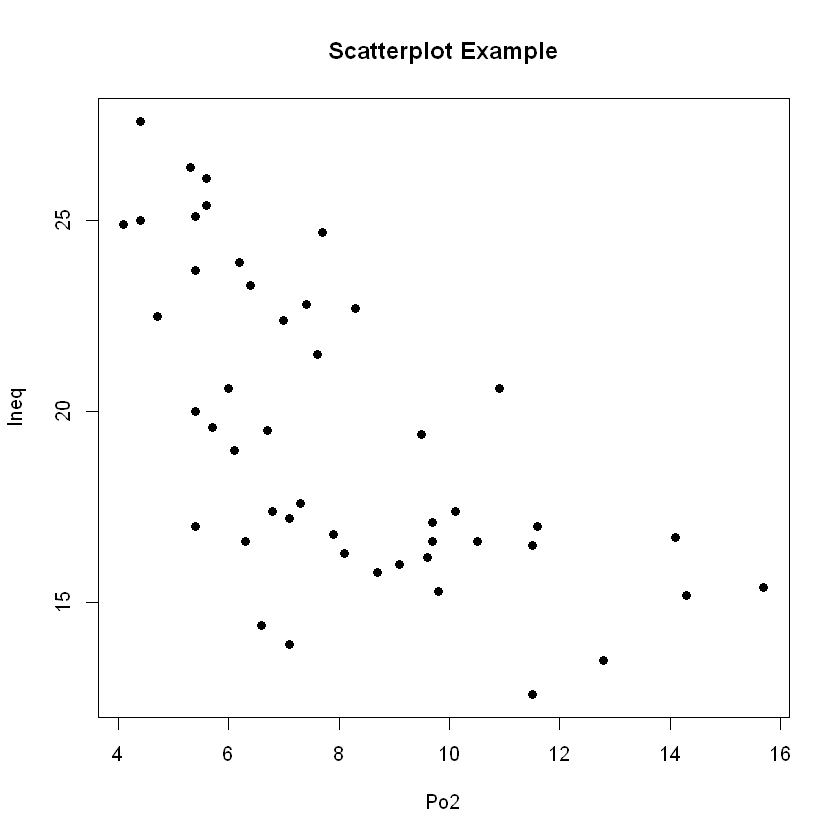

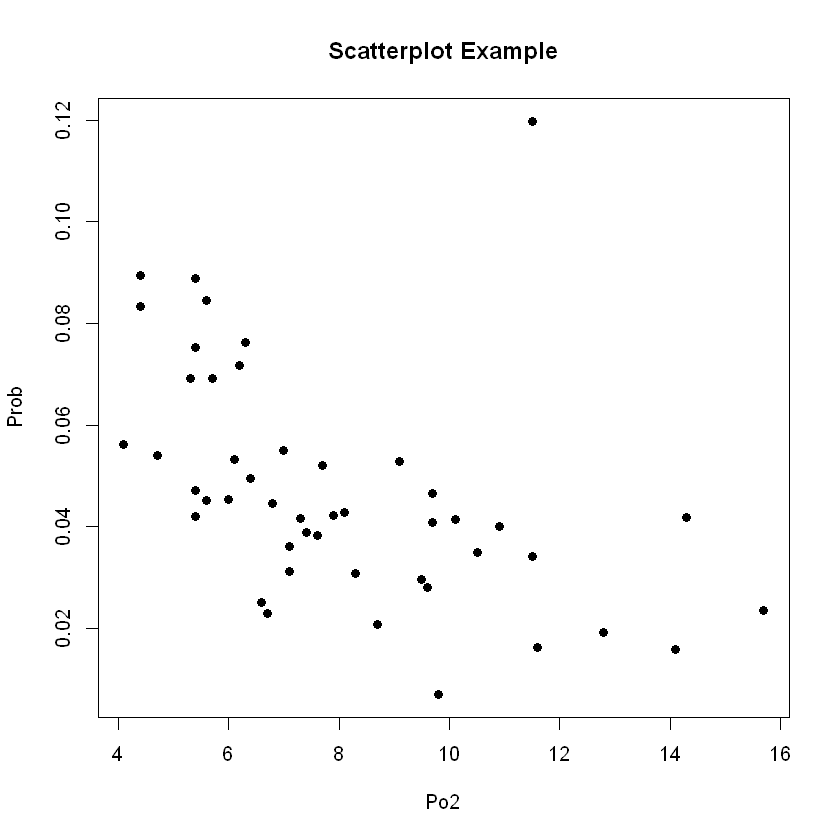

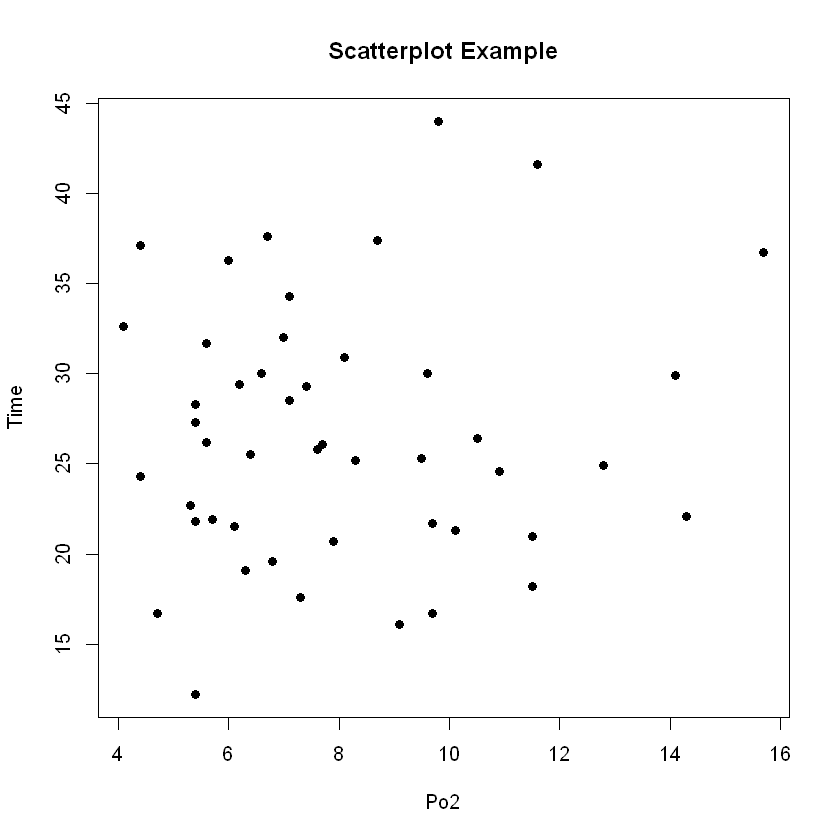

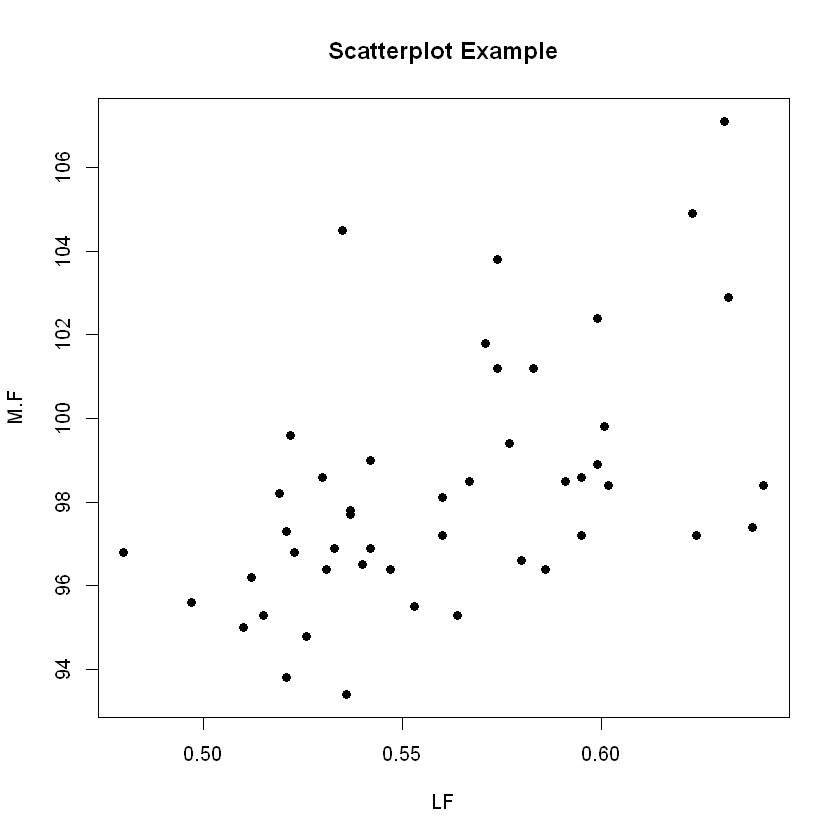

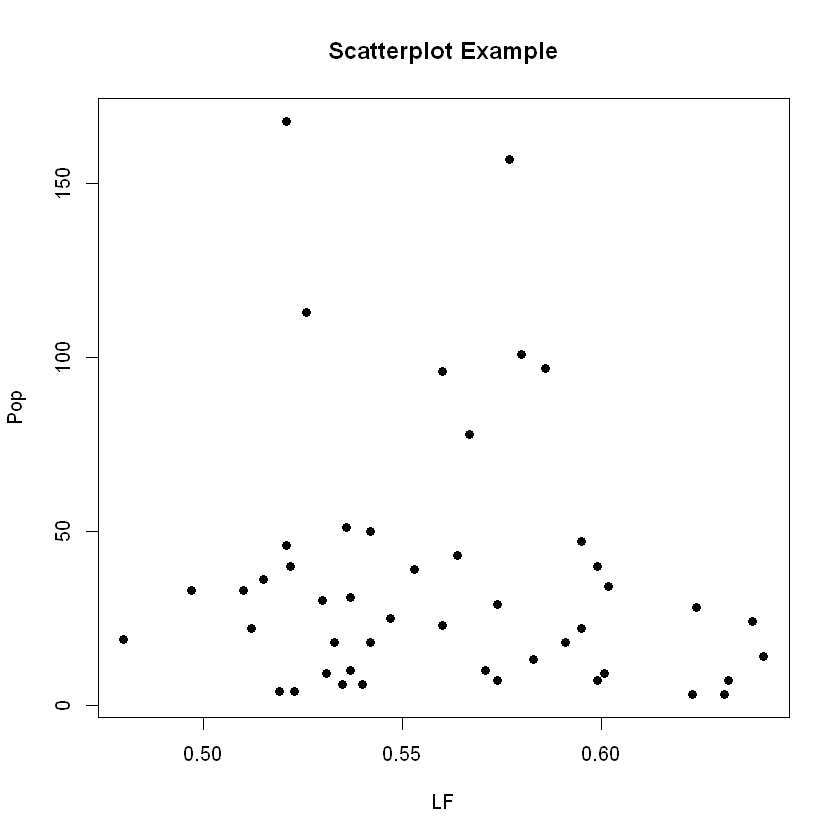

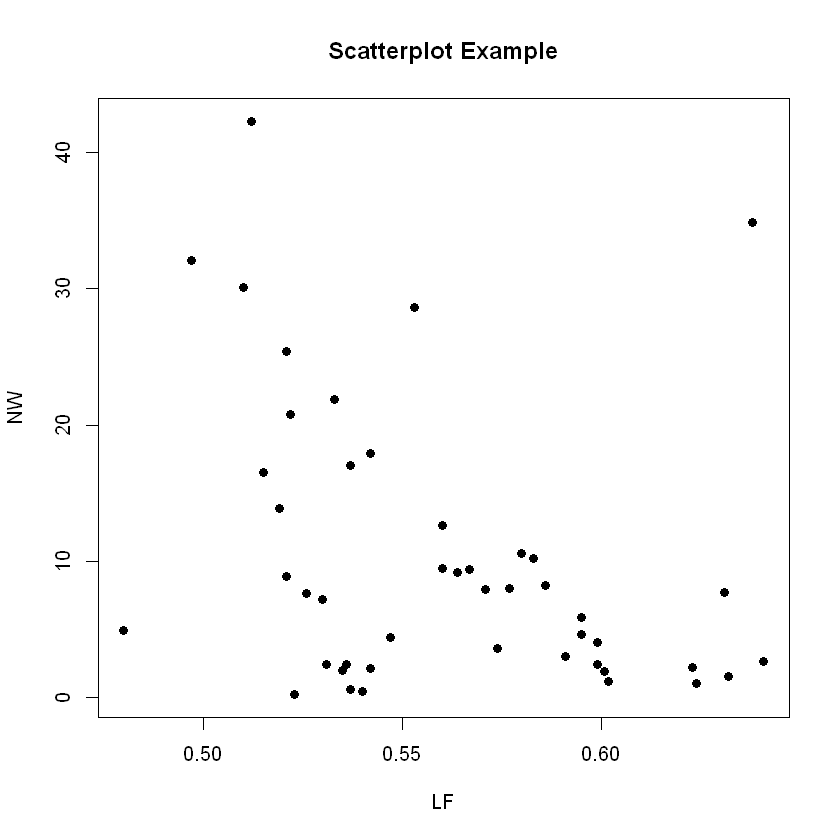

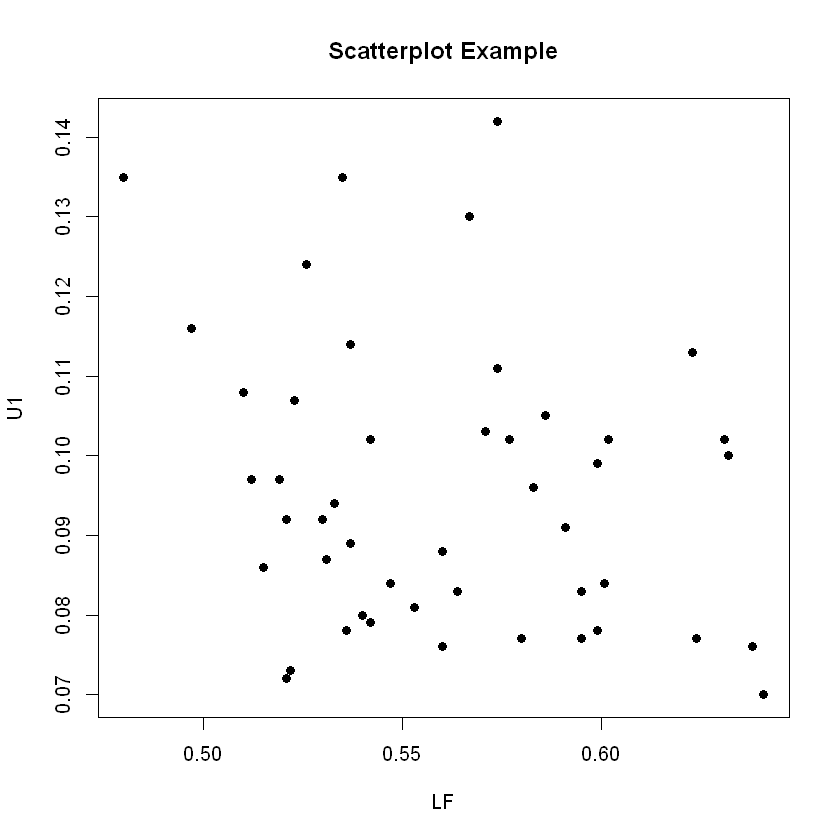

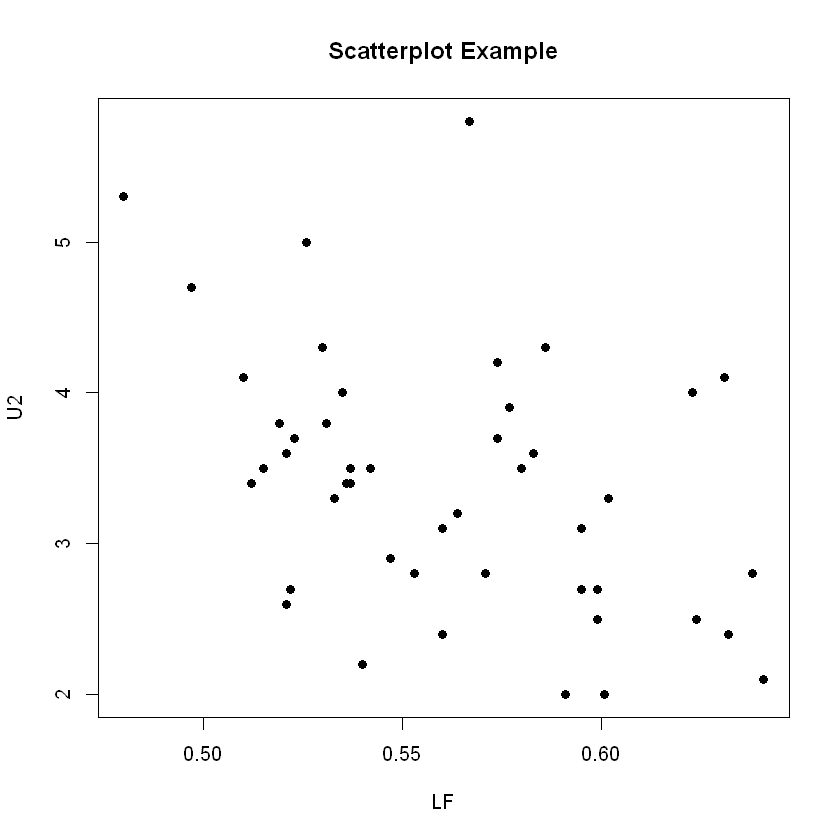

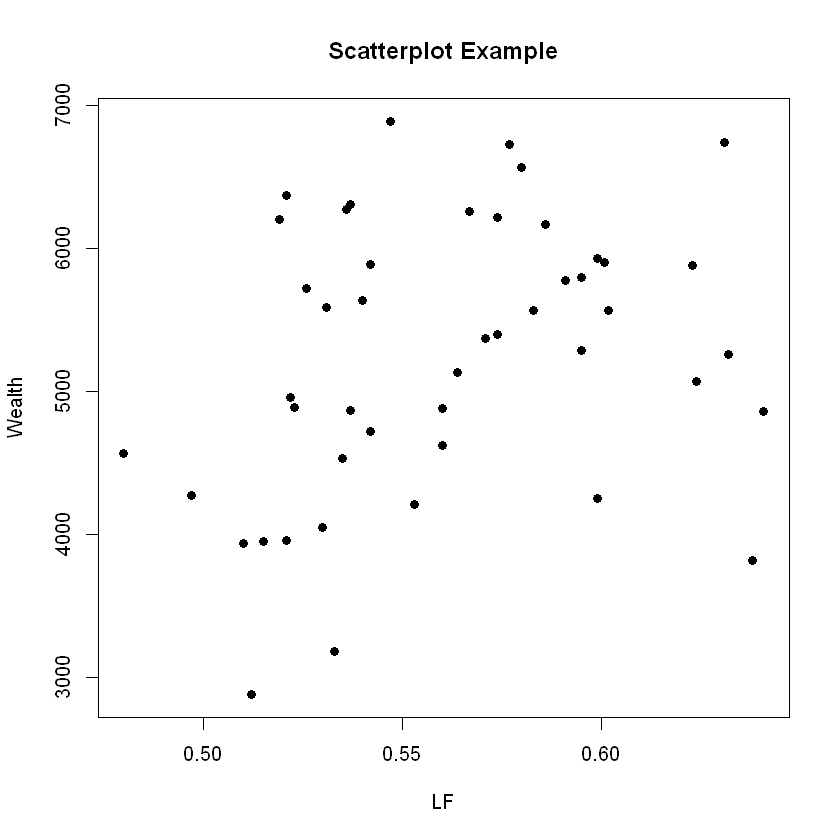

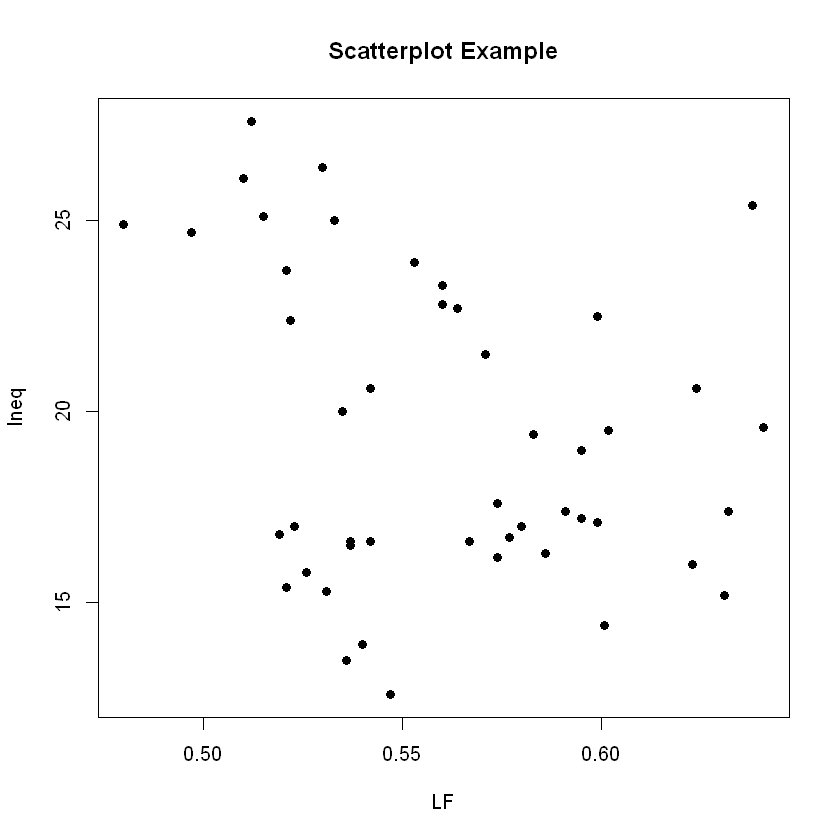

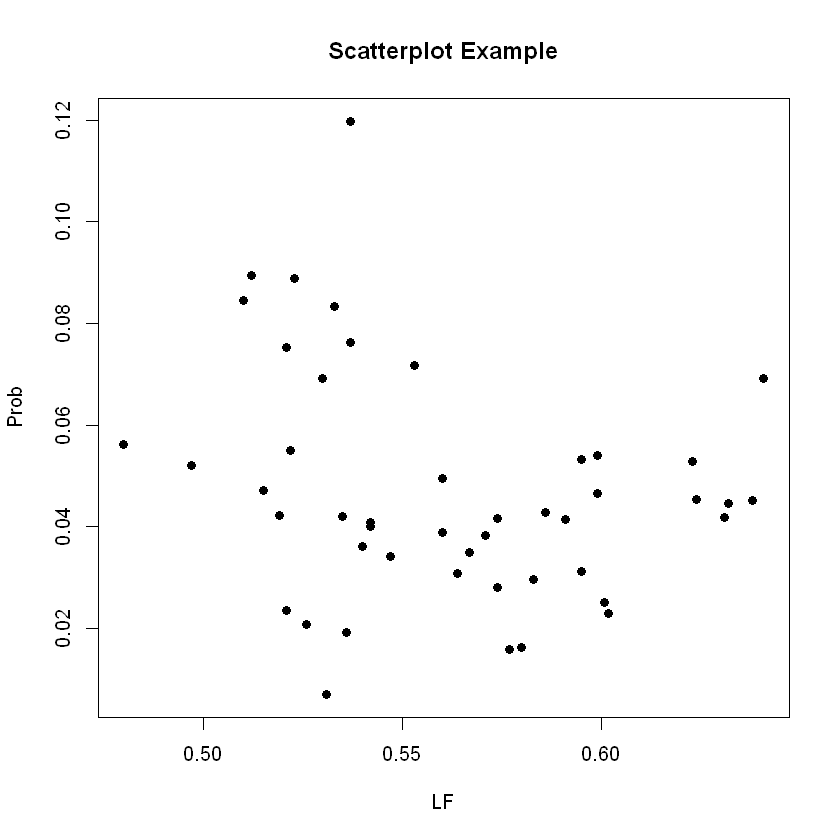

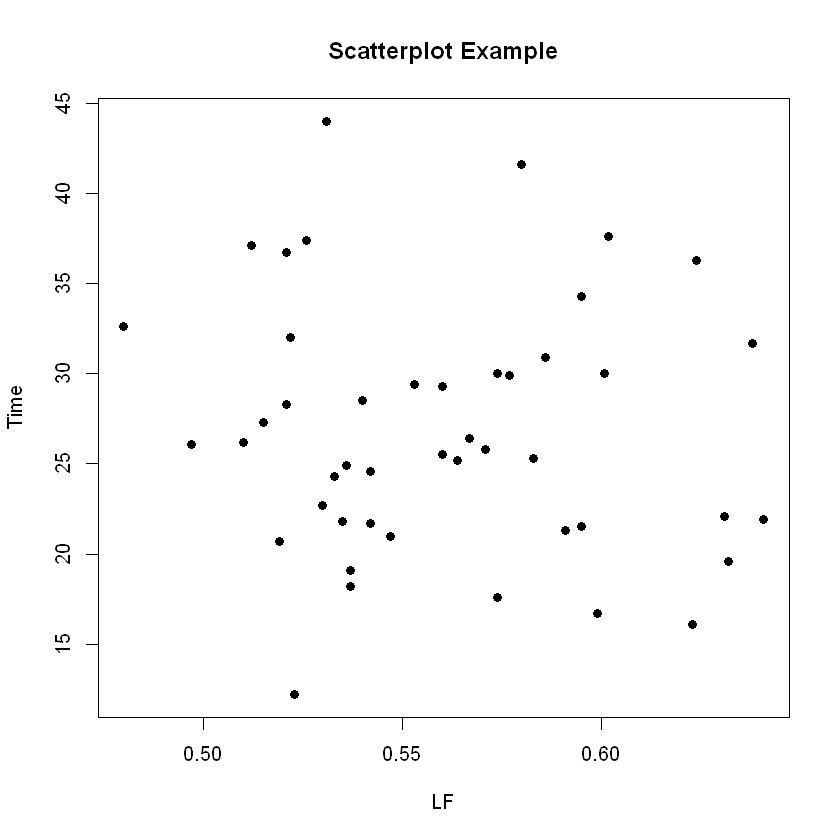

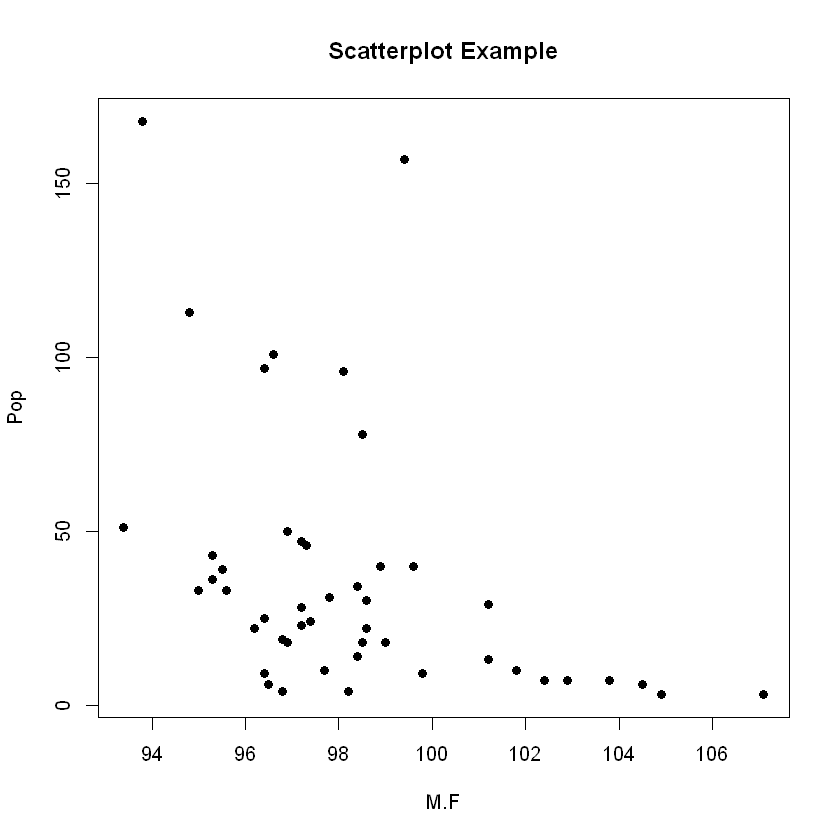

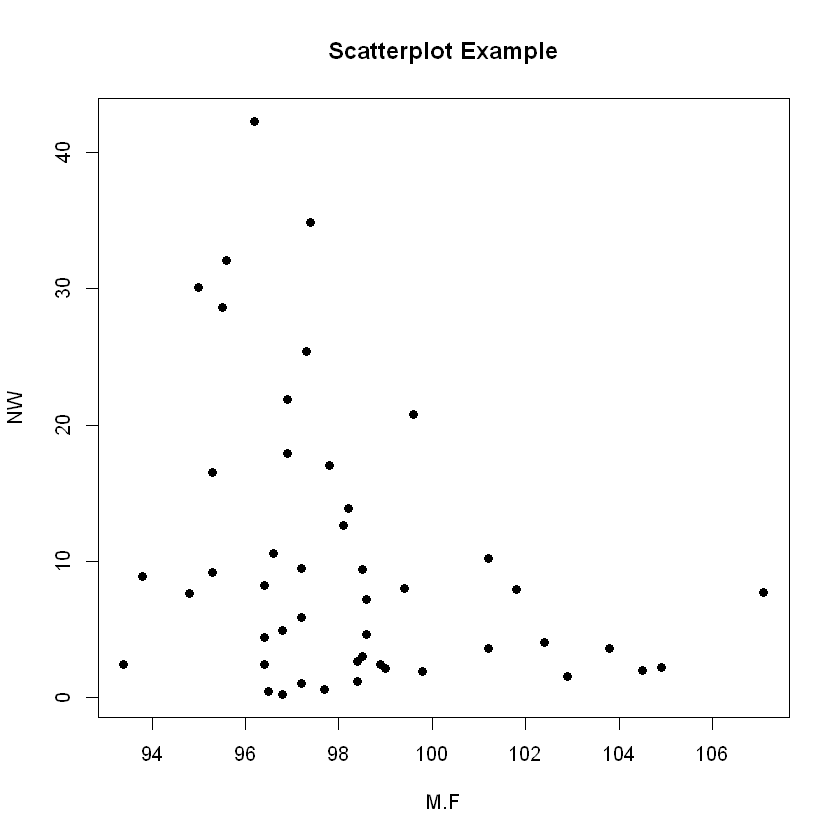

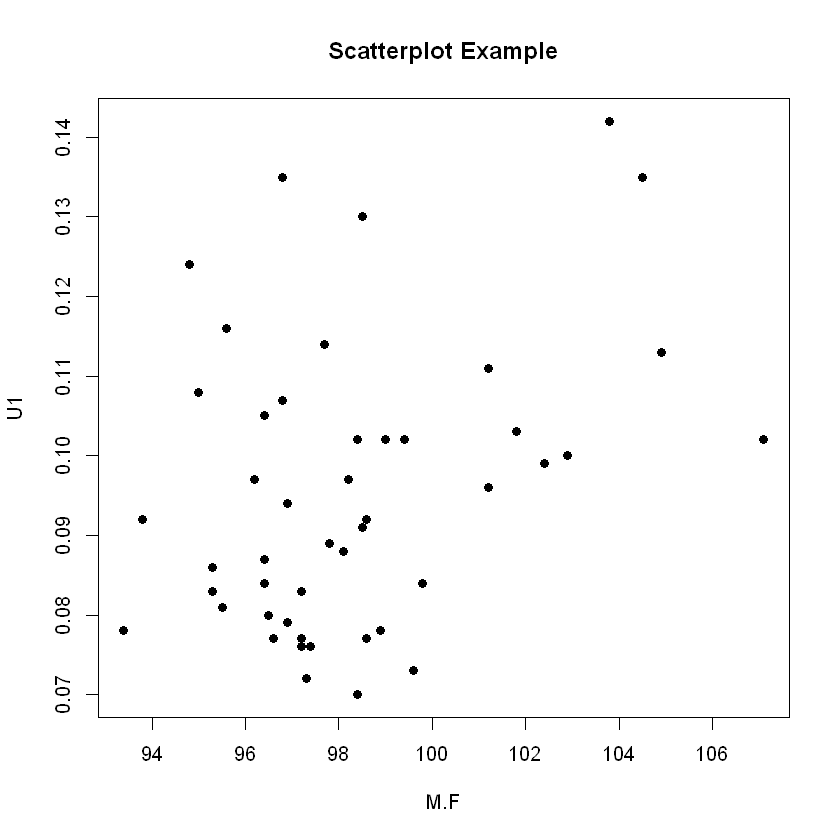

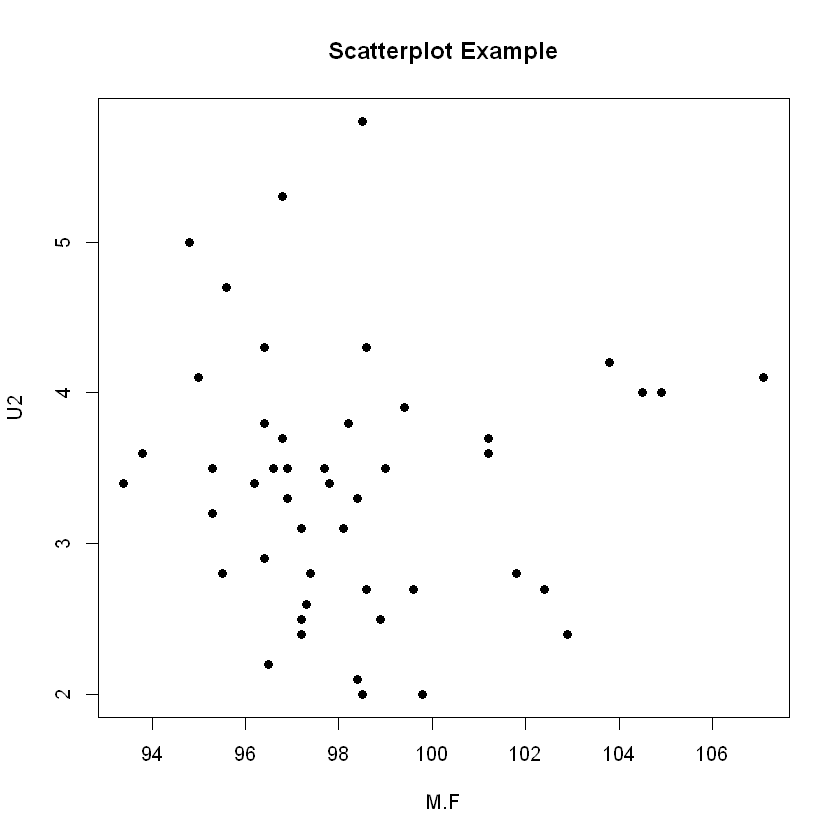

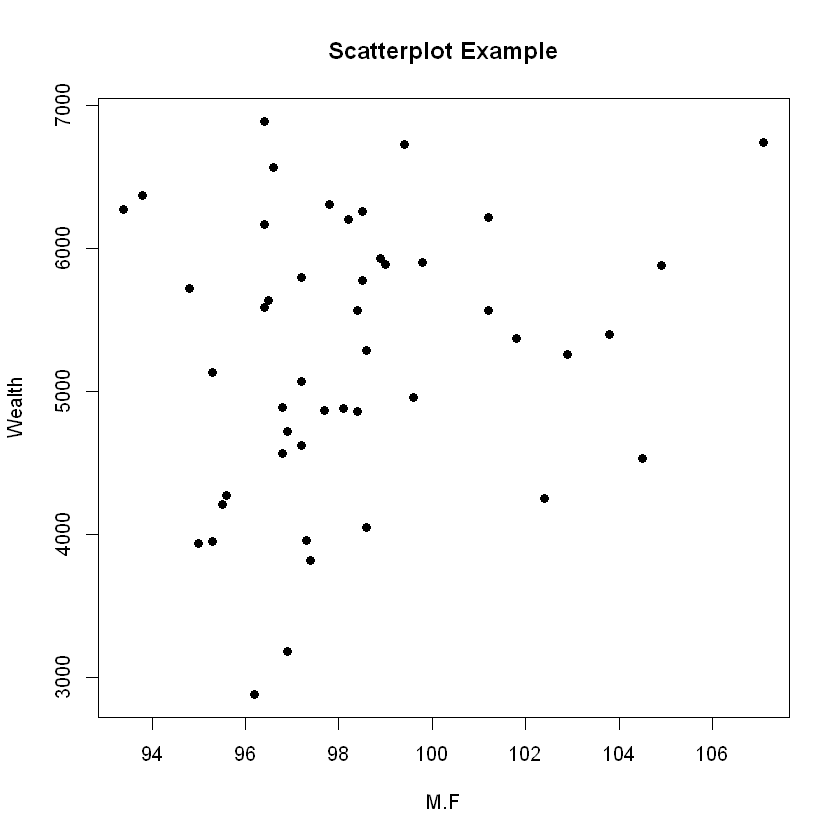

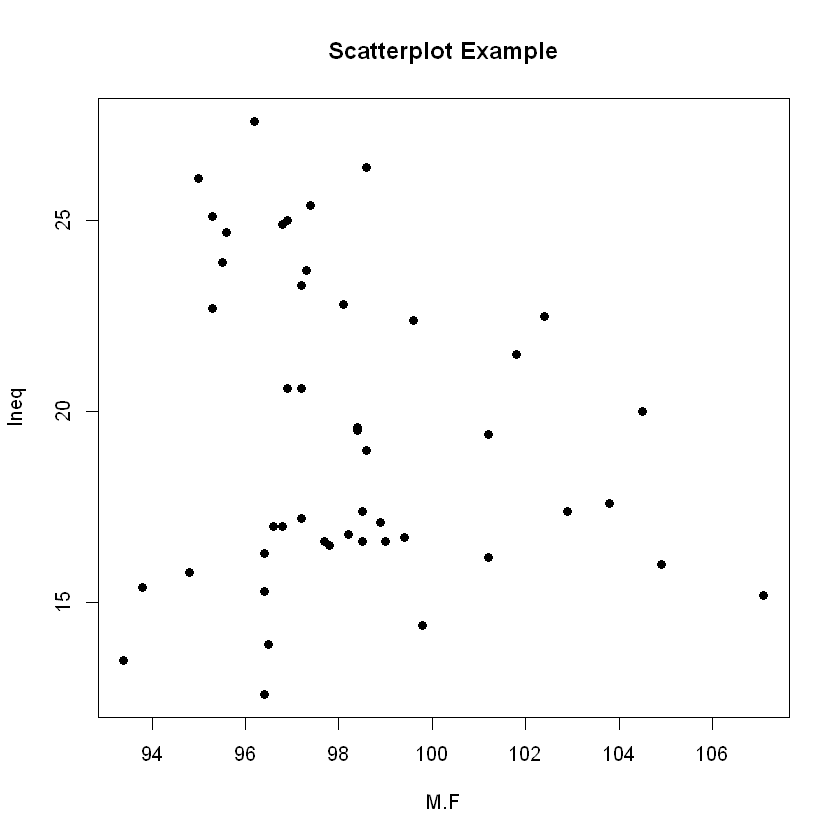

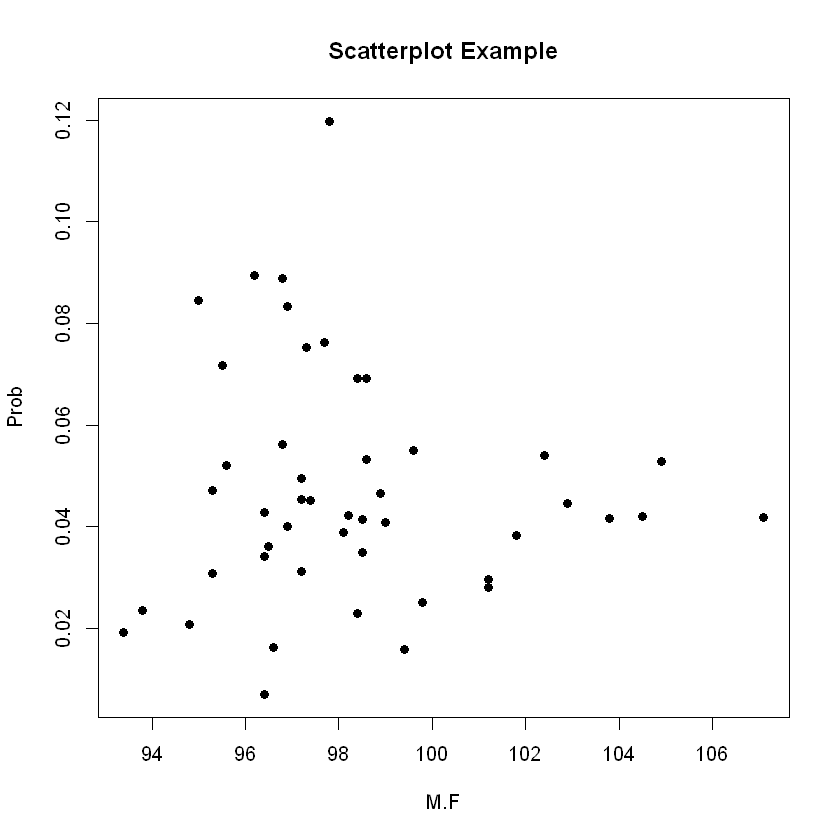

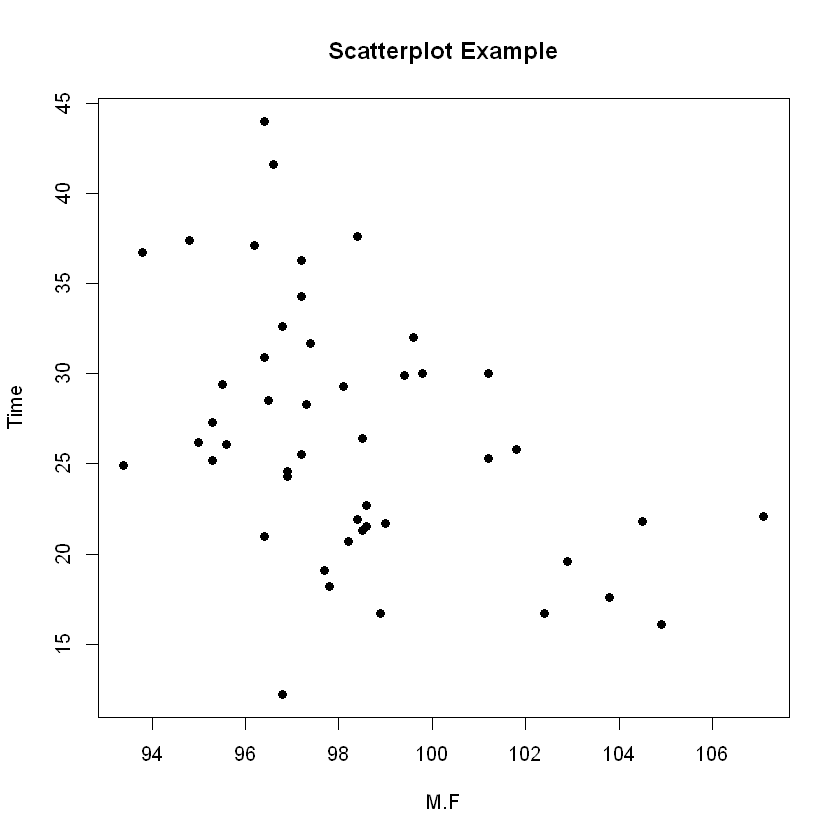

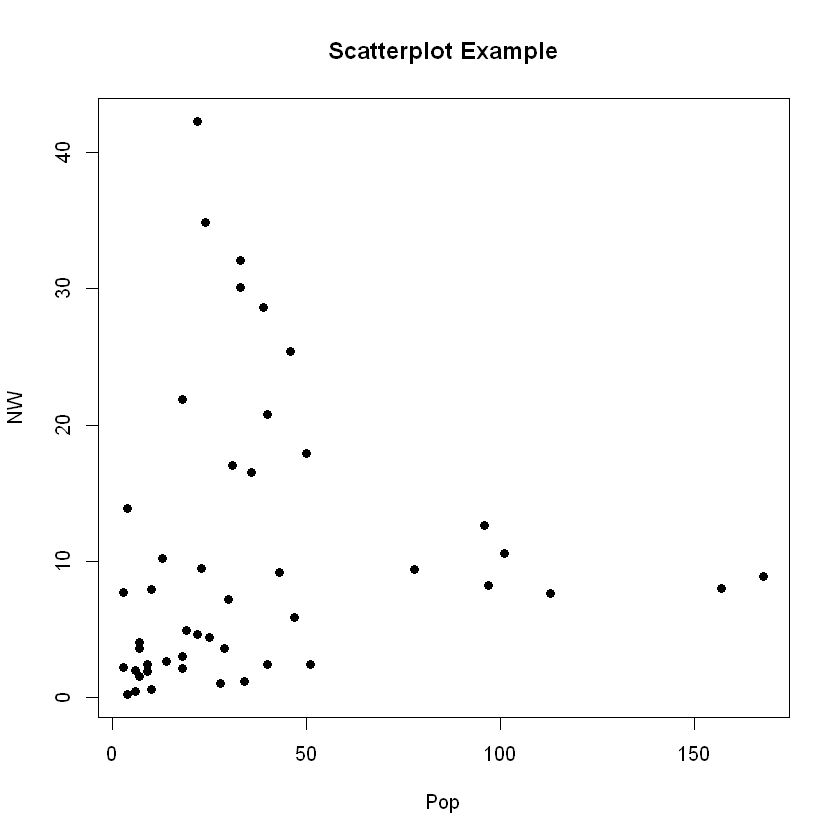

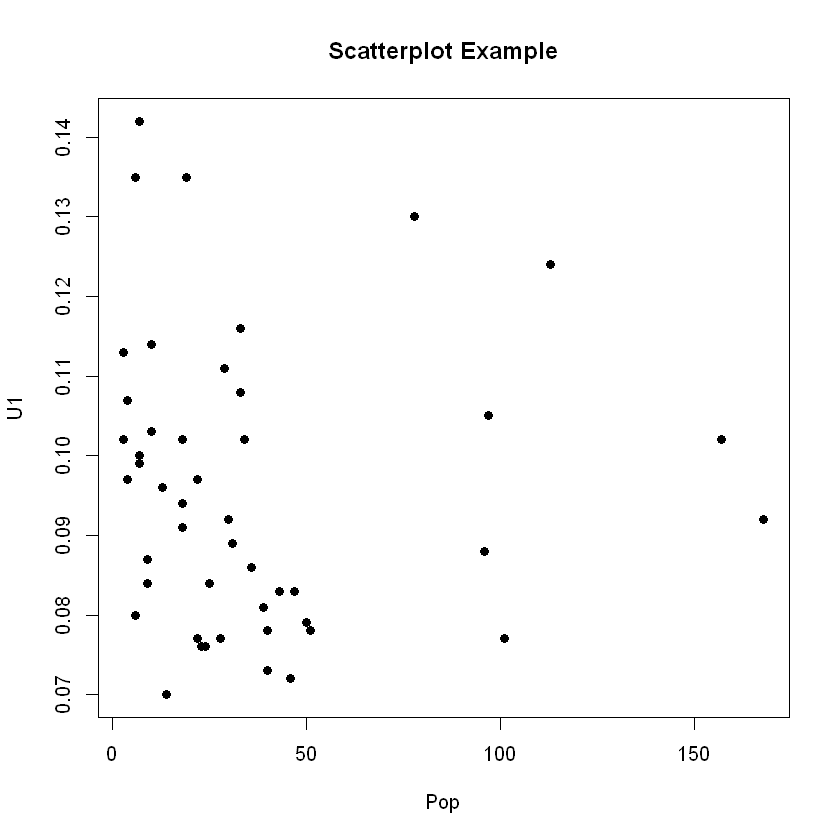

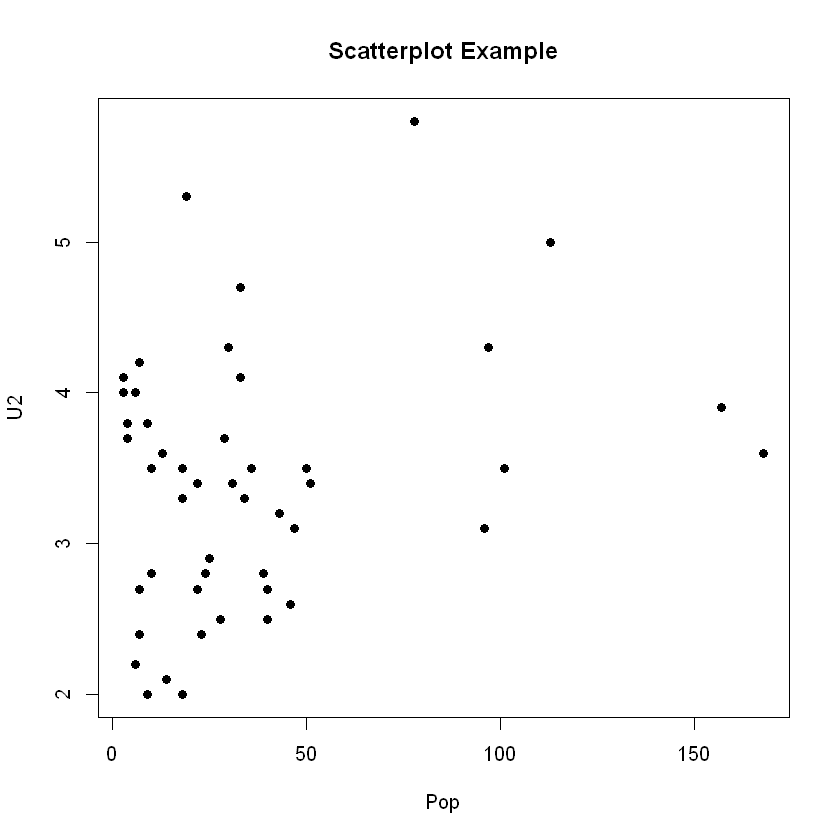

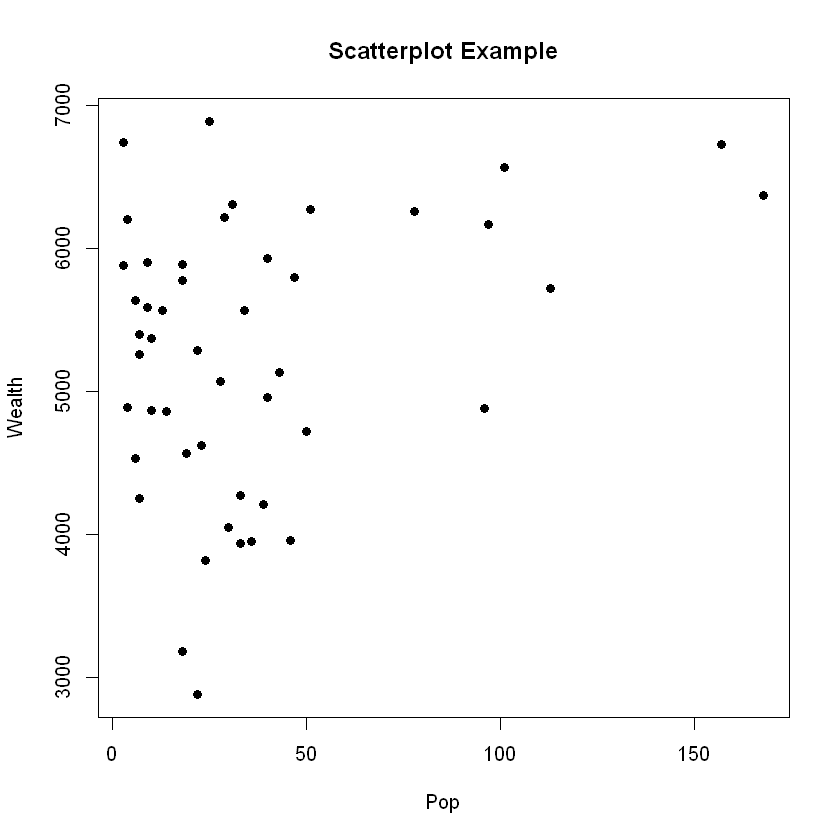

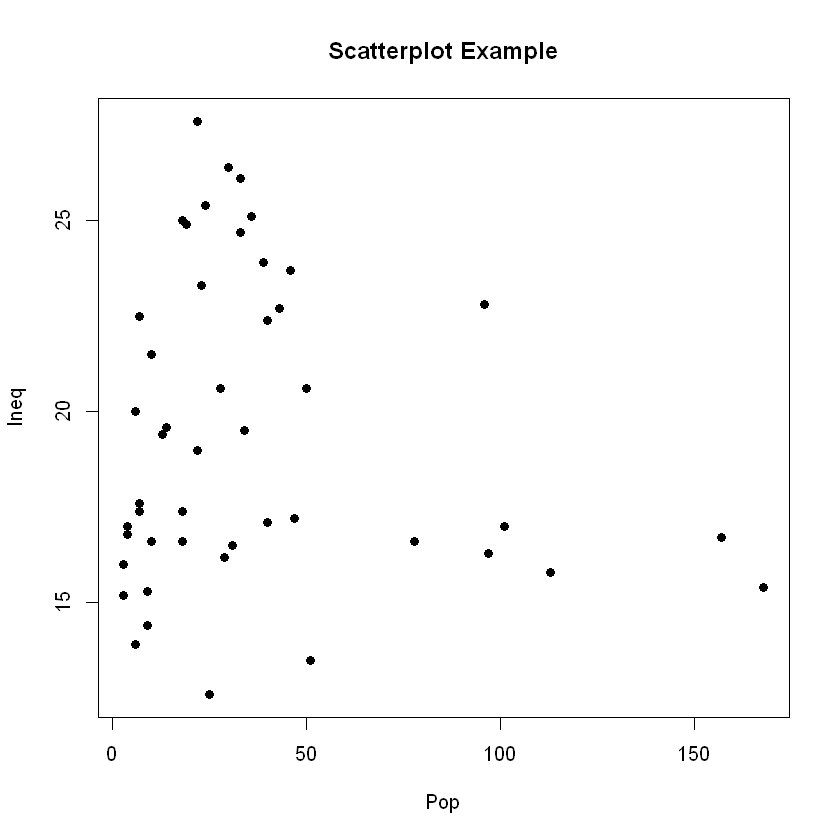

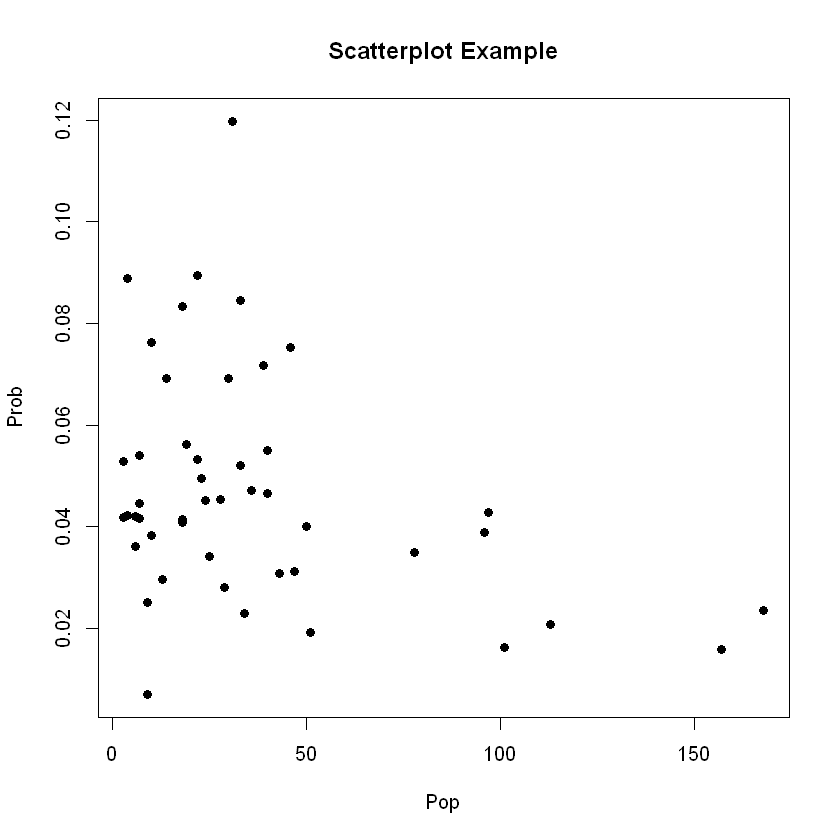

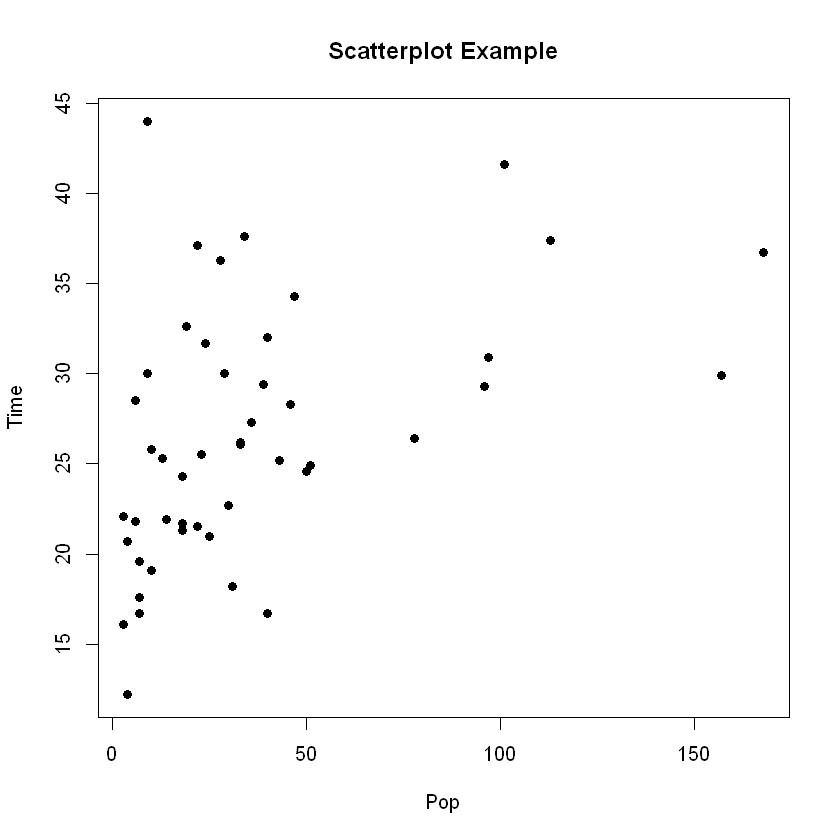

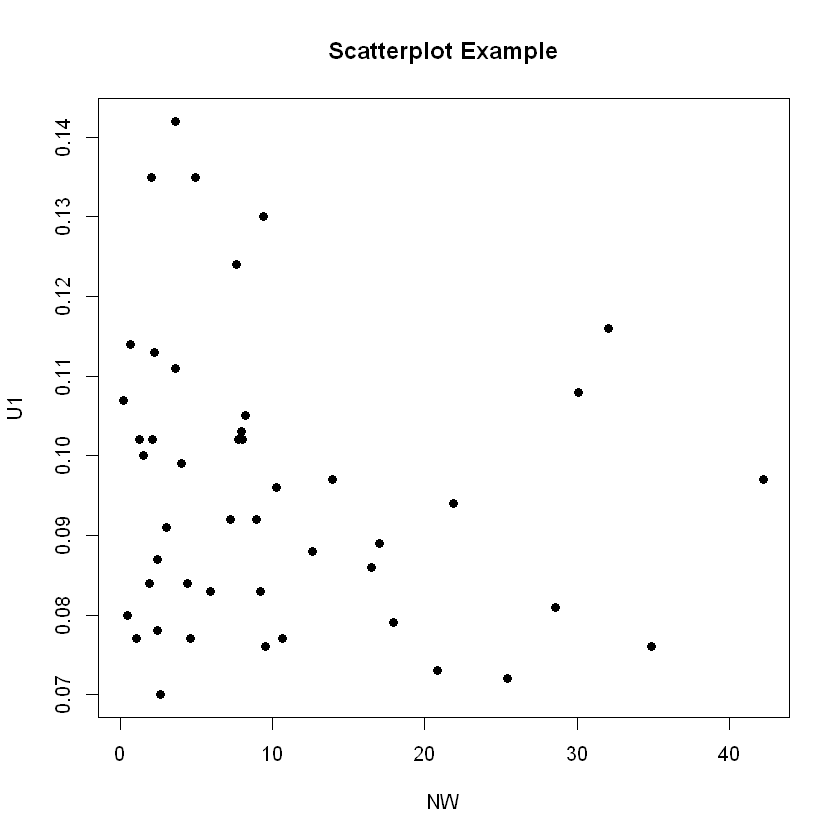

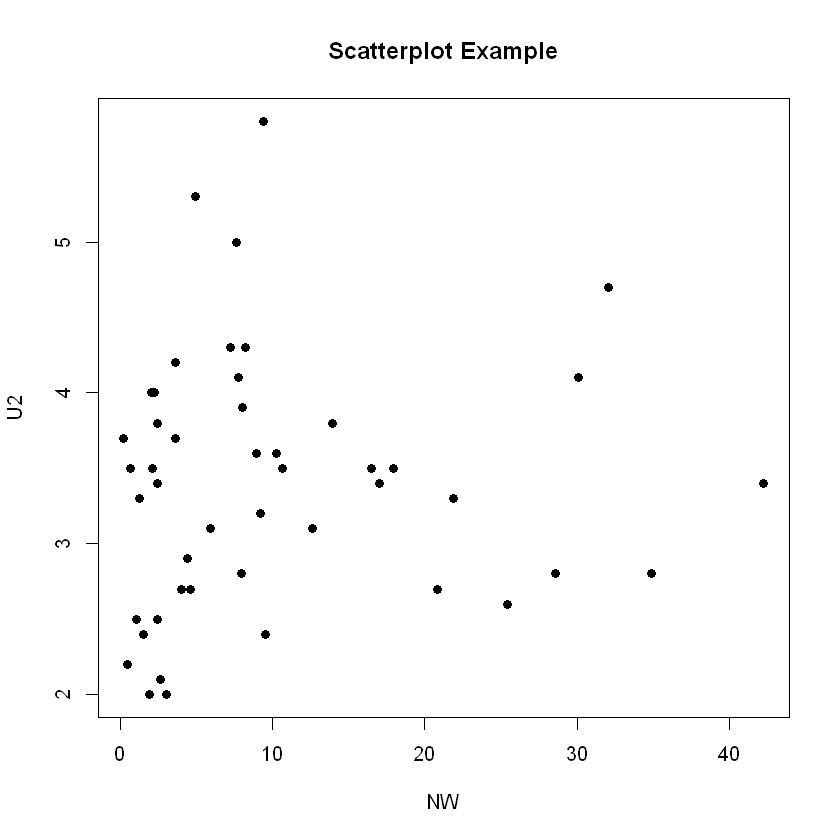

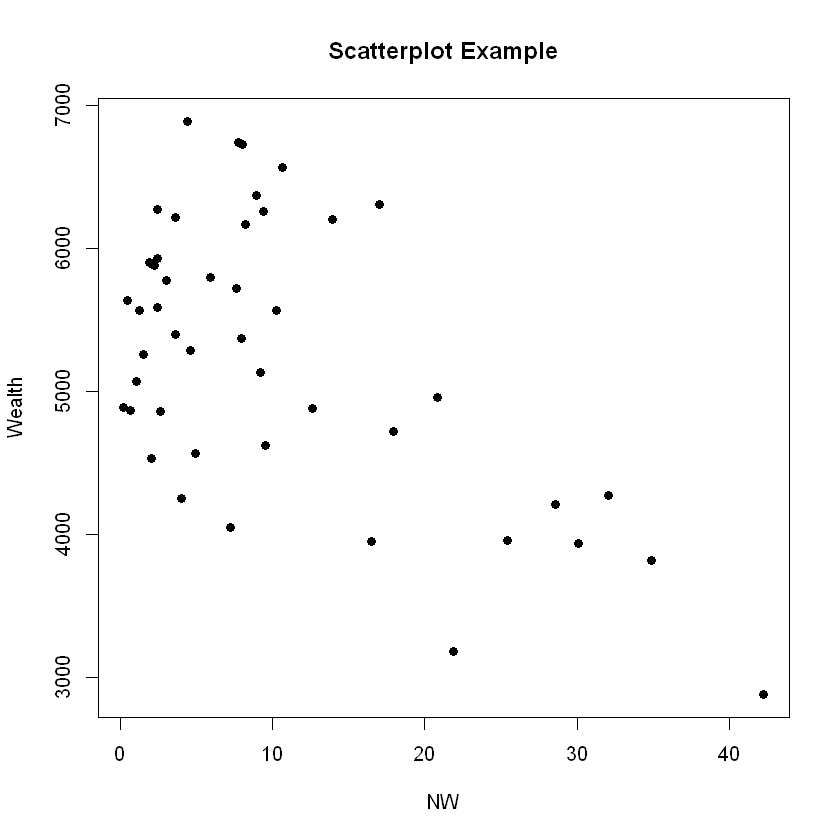

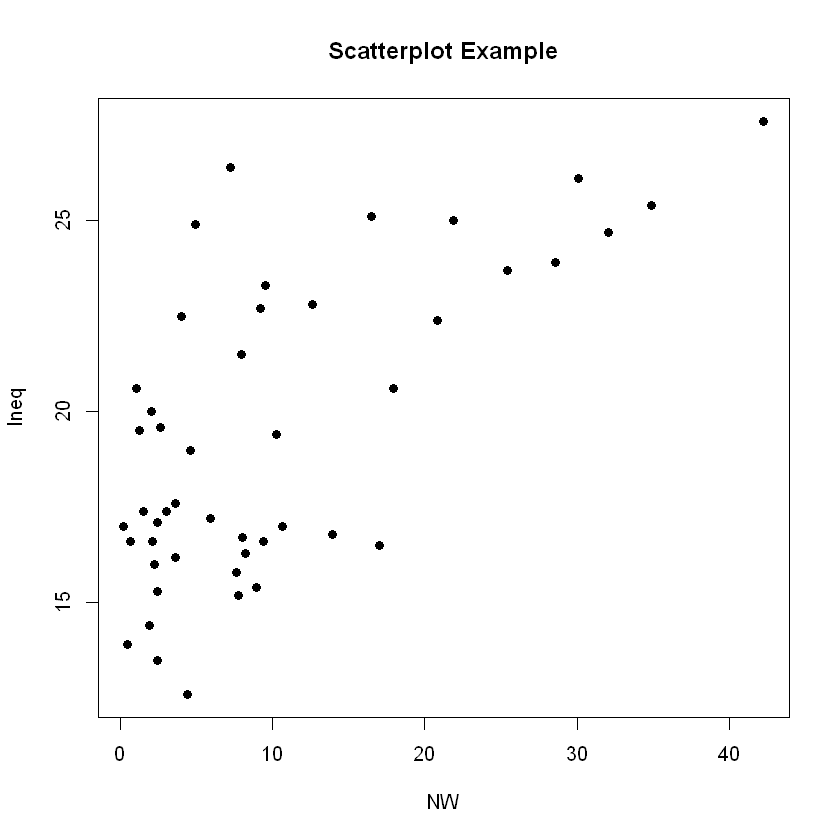

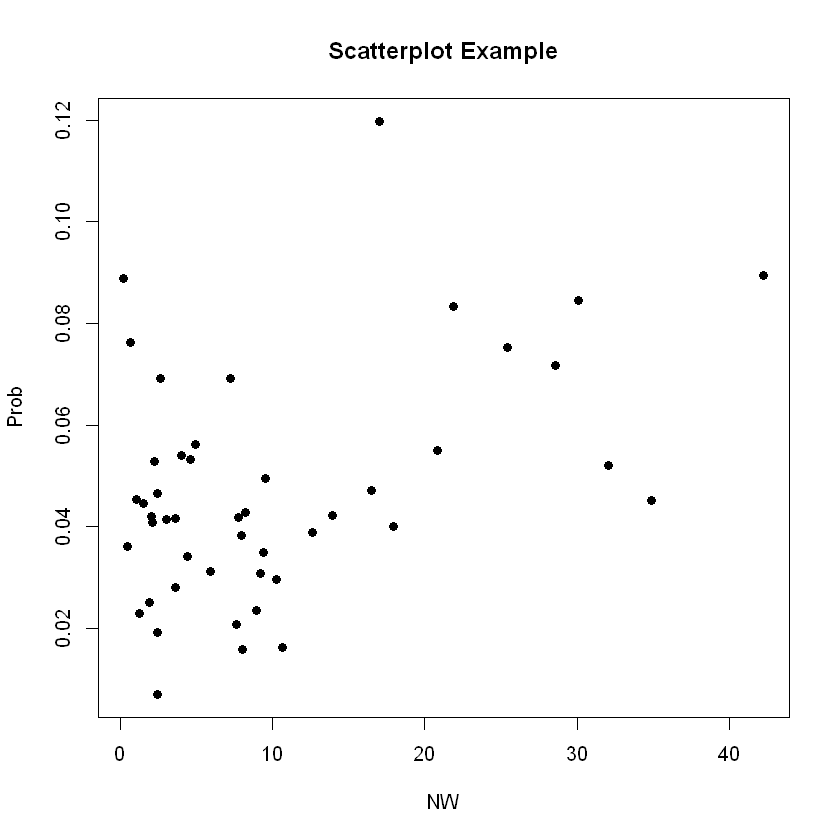

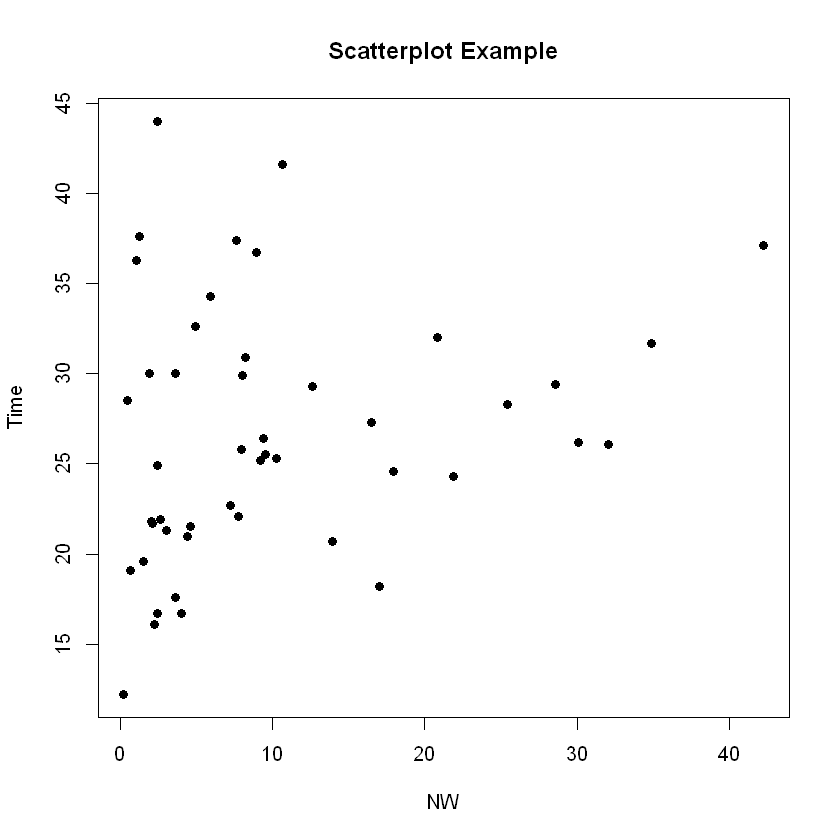

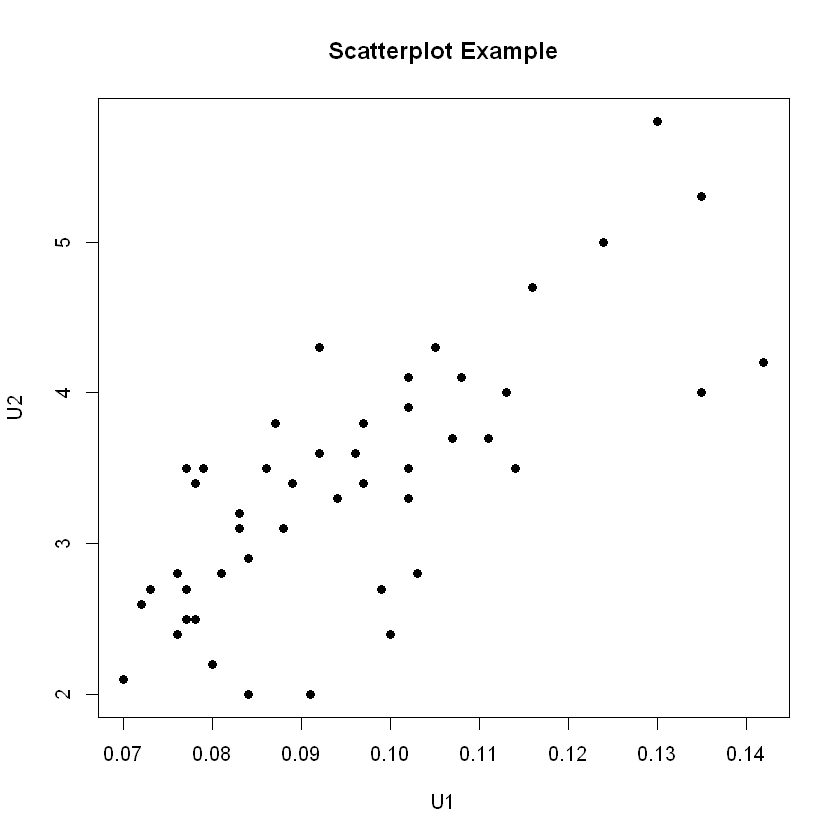

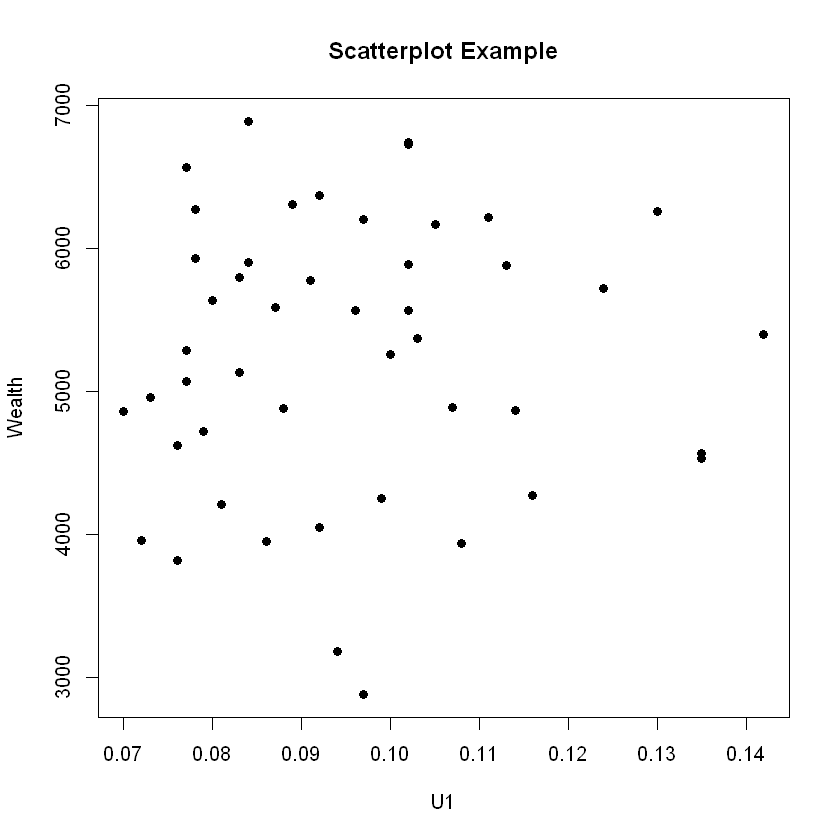

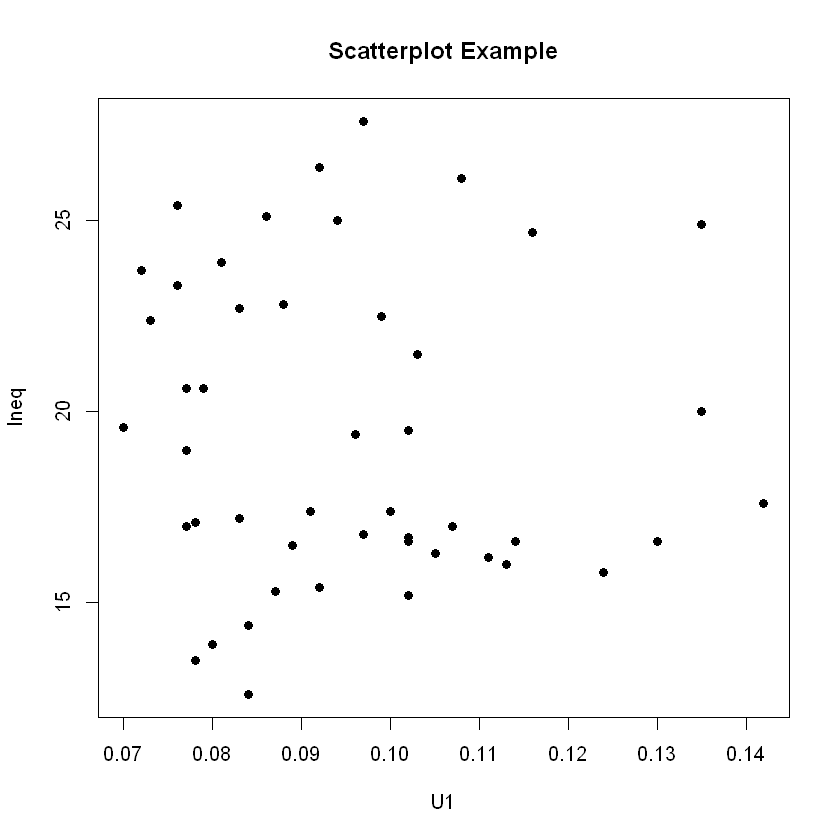

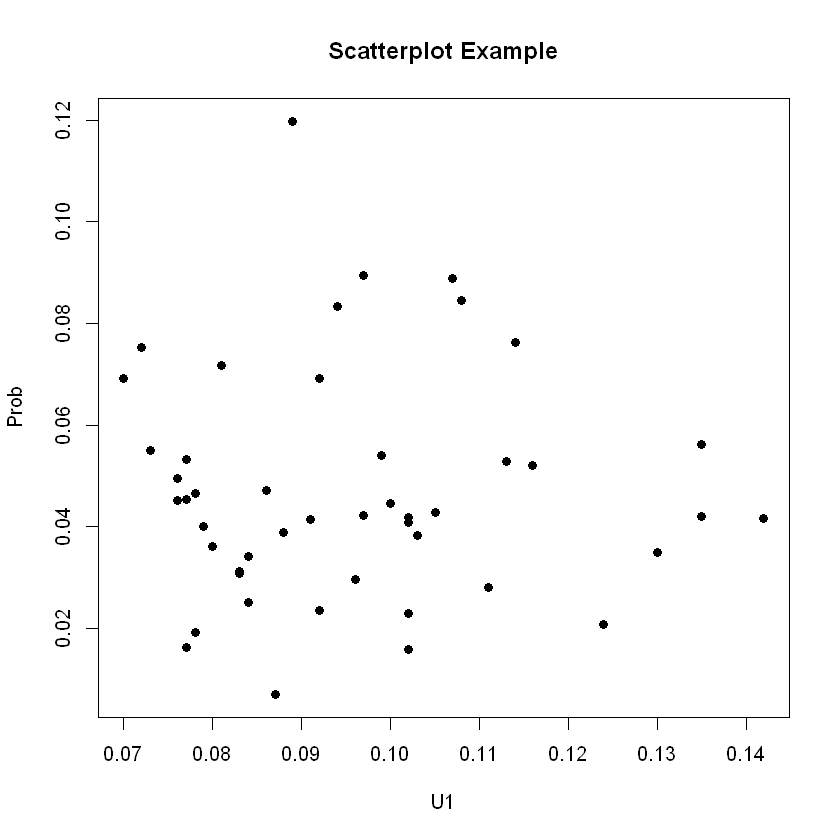

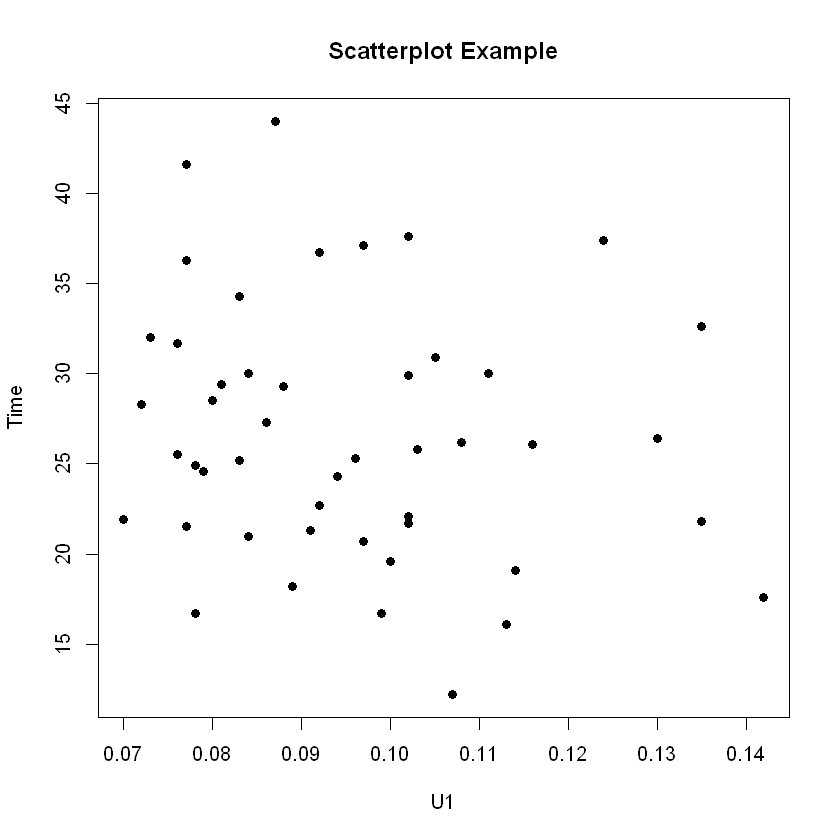

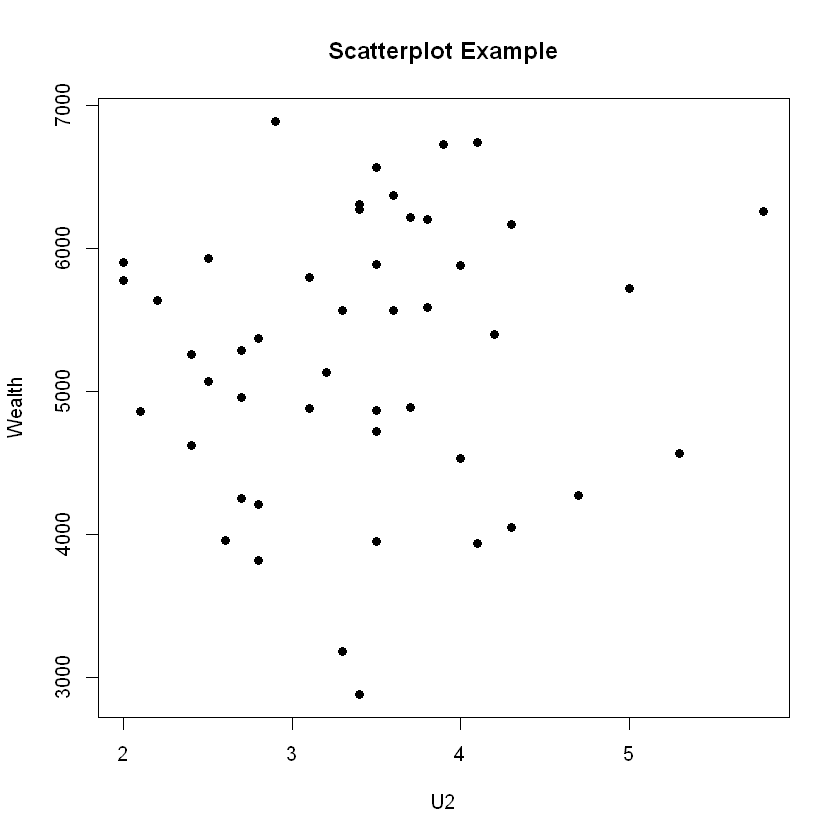

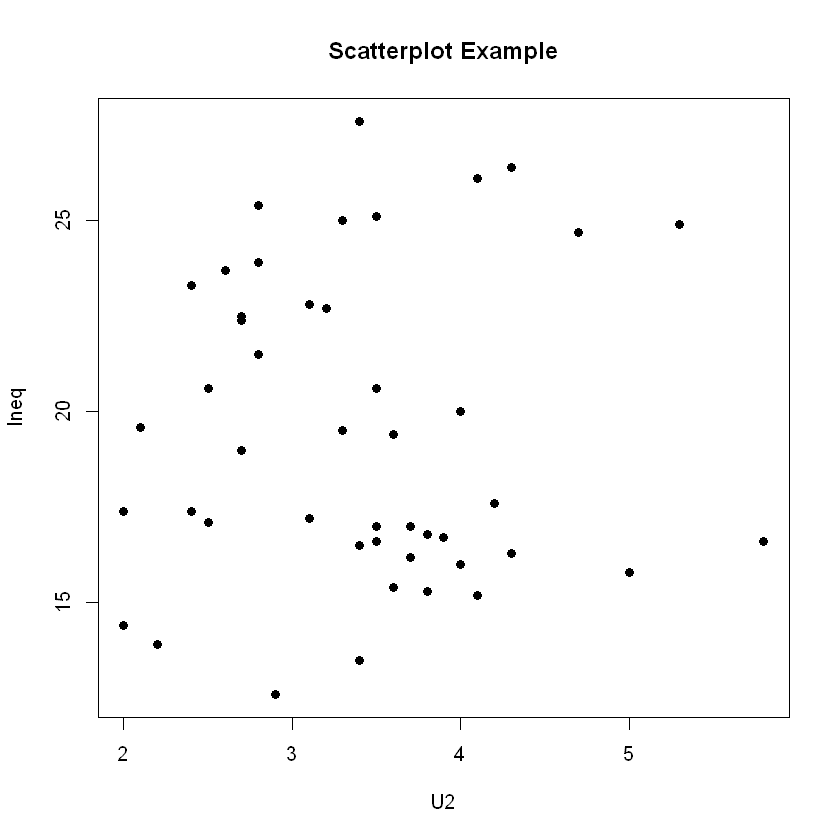

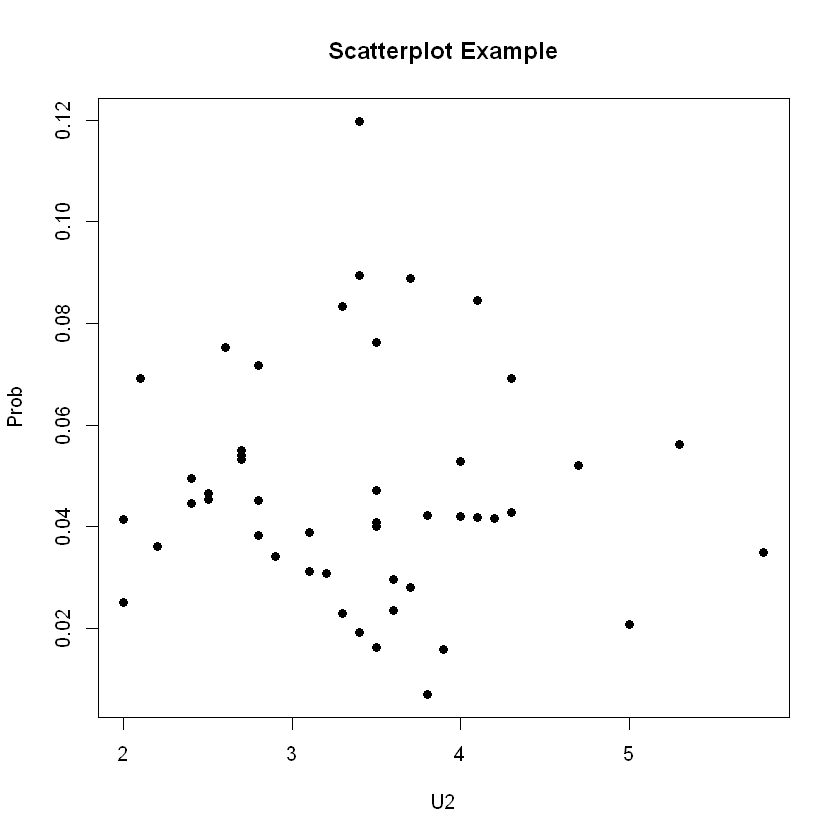

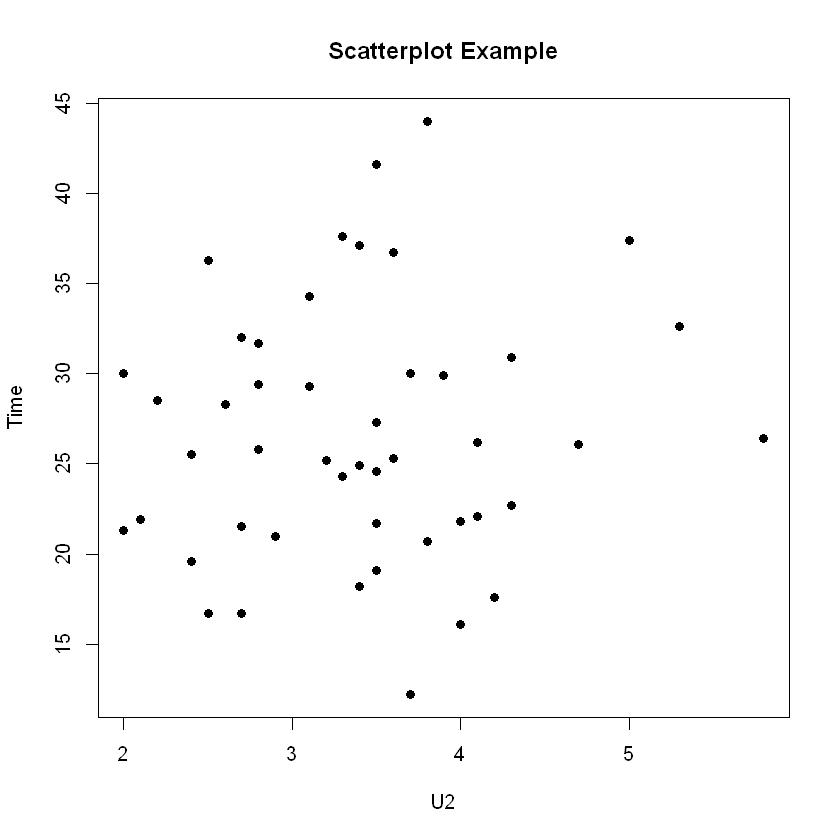

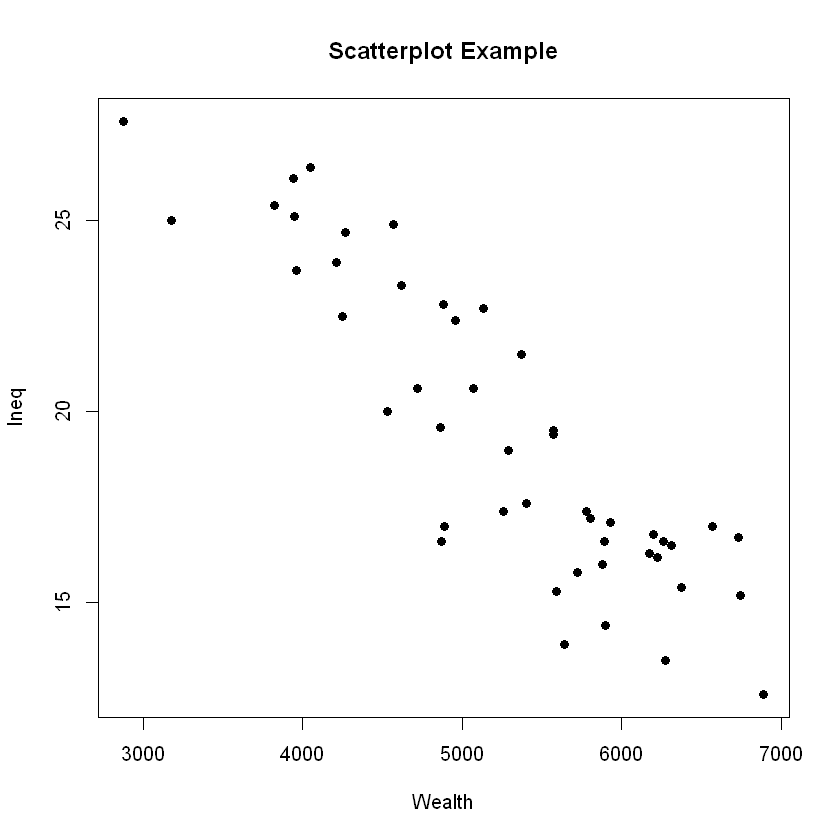

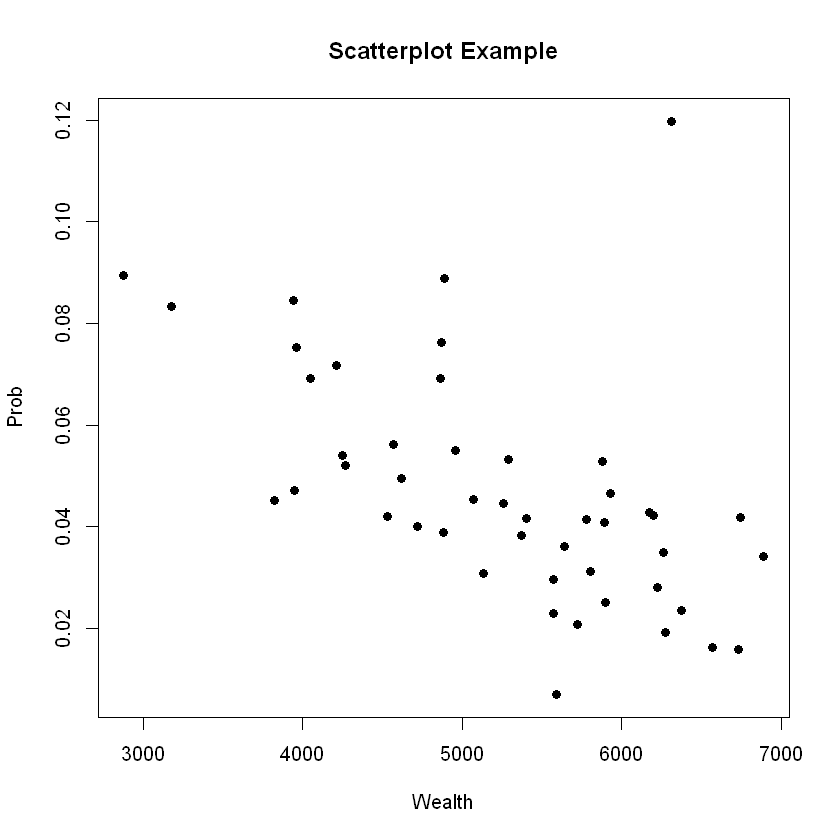

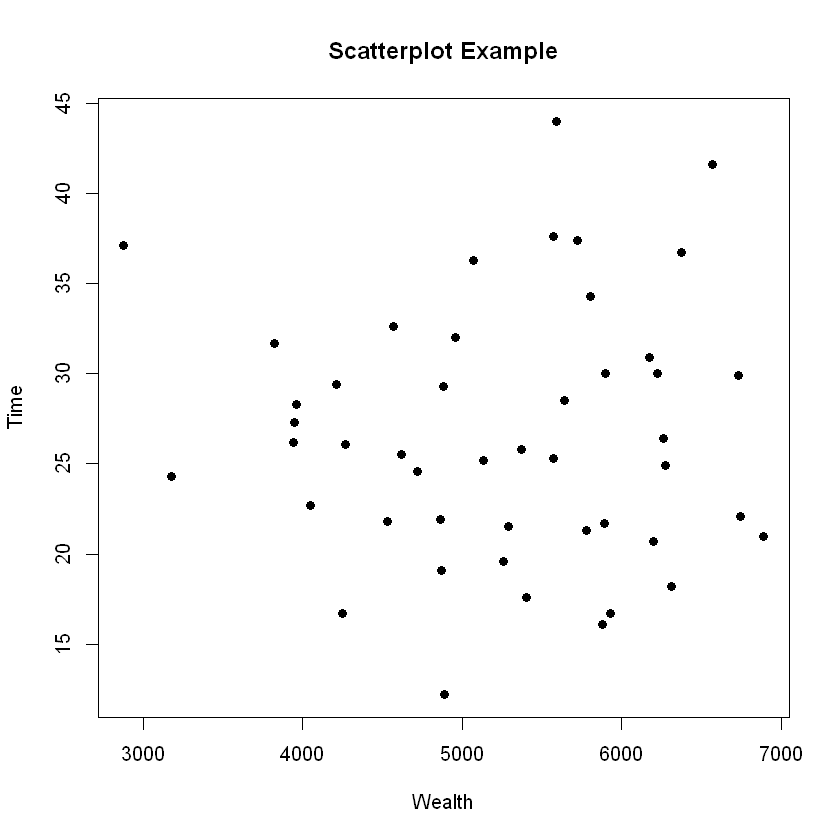

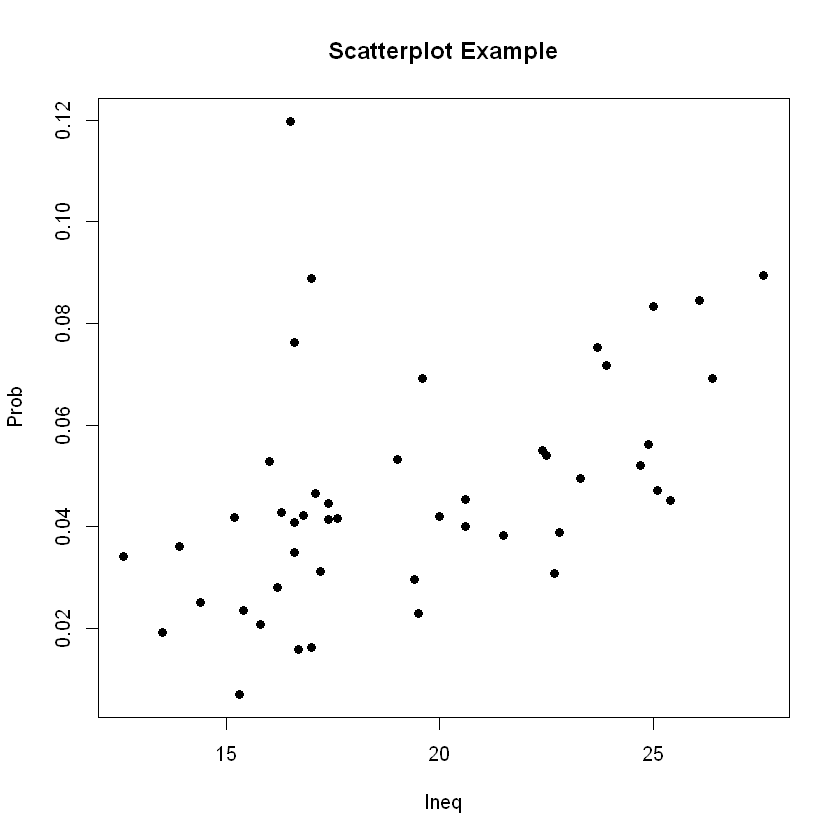

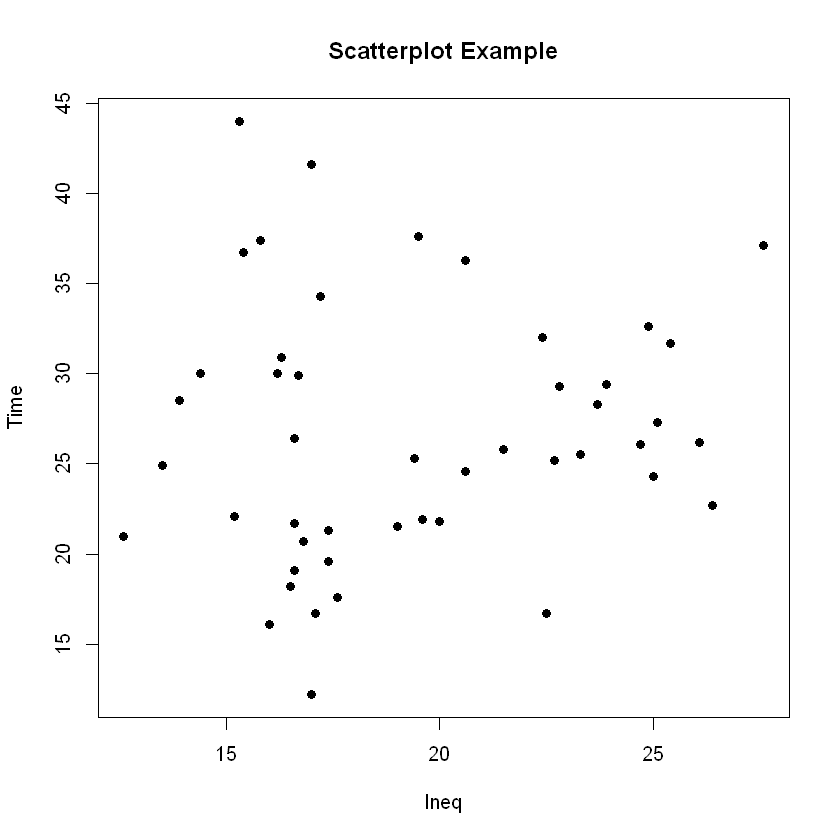

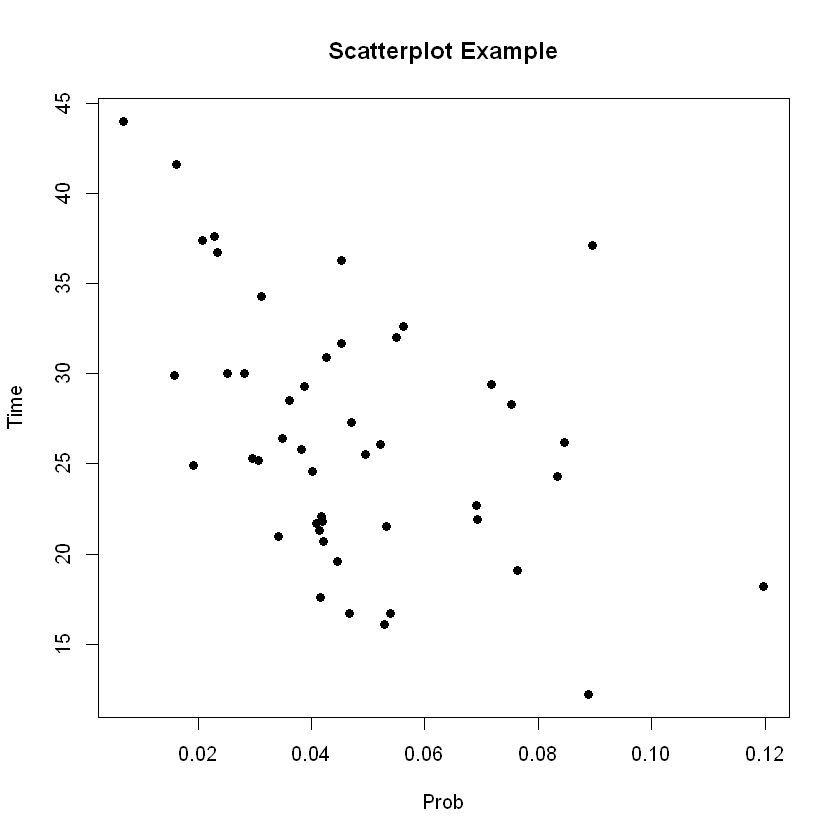

In [130]:
##EXPLORING DATA######
#2-D graphs for each predictors to understand relationship and correlation of predictors

for (i in 1:15){
  for (j in 1:15){
    if (i<j){
      plot(data[,i],data[,j], main="Scatterplot Example",xlab=colnames(data)[i],ylab=colnames(data)[j], pch=19)
    }
  }
}

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
"could not fit smooth"


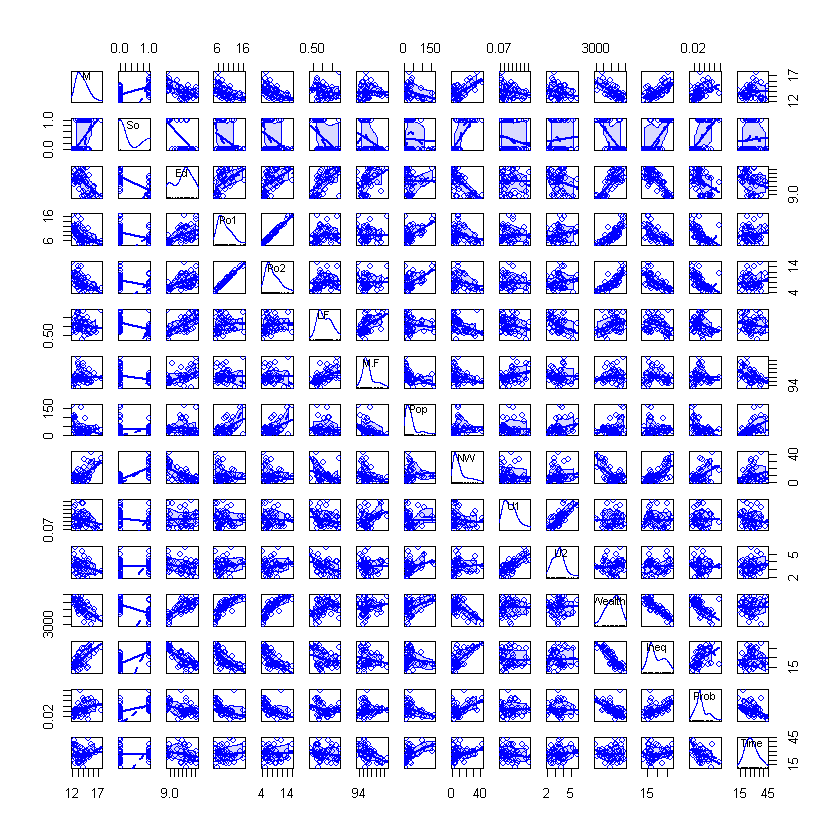

In [144]:
#library(car)
#All predictors scatterplot
scatterplotMatrix(~ M+So+Ed+Po1+Po2+LF+M.F+Pop+NW+U1+U2+Wealth+Ineq+Prob+Time, data = data)
#too tough to read

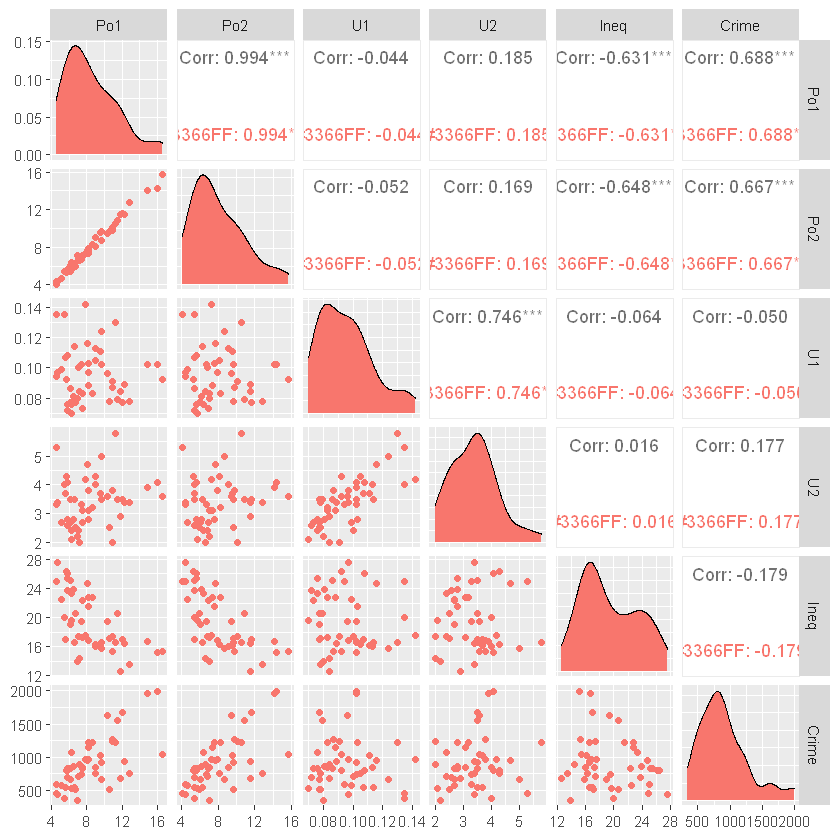

In [141]:
#USING SUBSET OF PREDICTORS
ggpairs(data, columns = c("Po1", "Po2", "U1", "U2", "Ineq", "Crime"),
                 mapping=ggplot2::aes(color= "#3366FF"))

In [142]:
#STUDY THE CORRELATION OF THE PREDICTORS (CLOSER TO 1, MORE CORRELATED THE PREDICTORS ARE..)
corr <- cor(data)
round(corr, 2)
#Observation co-relation between predictors
# high POSITIVE Correlation
##Po1-Po2;U1-U2;Po1/Po2-Wealth;So-NW;So-Ineq;Ed-Wealth
# high NEGATIVE Correlation
## So-Ed;Ed-Ineq;P

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
M,1.00,0.58,-0.53,-0.51,-0.51,-0.16,-0.03,-0.28,0.59,-0.22,-0.24,-0.67,0.64,0.36,0.11,-0.09
So,0.58,1.00,-0.70,-0.37,-0.38,-0.51,-0.31,-0.05,0.77,-0.17,0.07,-0.64,0.74,0.53,0.07,-0.09
Ed,-0.53,-0.70,1.00,0.48,0.50,0.56,0.44,-0.02,-0.66,0.02,-0.22,0.74,-0.77,-0.39,-0.25,0.32
Po1,-0.51,-0.37,0.48,1.00,0.99,0.12,0.03,0.53,-0.21,-0.04,0.19,0.79,-0.63,-0.47,0.10,0.69
Po2,-0.51,-0.38,0.50,0.99,1.00,0.11,0.02,0.51,-0.22,-0.05,0.17,0.79,-0.65,-0.47,0.08,0.67
LF,-0.16,-0.51,0.56,0.12,0.11,1.00,0.51,-0.12,-0.34,-0.23,-0.42,0.29,-0.27,-0.25,-0.12,0.19
M.F,-0.03,-0.31,0.44,0.03,0.02,0.51,1.00,-0.41,-0.33,0.35,-0.02,0.18,-0.17,-0.05,-0.43,0.21
Pop,-0.28,-0.05,-0.02,0.53,0.51,-0.12,-0.41,1.00,0.10,-0.04,0.27,0.31,-0.13,-0.35,0.46,0.34
NW,0.59,0.77,-0.66,-0.21,-0.22,-0.34,-0.33,0.10,1.00,-0.16,0.08,-0.59,0.68,0.43,0.23,0.03
U1,-0.22,-0.17,0.02,-0.04,-0.05,-0.23,0.35,-0.04,-0.16,1.00,0.75,0.04,-0.06,-0.01,-0.17,-0.05


# CHECKING THEORY : EIGEN VALUES AND VECTORS

In [23]:
#Eigen values & vectors
X <- as.matrix(data)
X_Trans_X <- t(X)%*%X
ev <- eigen(X_Trans_X)
#Eigenvalues
ev$values
#Eigenvectors
#ev$vectors

[1] 1.380740e+09 5.384801e+06 5.933047e+04 2.062676e+04 2.187416e+03
 [6] 1.677272e+03 1.510724e+02 8.802184e+01 4.109552e+01 2.480029e+01
[11] 9.656677e+00 2.801557e+00 1.967938e+00 2.563207e-02 7.695416e-03
[16] 2.526870e-03

In [136]:
#Find Determinant of X(Transpose)*X -lamba(identity matrix) for 1st Eigen value and vector and test the theory
#diag(ncol(data))
identity_mat <-diag(ncol(data))
det(X_Trans_X-ev$values[2]*identity_mat)

[1] 4.255687e+94

In [206]:
#Caret to transform predictors, box cox tranformation and find princial components
pca_data <-caret::preProcess(
                        data %>% dplyr::select(-Crime),
                        method=c('center','scale','nzv','pca'))
pca_data # suggestion is to use PCA for 9 components out of 15 components
#linear combination of predictors for each principal component
pca_data$rotation

Created from 47 samples and 15 variables

Pre-processing:
  - centered (15)
  - ignored (0)
  - principal component signal extraction (15)
  - scaled (15)

PCA needed 9 components to capture 95 percent of the variance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
M,-0.30371194,0.06280357,0.1724199946,-0.02035537,-0.35832737,-0.449132706,-0.15707378,-0.55367691,0.15474793
So,-0.33088129,-0.15837219,0.0155433104,0.29247181,-0.12061130,-0.100500743,0.19649727,0.22734157,-0.65599872
Ed,0.33962148,0.21461152,0.0677396249,0.07974375,-0.02442839,-0.008571367,-0.23943629,-0.14644678,-0.44326978
Po1,0.30863412,-0.26981761,0.0506458161,0.33325059,-0.23527680,-0.095776709,0.08011735,0.04613156,0.19425472
Po2,0.31099285,-0.26396300,0.0530651173,0.35192809,-0.20473383,-0.119524780,0.09518288,0.03168720,0.19512072
LF,0.17617757,0.31943042,0.2715301768,-0.14326529,-0.39407588,0.504234275,-0.15931612,0.25513777,0.14393498
M.F,0.11638221,0.39434428,-0.2031621598,0.01048029,-0.57877443,-0.074501901,0.15548197,-0.05507254,-0.24378252
Pop,0.11307836,-0.46723456,0.0770210971,-0.03210513,-0.08317034,0.547098563,0.09046187,-0.59078221,-0.20244830
NW,-0.29358647,-0.22801119,0.0788156621,0.23925971,-0.36079387,0.051219538,-0.31154195,0.20432828,0.18984178
U1,0.04050137,0.00807439,-0.6590290980,-0.18279096,-0.13136873,0.017385981,-0.17354115,-0.20206312,0.02069349


# PCA COMPUTATION USING PRCOMP

In [207]:
pca <- prcomp(data[,1:15], scale. = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

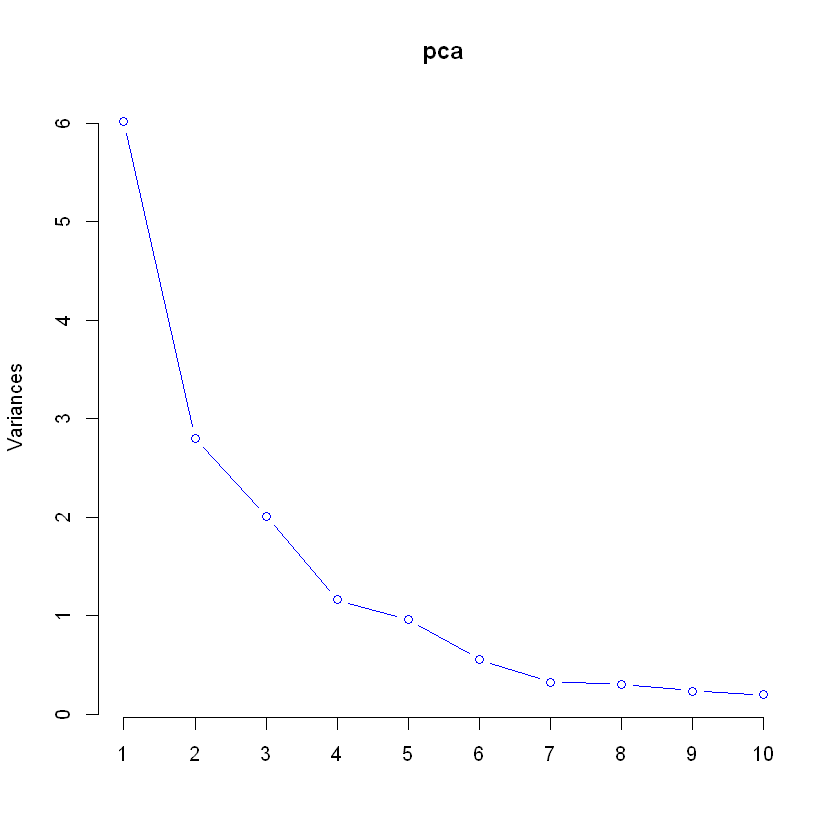

In [150]:
plot(pca, type="lines",col="blue")

In [208]:
#get first 9 Principal componet
PCs <- pca$x[,1:9]
head(PCs,5)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
-4.199284,-1.0938312,-1.11907395,0.67178115,0.05528338,0.3073383,-0.56640816,-0.007801727,0.22350995
1.172663,0.6770136,-0.05244634,-0.08350709,-1.17319982,-0.5832373,0.19561119,0.154566472,0.43677720
-4.173725,0.2767750,-0.37107658,0.37793995,0.54134525,0.7187223,0.10330693,0.351138883,0.06299232
3.834962,-2.5769060,0.22793998,0.38262331,-1.64474650,0.7294884,0.26699499,-1.547460841,-0.37954181
1.839300,1.3309856,1.27882805,0.71814305,0.04159032,-0.3940902,0.07050766,-0.543237437,0.22463245


# Build linear regression model with the first 4 principal components

In [209]:
PCcrime <- cbind(PCs, data$Crime) #Create new data matrix with first 5 PCs and crime rate
#PCcrime
model <- lm(V10~., data = as.data.frame(PCcrime)) #Create regression model based on 5 principal components
#model
summary(model) #PCA: Adjusted R squared :0.69;R squared :0.61


Call:
lm(formula = V10 ~ ., data = as.data.frame(PCcrime))

Residuals:
   Min     1Q Median     3Q    Max 
-455.9 -132.5   21.5  139.9  393.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      34.91  25.928  < 2e-16 ***
PC1            65.22      14.38   4.535 5.88e-05 ***
PC2           -70.08      21.08  -3.325  0.00201 ** 
PC3            25.19      24.92   1.011  0.31857    
PC4            69.45      32.73   2.122  0.04061 *  
PC5          -229.04      36.04  -6.355 2.08e-07 ***
PC6           -60.21      47.44  -1.269  0.21228    
PC7           117.26      62.20   1.885  0.06728 .  
PC8            28.72      63.64   0.451  0.65446    
PC9           -37.18      72.76  -0.511  0.61244    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 239.3 on 37 degrees of freedom
Multiple R-squared:  0.692,	Adjusted R-squared:  0.6171 
F-statistic: 9.239 on 9 and 37 DF,  p-value: 3.588e-07


# Specify the new model in terms of the original variables (not the principal components), UNSCALE data in revrse

In [212]:
# Get coefficients in terms of original data from PCA coefficients
model$coefficient
beta0 <- model$coefficients[1] #intercept 
betas <- model$coefficients[2:10] #PC
print(paste("Intercept Co-efficient: ",beta0))
betas

(Intercept)         PC1         PC2         PC3         PC4         PC5 
  905.08511    65.21593   -70.08312    25.19408    69.44603  -229.04282 
        PC6         PC7         PC8         PC9 
  -60.21329   117.25590    28.71656   -37.17564

[1] "Intercept Co-efficient:  905.085106382979"


PC1        PC2        PC3        PC4        PC5        PC6        PC7 
  65.21593  -70.08312   25.19408   69.44603 -229.04282  -60.21329  117.25590 
       PC8        PC9 
  28.71656  -37.17564

In [213]:
# Transform the PC coefficients into coefficients for the original variables

#pca$rotation[,1:4]
alphas <- pca$rotation[,1:9] %*% betas
t(alphas) #tranform PC co-efficients into original variable co-efficients

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
47.76773,97.85583,4.661941,126.6093,123.4647,29.18835,138.325,27.10574,57.26768,-25.10066,25.54553,38.92574,52.66543,-118.0595,-1.340806


In [214]:
# Above is SCALED  coefficients 
#To convert into original
# When scaling, this function subtracts the mean and divides by the standard deviation, for each variable.
# So, alpha * (x - mean)/sd = originalAlpha * x.
# That means:
# (1) originalAlpha = alpha/sd
# (2) we have to modify the constant term a0 by alpha*mean/sd

originalAlpha <- alphas/sapply(data[,1:15],sd)
originalBeta0 <- beta0 - sum(alphas*sapply(data[,1:15],mean)/sapply(data[,1:15],sd))
originalBeta0

(Intercept) 
  -5742.136

In [216]:
# Here are the coefficients for unscaled data:
t(originalAlpha)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
38.00853,204.3025,4.167285,42.60219,44.15555,722.2726,46.94177,0.7119751,5.569224,-1392.255,30.24768,0.04034134,13.20066,-5192.403,-0.1891951


In [217]:
#ORIGINAL MODEL Now let's compare with the regression model from the previous homework

model2 <- lm( Crime ~ ., data = data)
summary(model2) #R2 .80 and Adju R2 .70 (vs.#PCA: Adjusted R squared :0.69;R squared :0.61)


Call:
lm(formula = Crime ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.984e+03  1.628e+03  -3.675 0.000893 ***
M            8.783e+01  4.171e+01   2.106 0.043443 *  
So          -3.803e+00  1.488e+02  -0.026 0.979765    
Ed           1.883e+02  6.209e+01   3.033 0.004861 ** 
Po1          1.928e+02  1.061e+02   1.817 0.078892 .  
Po2         -1.094e+02  1.175e+02  -0.931 0.358830    
LF          -6.638e+02  1.470e+03  -0.452 0.654654    
M.F          1.741e+01  2.035e+01   0.855 0.398995    
Pop         -7.330e-01  1.290e+00  -0.568 0.573845    
NW           4.204e+00  6.481e+00   0.649 0.521279    
U1          -5.827e+03  4.210e+03  -1.384 0.176238    
U2           1.678e+02  8.234e+01   2.038 0.050161 .  
Wealth       9.617e-02  1.037e-01   0.928 0.360754    
Ineq         7.067e+01  2.272e+01   3.111 0.003983 ** 
Prob        -4.855e+03

# Compare  quality of PCA Model vs. Original Model based on straightforward regression model

In [ ]:
# These results suggest that we are better off using a more straightforward regression model
# instead of PCA before using regression.
# If we had used all 15 principal components, we would have obtained
# an R-squared value of 0.803, which is the same R-squared value when using all 
# 15 regular predictors in a basic linear regression model.

In [166]:
 # all possibilities: for i=1..15, run a regression using the first i principal components
r2 <- numeric(15) # create a vector to store the R-squared values
for (i in 1:15) {
  pclist <- pca$x[,1:i]  # use the first i prinicipal components
  pcc <- cbind(data[,16],pclist)  # create data set
  model <- lm(V1~.,data = as.data.frame(pcc)) # fit model
  r2[i] <- 1 - sum(model$residuals^2)/sum((data$Crime - mean(data$Crime))^2) # calculate R-squared
}
r2

[1] 0.1711351 0.2631339 0.2716416 0.3091121 0.6451941 0.6586023 0.6881819
 [8] 0.6898765 0.6920491 0.6962873 0.6973865 0.7692656 0.7723664 0.7911447
[15] 0.8030868

In [167]:
# All PCA first "n" components generate model R-square less than original model R square value of 0.80. 
#As noted earlier, with smaller subset of data, we are running into overfitting yielding high R square for original model

# Predict new observations' Crime fit
### crime prediction for new point of observation based on Original vs PCA model

In [218]:
#datapoint from previous homework
new_observe = data.frame(
        M = 14.0,
        So = 0,
        Ed = 10.0,
        Po1 = 12.0,
        Po2 = 15.5,
        LF = 0.640,
        M.F = 94.0 ,
        Pop = 150,
        NW = 1.1,
        U1 = 0.120,
        U2 = 3.6 ,
        Wealth = 3200, 
        Ineq = 20.1 ,
        Prob = 0.04 ,
        Time = 39.0
)

In [219]:
#ORIGINAL Prediction
#model2 <- lm( Crime ~ ., data = data) 
crime_pred_orig = predict(model2, new_observe) %>% 
        as_tibble()
crime_pred_orig

value
<dbl>
155.4349


In [221]:
#PCA FITTED PREDICTION
library(pls)# to get pcr fit
# Run principal component regression function with only the first 4 principal components

numcomp <- 9
pcr.fit <- pcr(Crime ~ ., data = data, scale = TRUE, ncomp = numcomp)
summary(pcr.fit)
head(pcr.fit$scores,5)

Data: 	X dimension: 47 15 
	Y dimension: 47 1
Fit method: svdpc
Number of components considered: 9
TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X        40.13    58.81    72.17    79.92    86.31    90.00    92.14    94.19
Crime    17.11    26.31    27.16    30.91    64.52    65.86    68.82    68.99
       9 comps
X        95.76
Crime    69.20


,Comp 1,Comp 2,Comp 3,Comp 4,Comp 5,Comp 6,Comp 7,Comp 8,Comp 9
1,-4.199284,-1.0938312,-1.11907395,0.67178115,0.05528338,0.3073383,-0.56640816,-0.007801727,0.22350995
2,1.172663,0.6770136,-0.05244634,-0.08350709,-1.17319982,-0.5832373,0.19561119,0.154566472,0.43677720
3,-4.173725,0.2767750,-0.37107658,0.37793995,0.54134525,0.7187223,0.10330693,0.351138883,0.06299232
4,3.834962,-2.5769060,0.22793998,0.38262331,-1.64474650,0.7294884,0.26699499,-1.547460841,-0.37954181
5,1.839300,1.3309856,1.27882805,0.71814305,0.04159032,-0.3940902,0.07050766,-0.543237437,0.22463245


In [222]:
#use model to make predictions on a test set
test <- pcr(Crime ~ ., data = data, scale=TRUE, validation="CV") #Cross validation
summary(test)
#Root Mean Square error(RMSE) 
#If we use interceptonly , the square error is  390.9
#If we use first components  , the square error is dropped to 364
#If we add in second  components  , the square error is dropped to 354

Data: 	X dimension: 47 15 
	Y dimension: 47 1
Fit method: svdpc
Number of components considered: 15

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           390.9    364.8    354.1    364.0    366.9    262.5    262.8
adjCV        390.9    364.0    352.6    362.2    367.0    260.3    260.4
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       259.6    266.7    270.6     276.6     298.8     264.5     276.4
adjCV    253.7    263.7    267.7     273.2     298.6     260.1     271.9
       14 comps  15 comps
CV        271.2     266.2
adjCV     265.7     261.0

TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X        40.13    58.81    72.17    79.92    86.31    90.00    92.14    94.19
Crime    17.11    26.31    27.16    30.91    64.52    65.86    68.82    68.99
       9 comps  10 comps  11 comps  12 comps  13 comps  1

In [223]:
pcr_pred <- predict(test, new_observe, ncomp=4)
pcr_pred
# predicted value of new data using PCR is  1112 vs. 155 crime data value using original regression with all the predictors
#PCA generated crime ratio 7 times more than the linear regression model with all predictors for the new data value

, , 4 comps

     Crime
1 1112.678

In [ ]:
##########THE END of PCA REGRESSION ASSIGNMENT##############